In [1]:
# Primary imports and constants
import ROOT
import numpy as np
import matplotlib.pyplot as plot
import datetime
import os
import glob
import math
import io
from PIL import Image, ImageOps

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz 
px = 1/plot.rcParams['figure.dpi']  # pixel in inches

# Functions
def ProcessTimestamp( evtTimestamp ):
    evtNanosec = evtTimestamp & 0xFFFFFFFF
    evtTimestamp = (evtTimestamp >> 32) & 0xFFFFFFFF
    evtTime = datetime.datetime.fromtimestamp(evtTimestamp + evtNanosec*1e-9)
    return evtTime

# Custom rectangular markers
from matplotlib.path import Path
verts = [
   (0., 0.),  # left, bottom
   (0., 3.9),  # left, top
   (6, 3.9),  # right, top
   (6, 0.),  # right, bottom
   (0., 0.),  # back to left, bottom
]
codes = [
    Path.MOVETO, #begin drawing
    Path.LINETO, #straight line
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY, #close shape. This is not required for this shape but is "good form"
]
recMarker = Path(verts, codes)

Welcome to JupyROOT 6.28/02


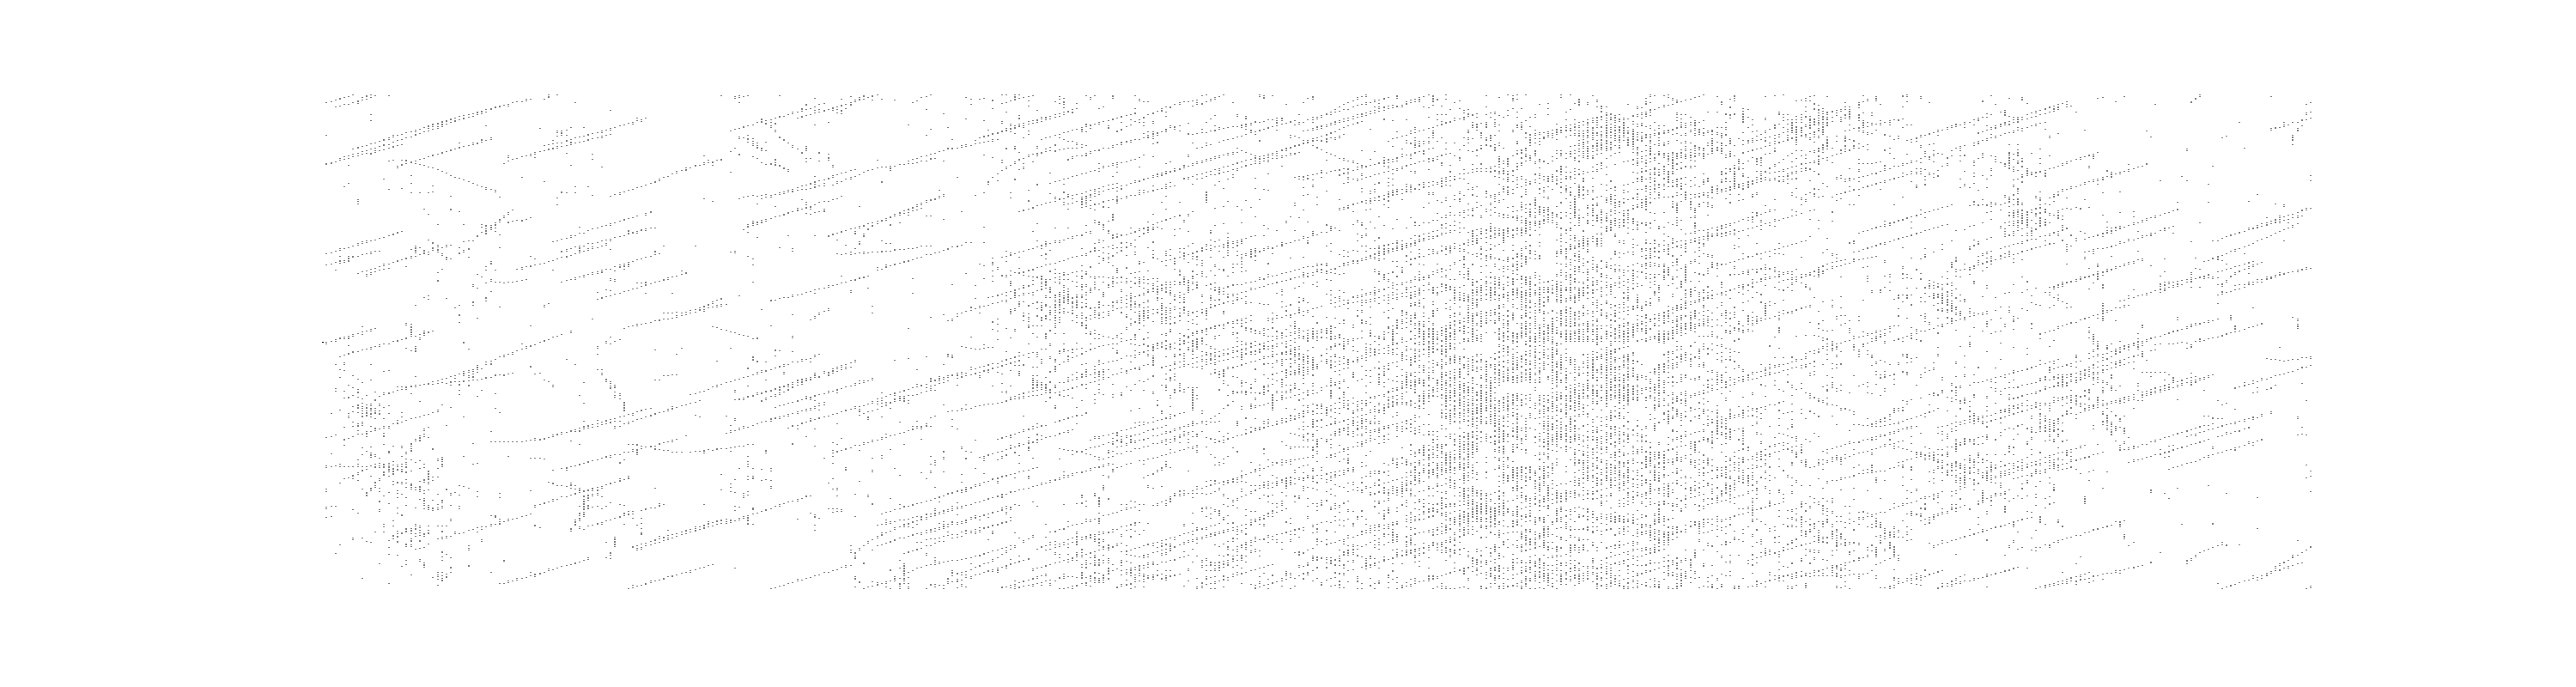

Run 46357 Subrun 21 Event 371, 2023-04-30 04:50:21.647775


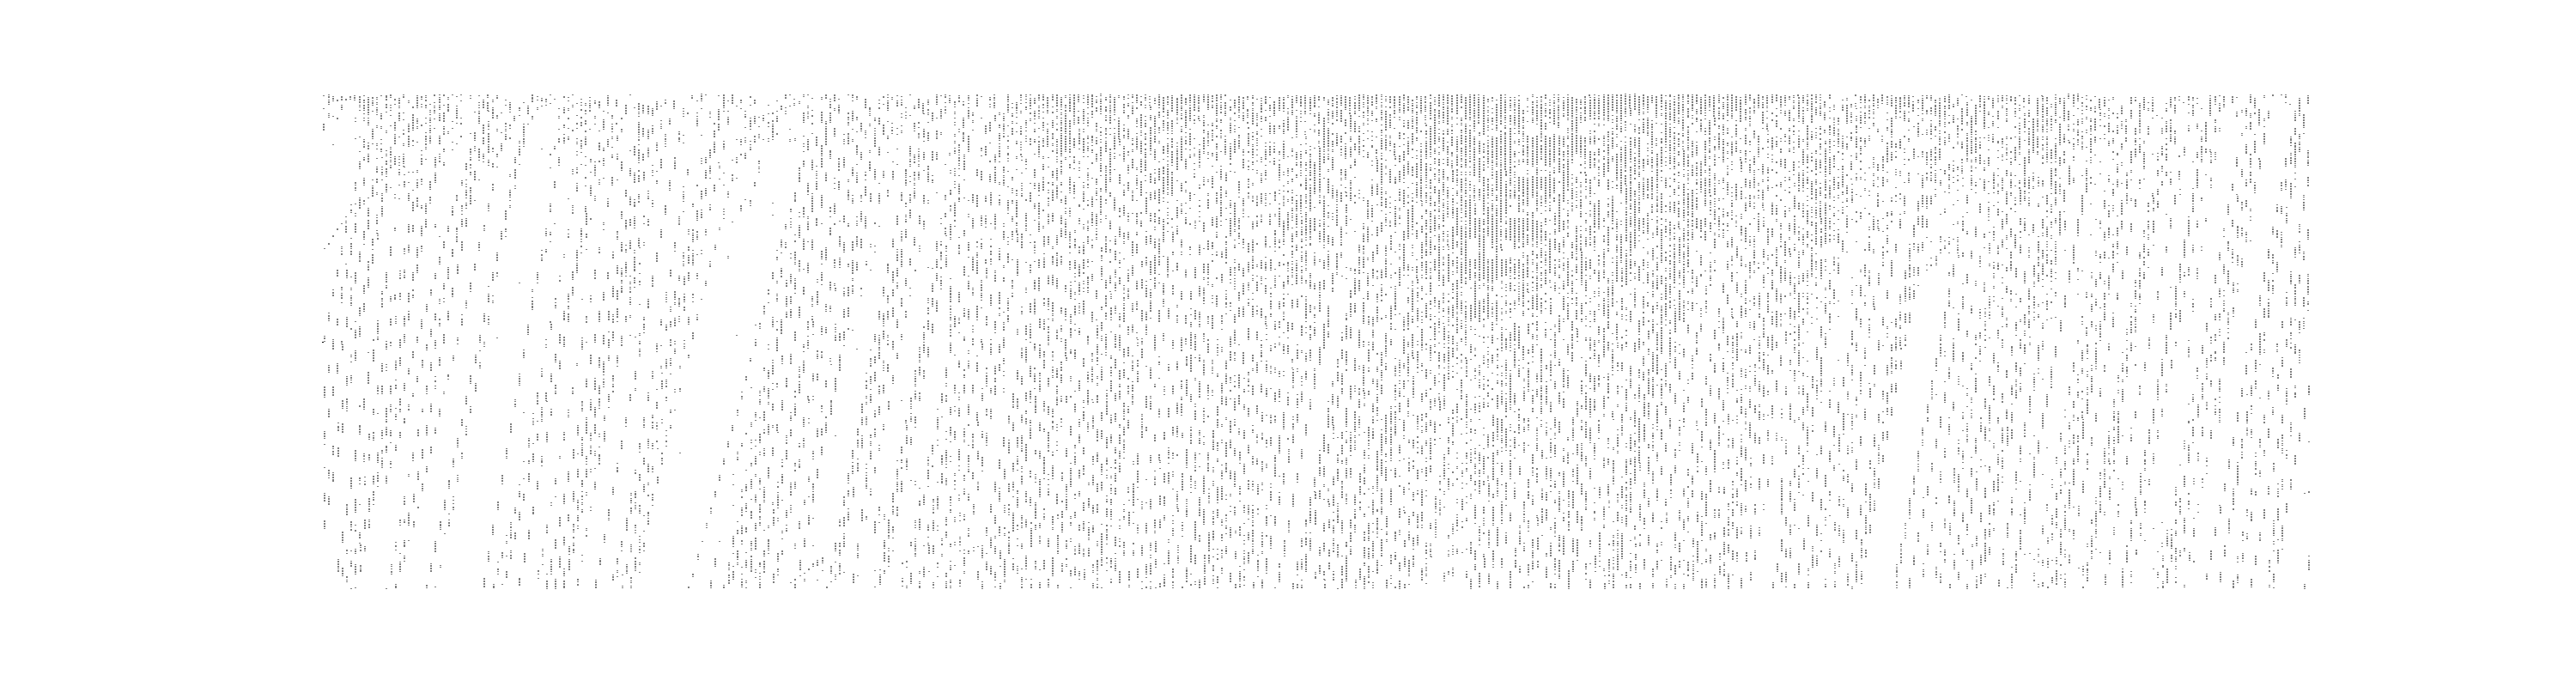

Asymmetry XZ =  0.1972315
Asymmetry YZ =  0.16285571
(0, 0, 0, 0)


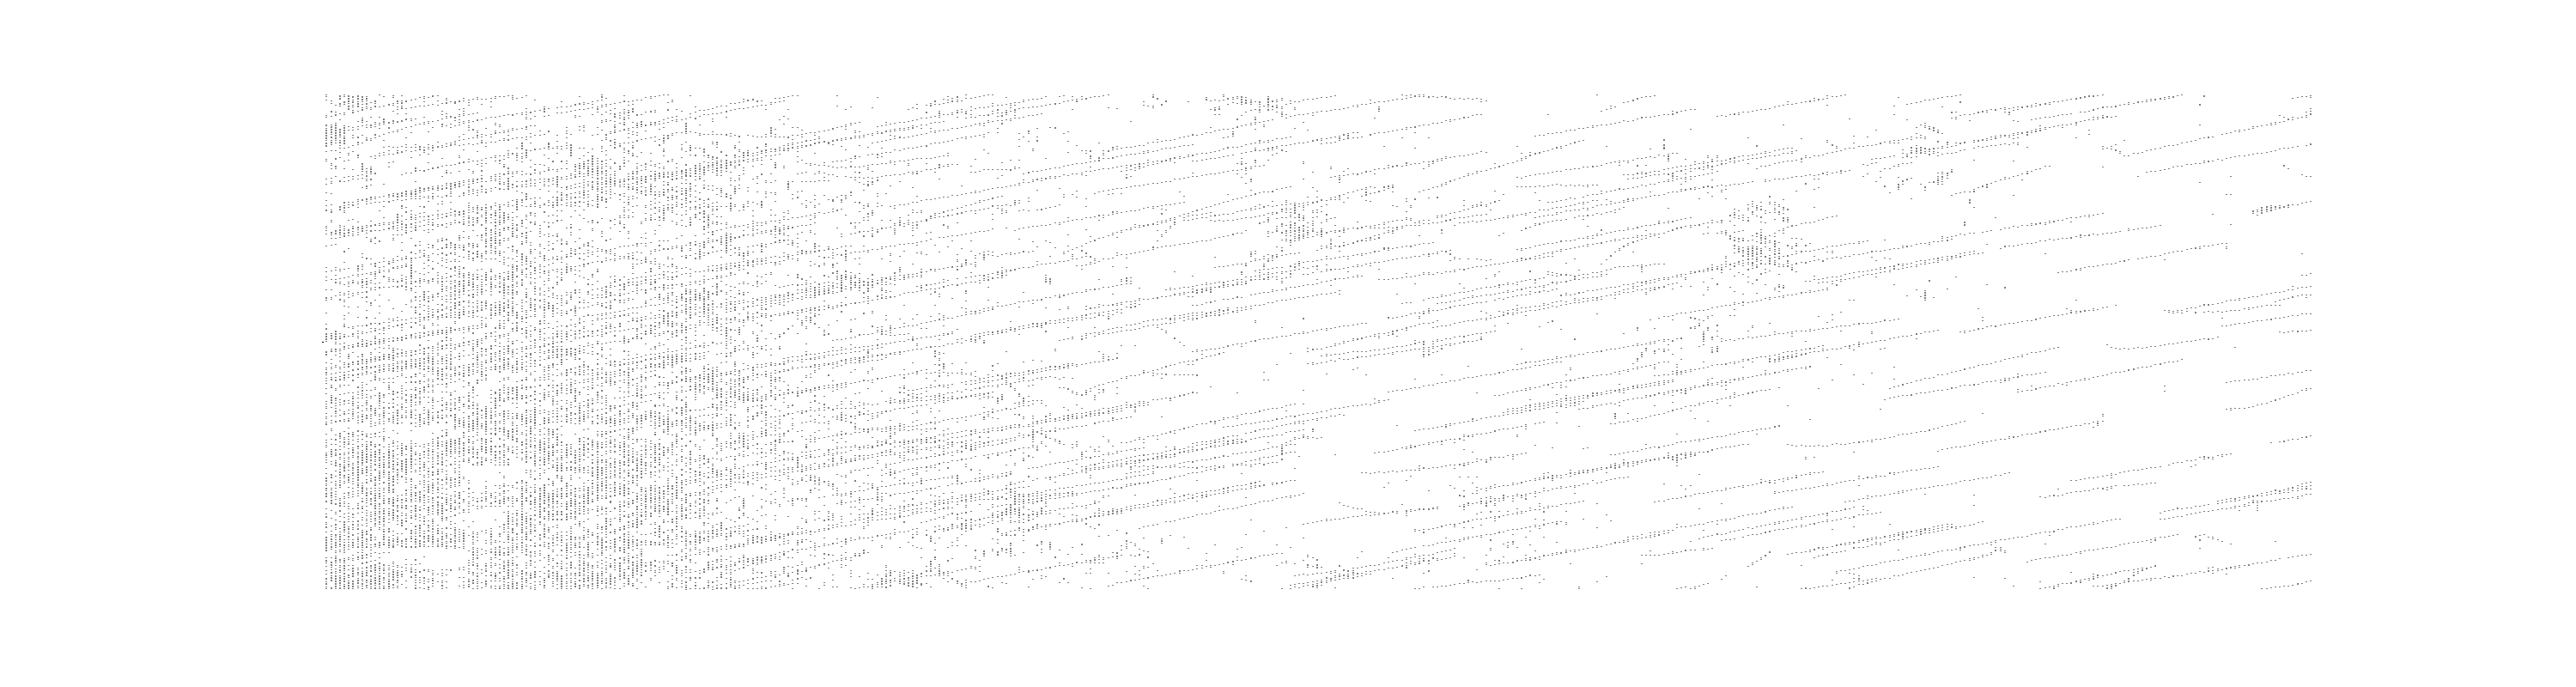

Run 46357 Subrun 22 Event 133, 2023-04-30 04:50:45.320455


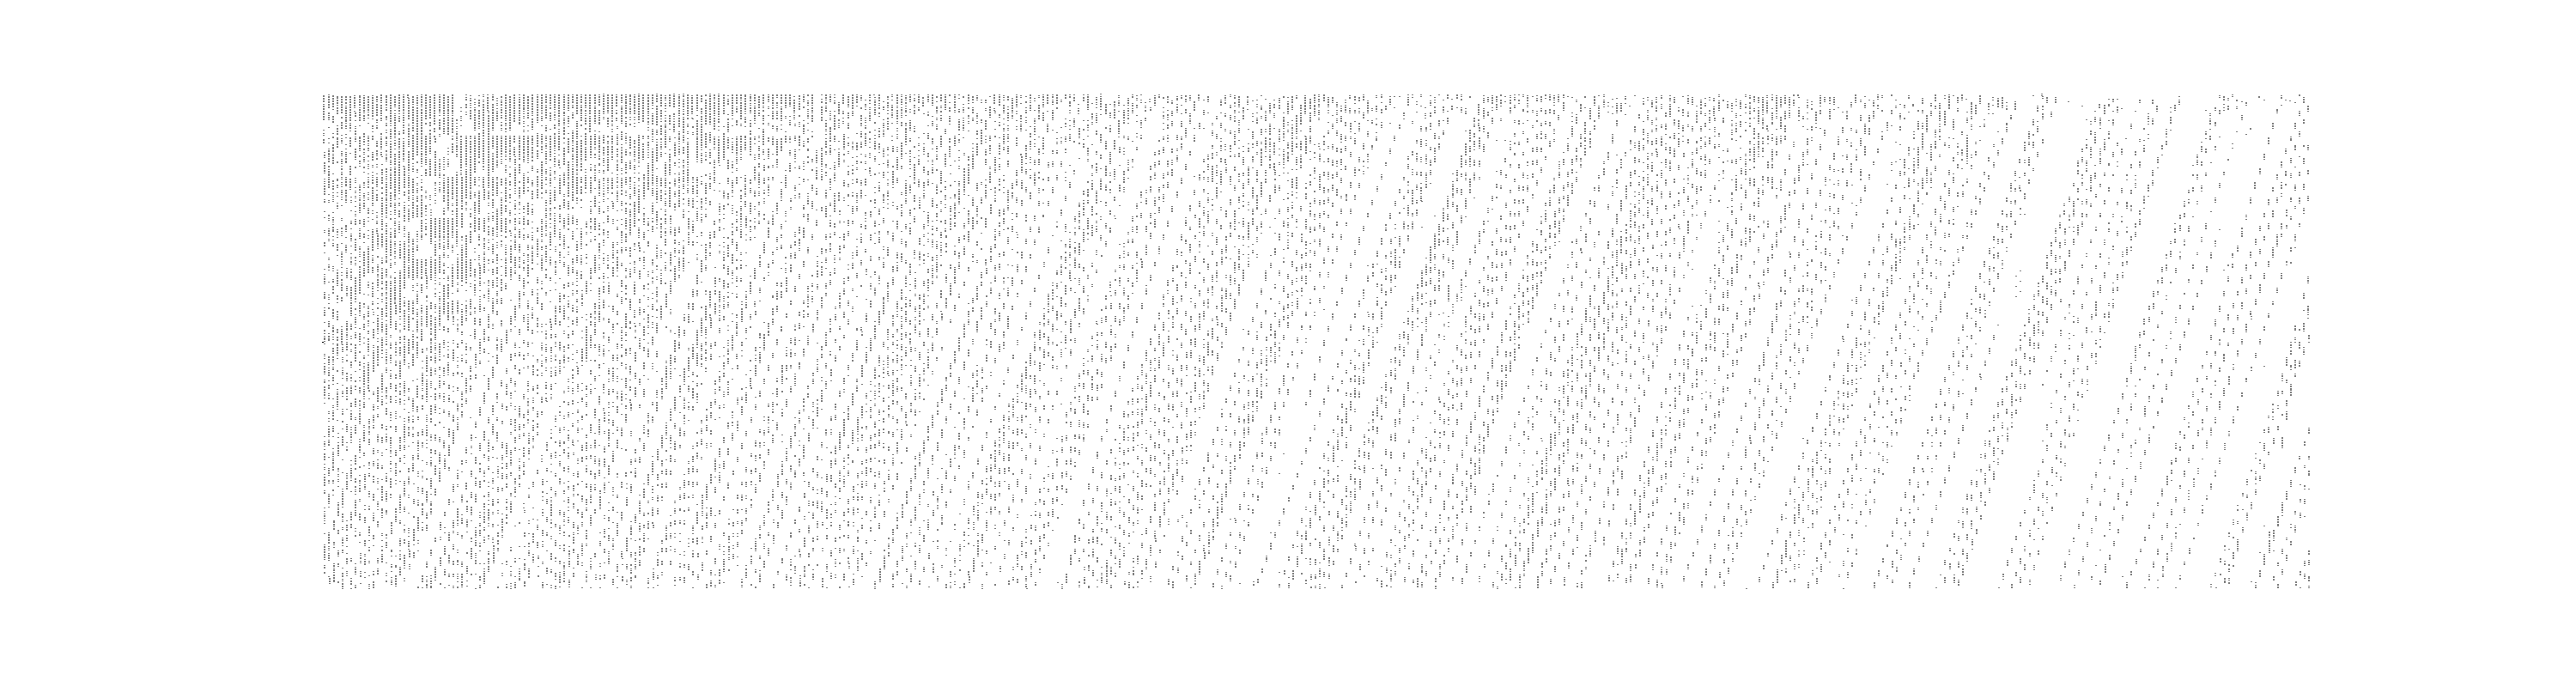

Asymmetry XZ =  0.14191844
Asymmetry YZ =  0.09679508
(349.9272020005557, 0.42228432975894237, 18.870241733814964, 0.2169127379603383)


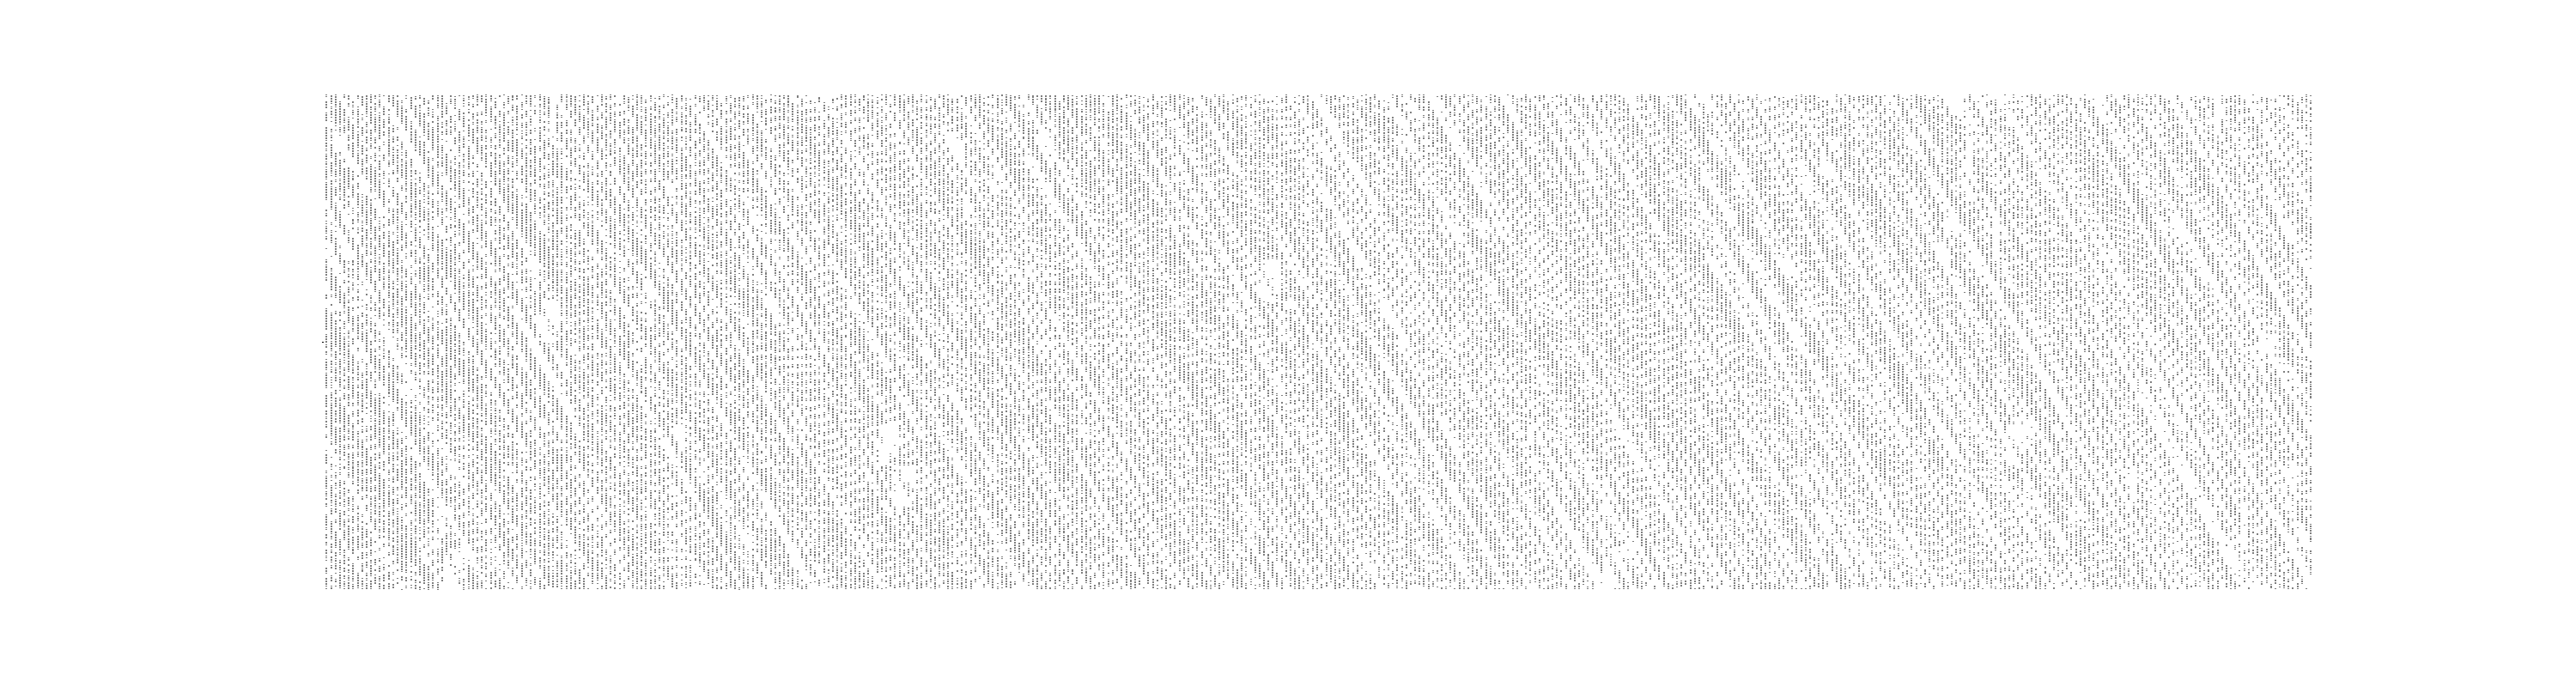

Run 46357 Subrun 26 Event 277, 2023-04-30 04:49:07.857399


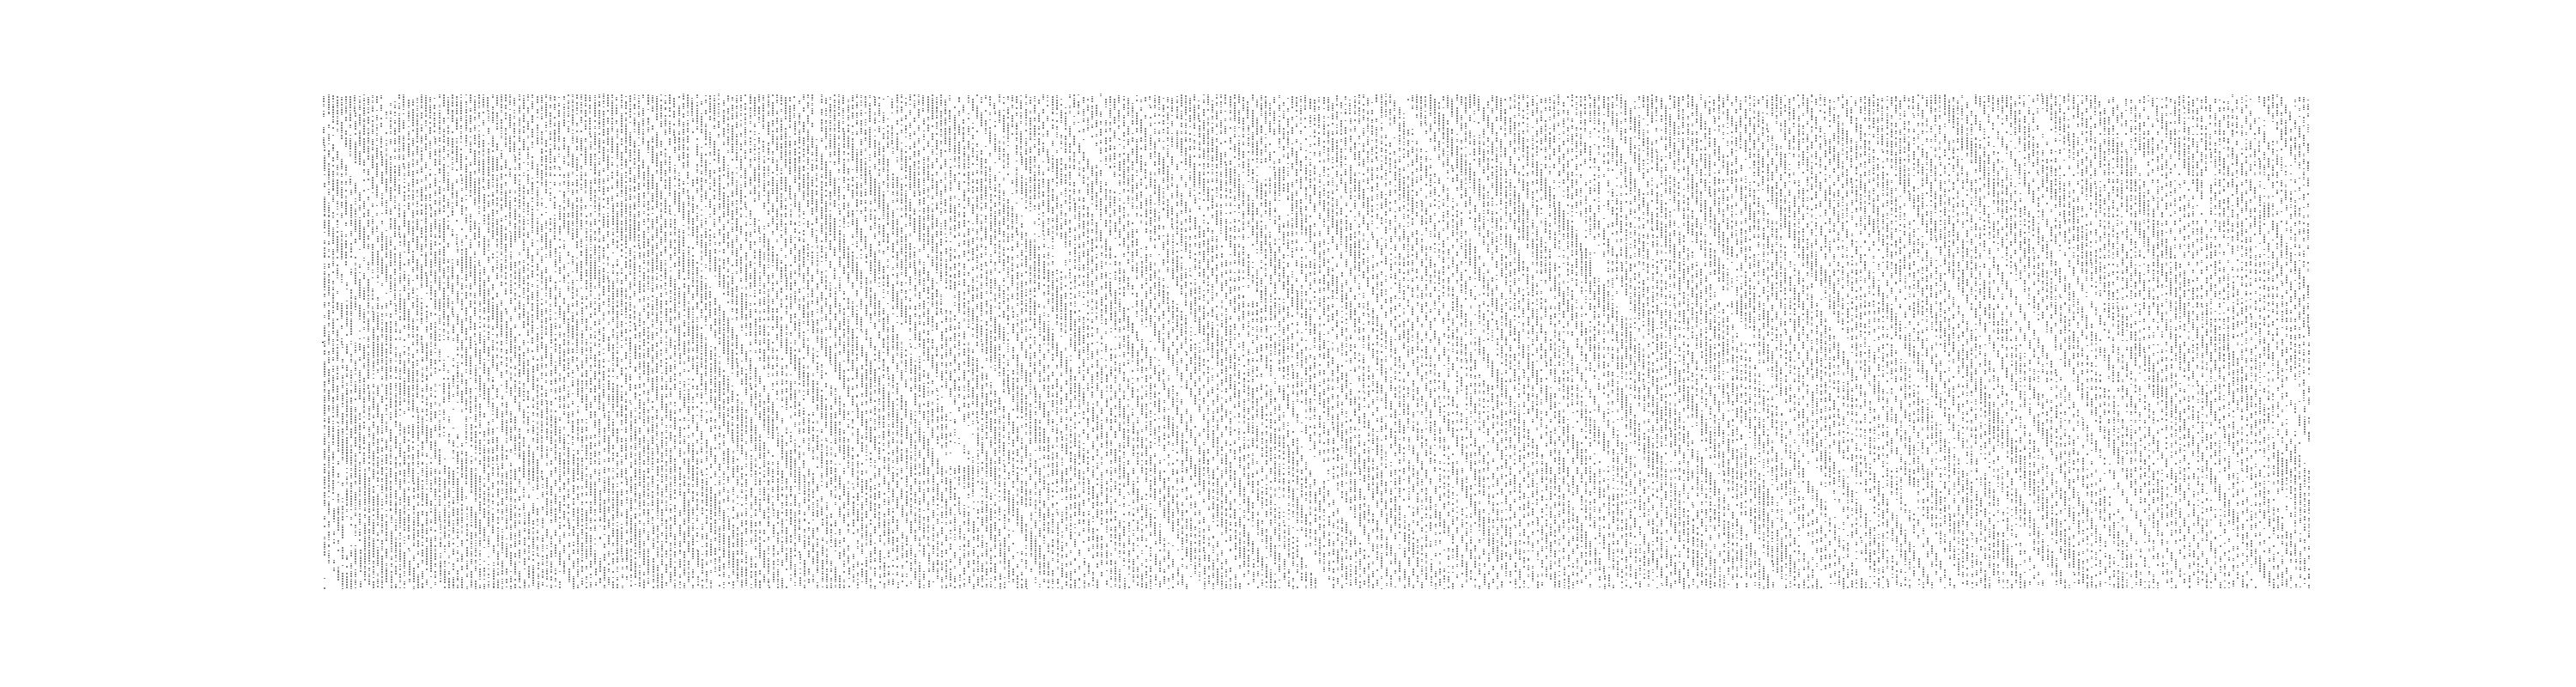

Asymmetry XZ =  0.06893014
Asymmetry YZ =  0.065658174
(241.79216449013614, 0.0, -28.90803000833565, 0.21608471347845623)


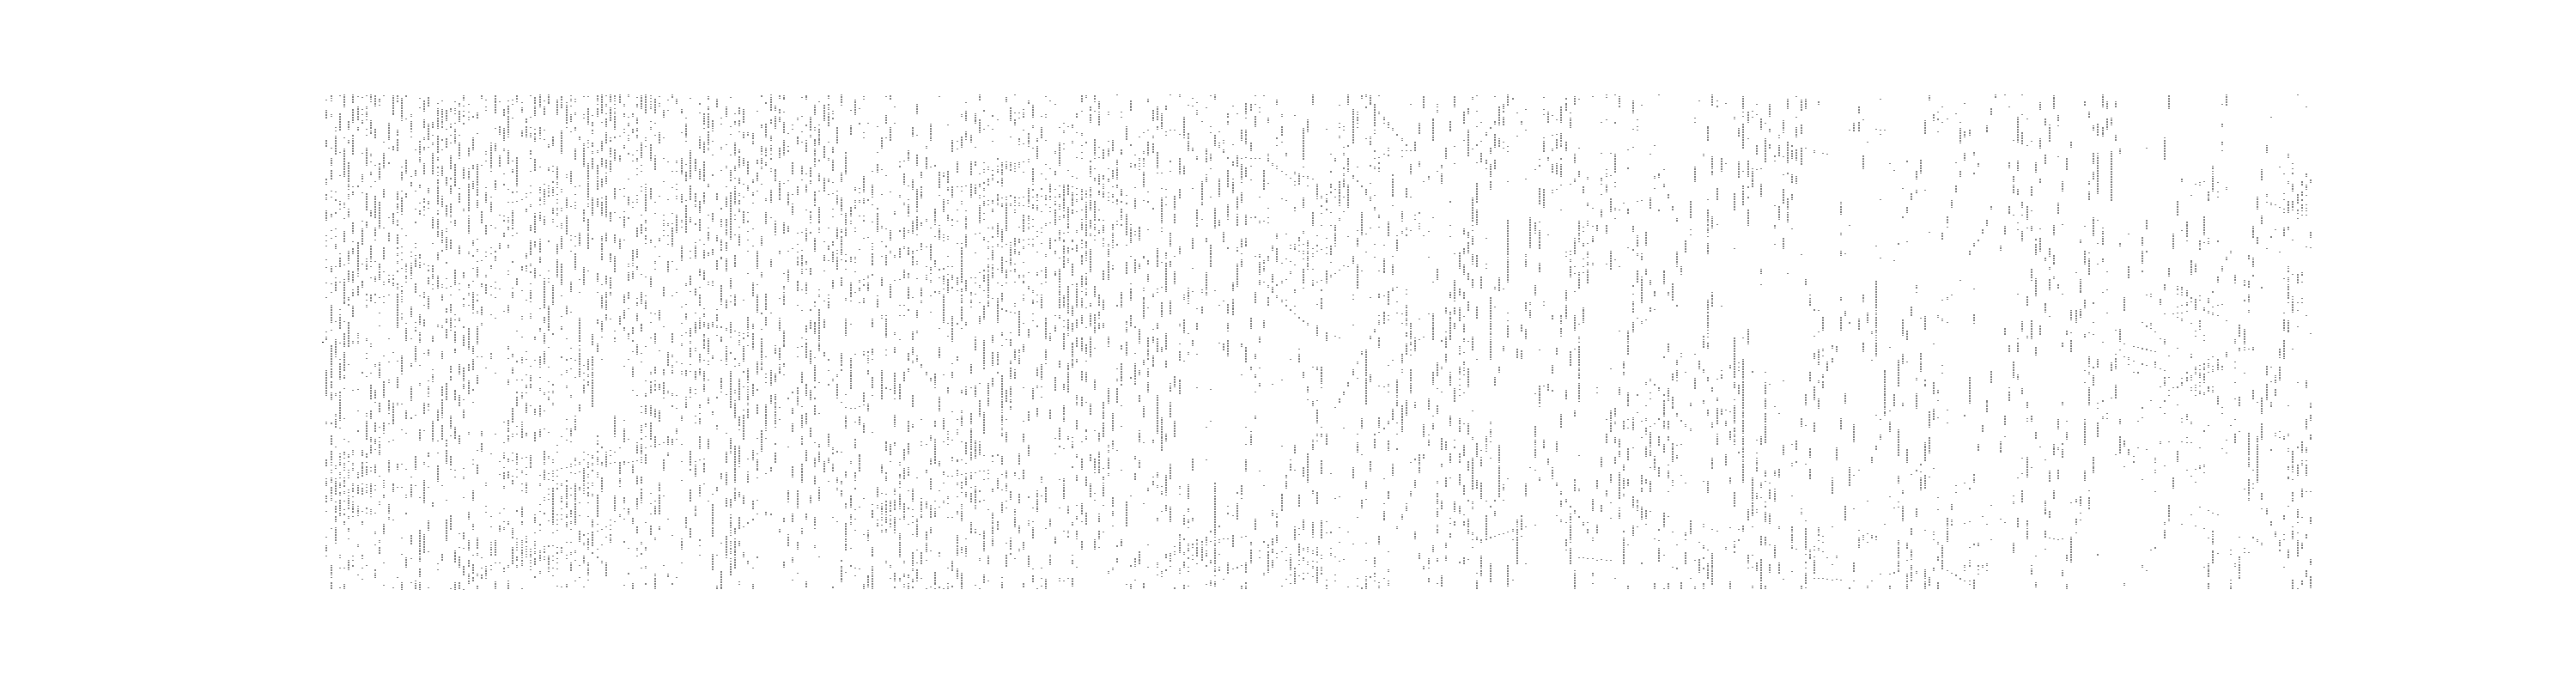

Run 46357 Subrun 36 Event 30, 2023-04-30 04:54:59.919559


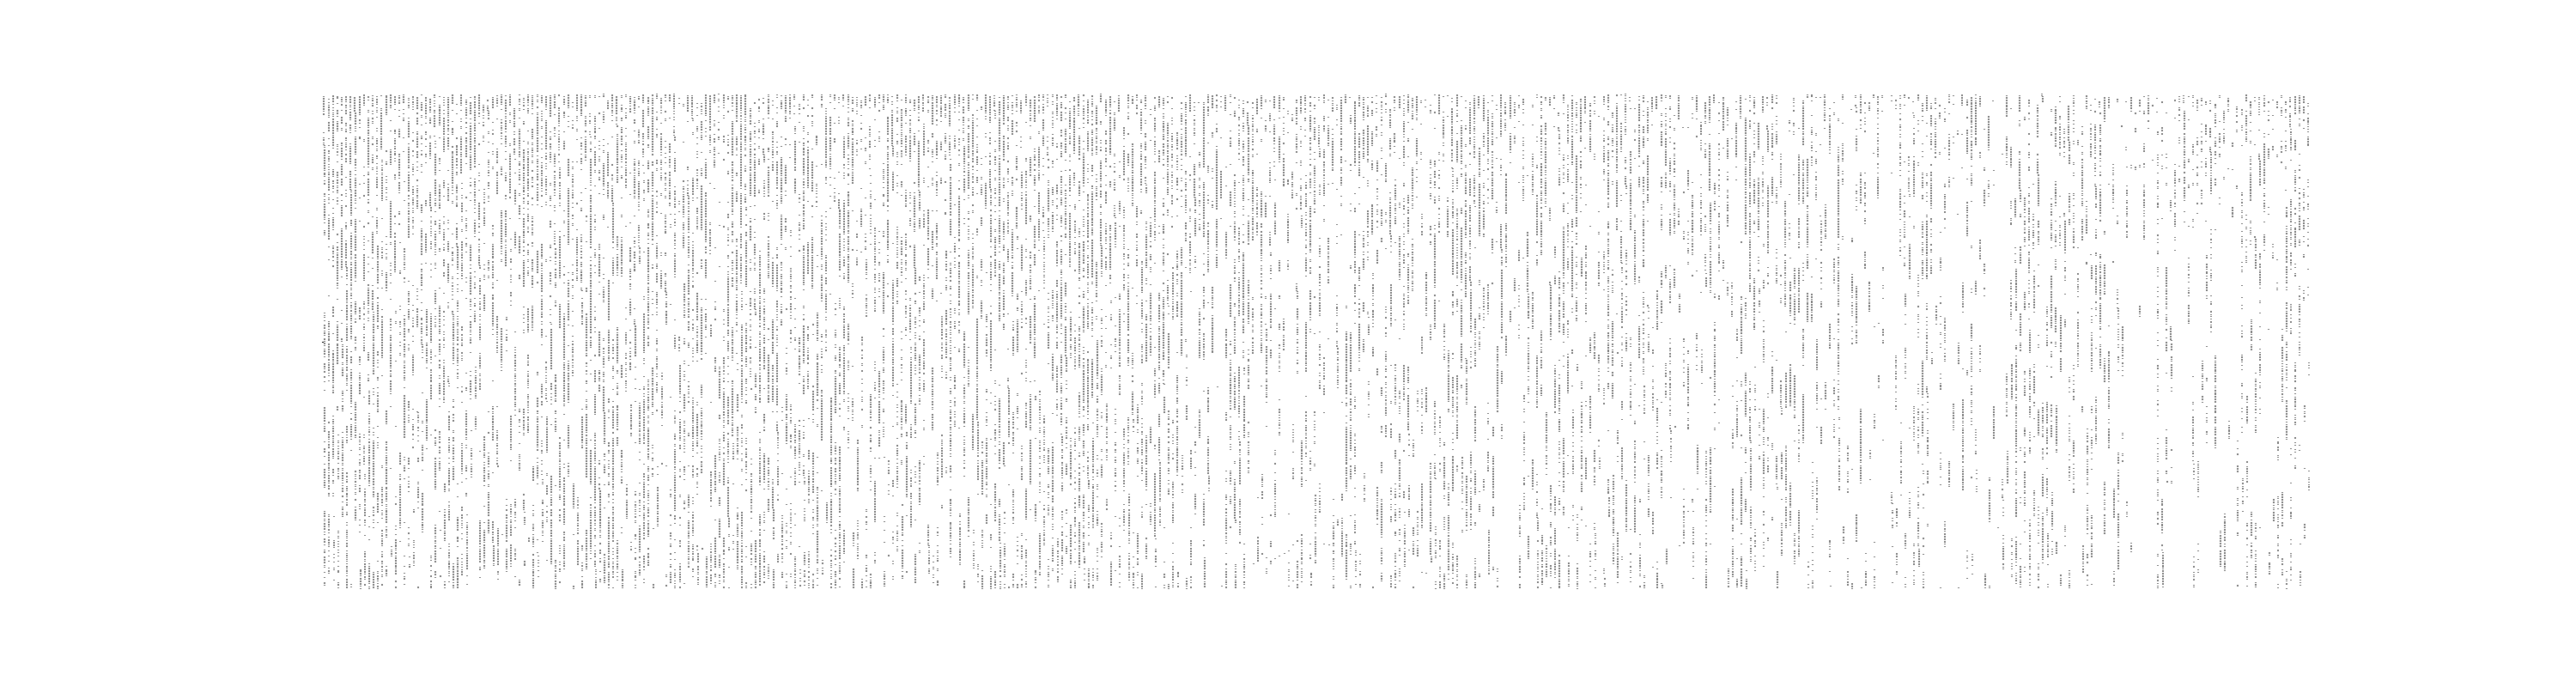

Asymmetry XZ =  0.09170916
Asymmetry YZ =  0.096003495
(0, 0, 0, 0)


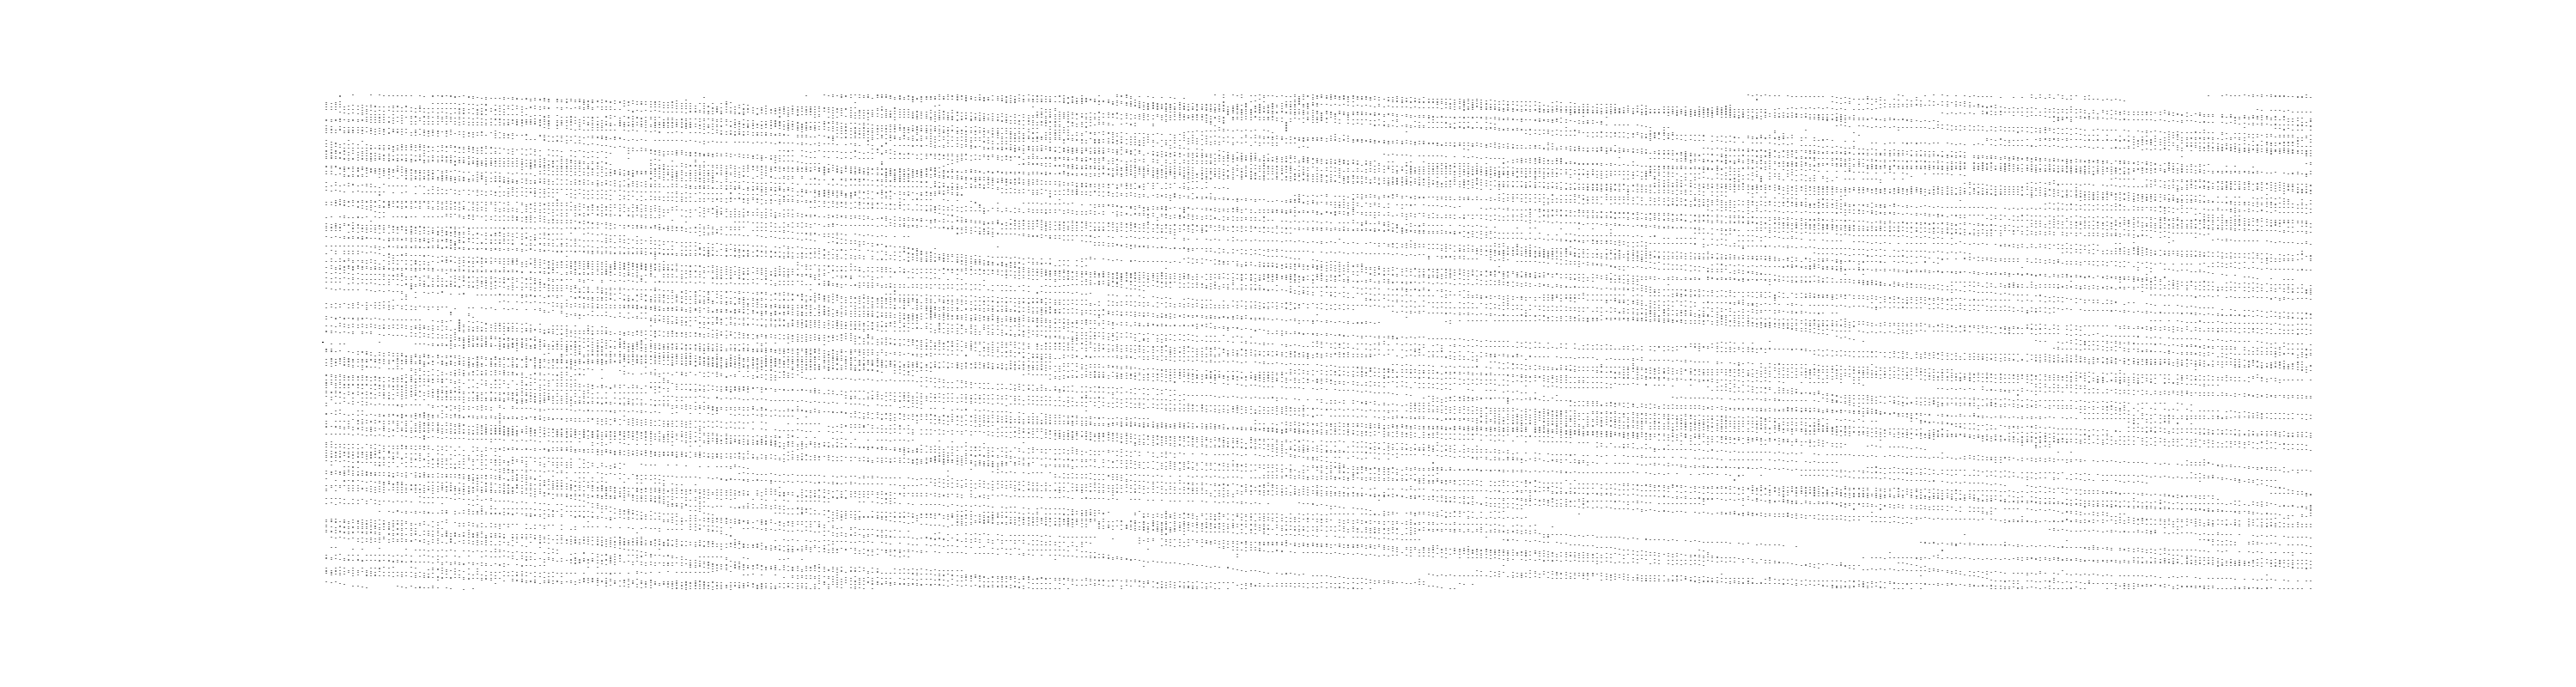

Run 46357 Subrun 45 Event 981, 2023-04-30 05:01:09.096709


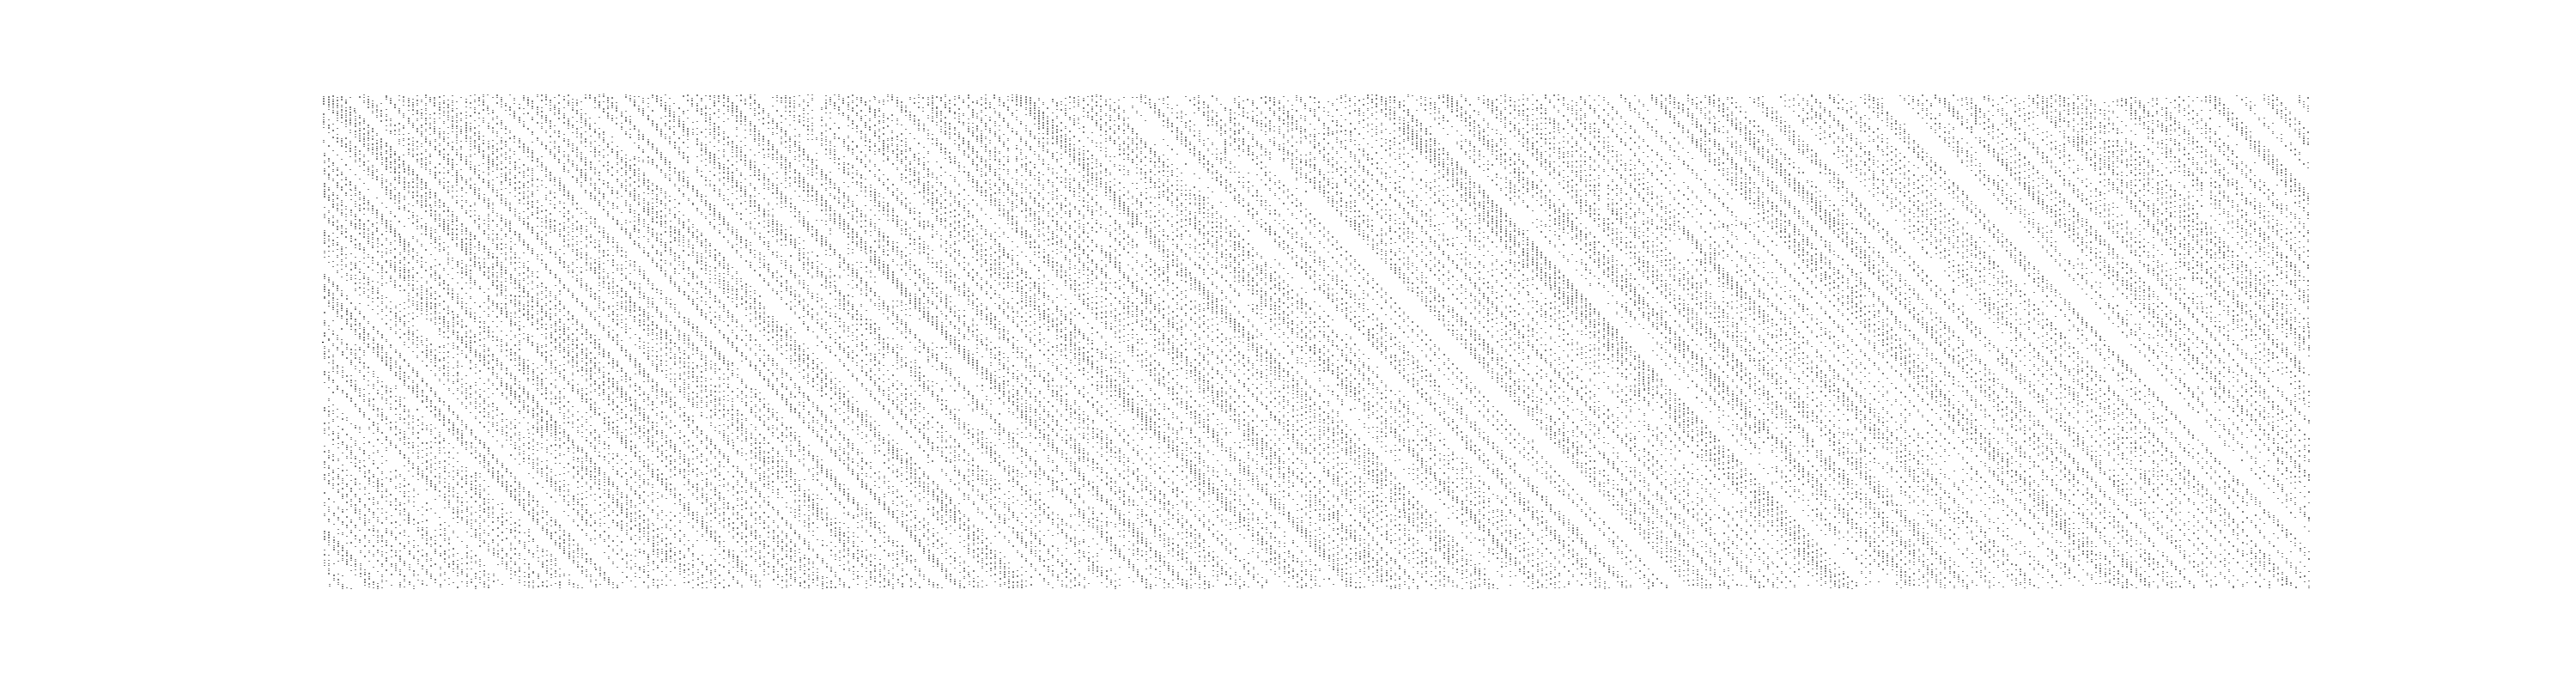

Asymmetry XZ =  0.07186542
Asymmetry YZ =  0.07300876
(181.63545429285912, 0.11793101984214076, -43.41205890525146, 0.15004167824395787)


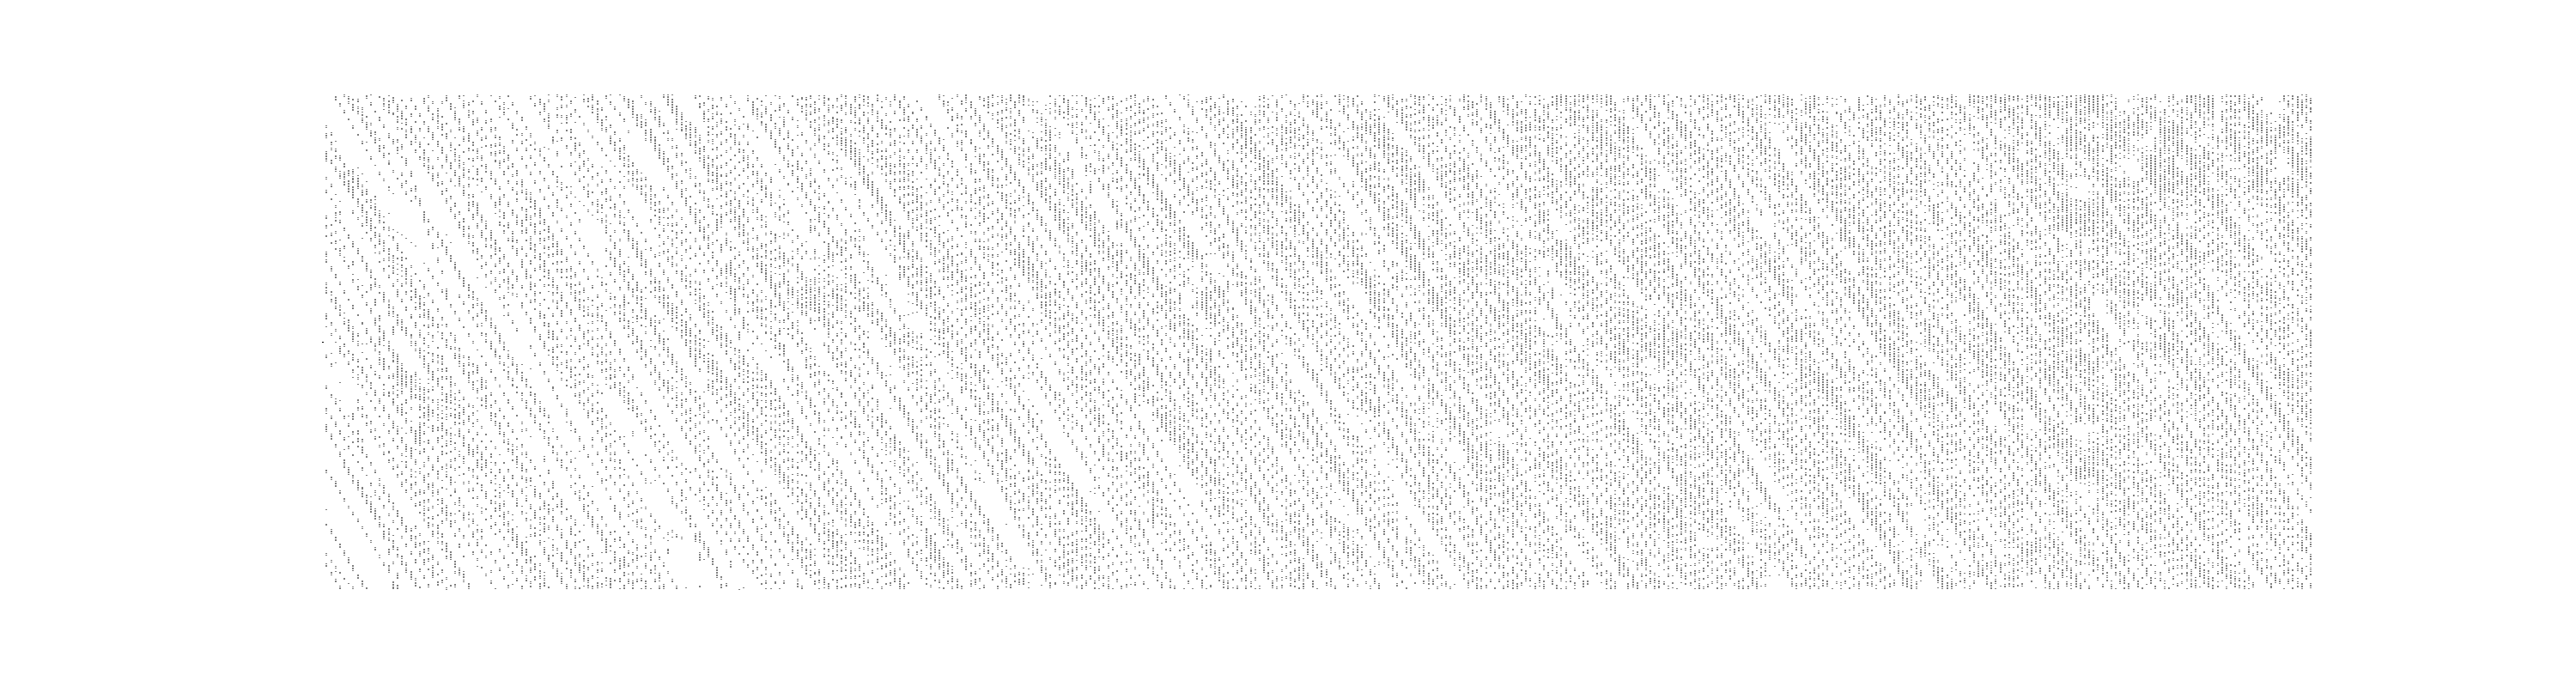

Run 46357 Subrun 47 Event 931, 2023-04-30 05:06:16.973229


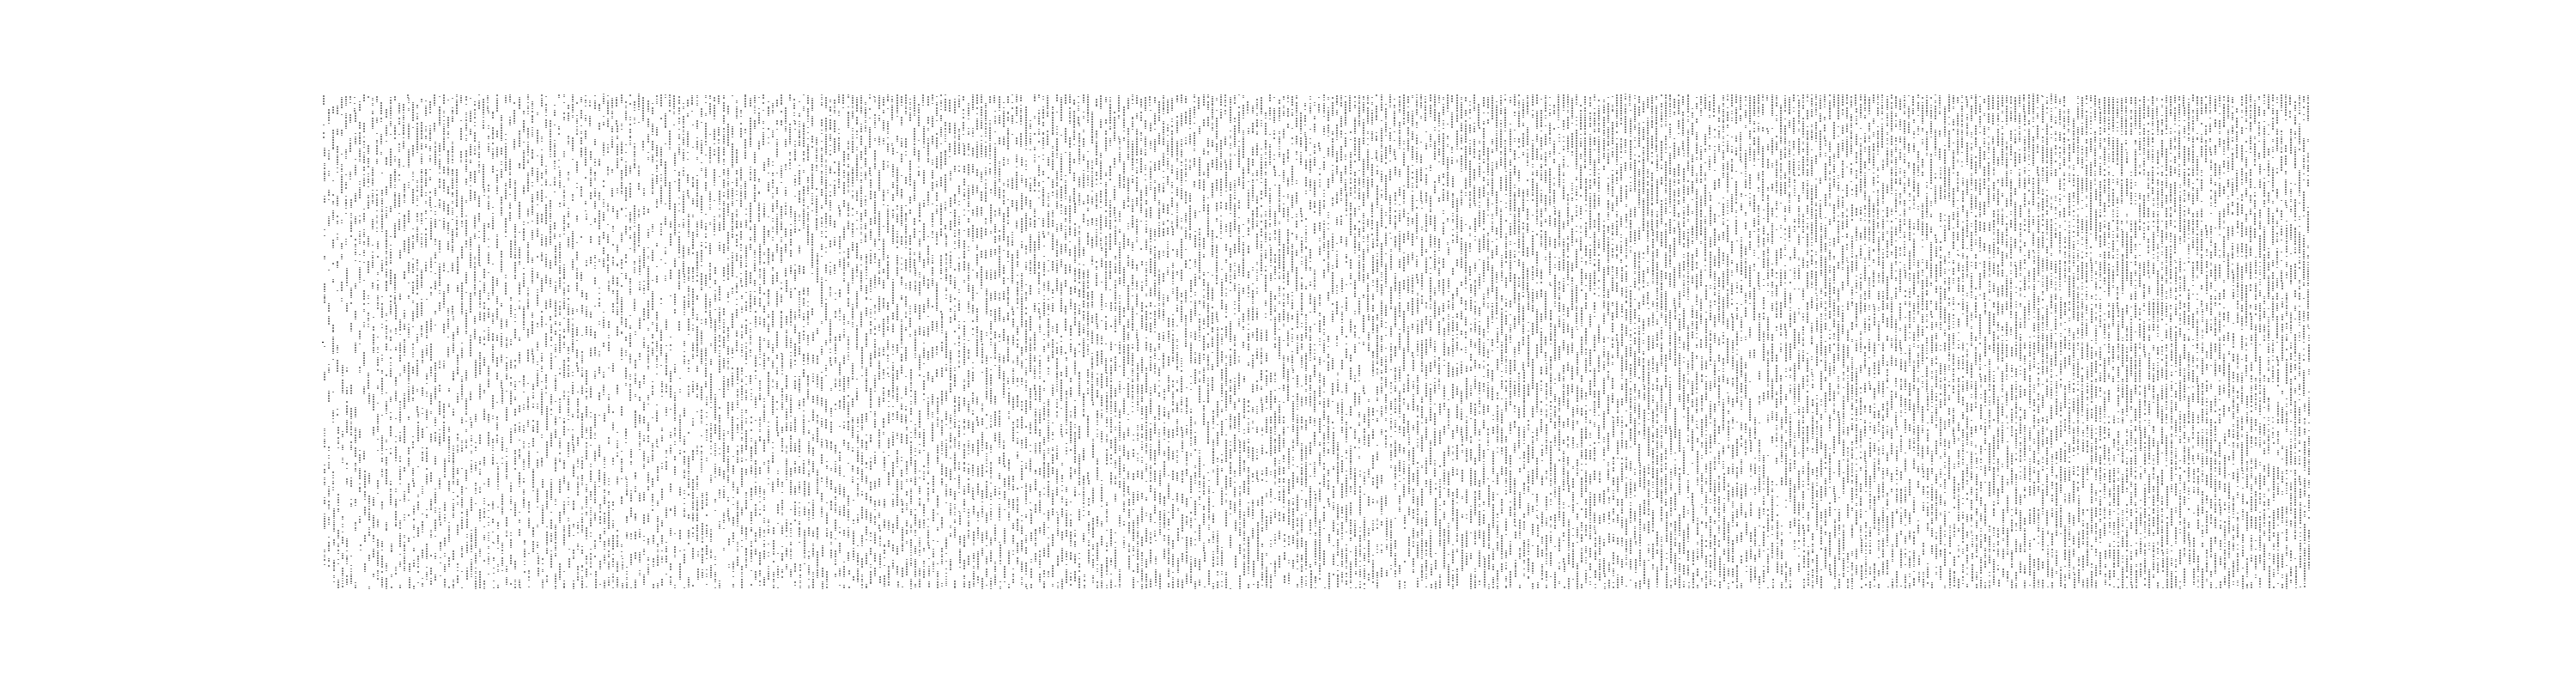

Asymmetry XZ =  0.0876857
Asymmetry YZ =  0.086532675
(239.1664351208669, 0.12503473186996672, -11.803278688524614, 0.050013892747983846)


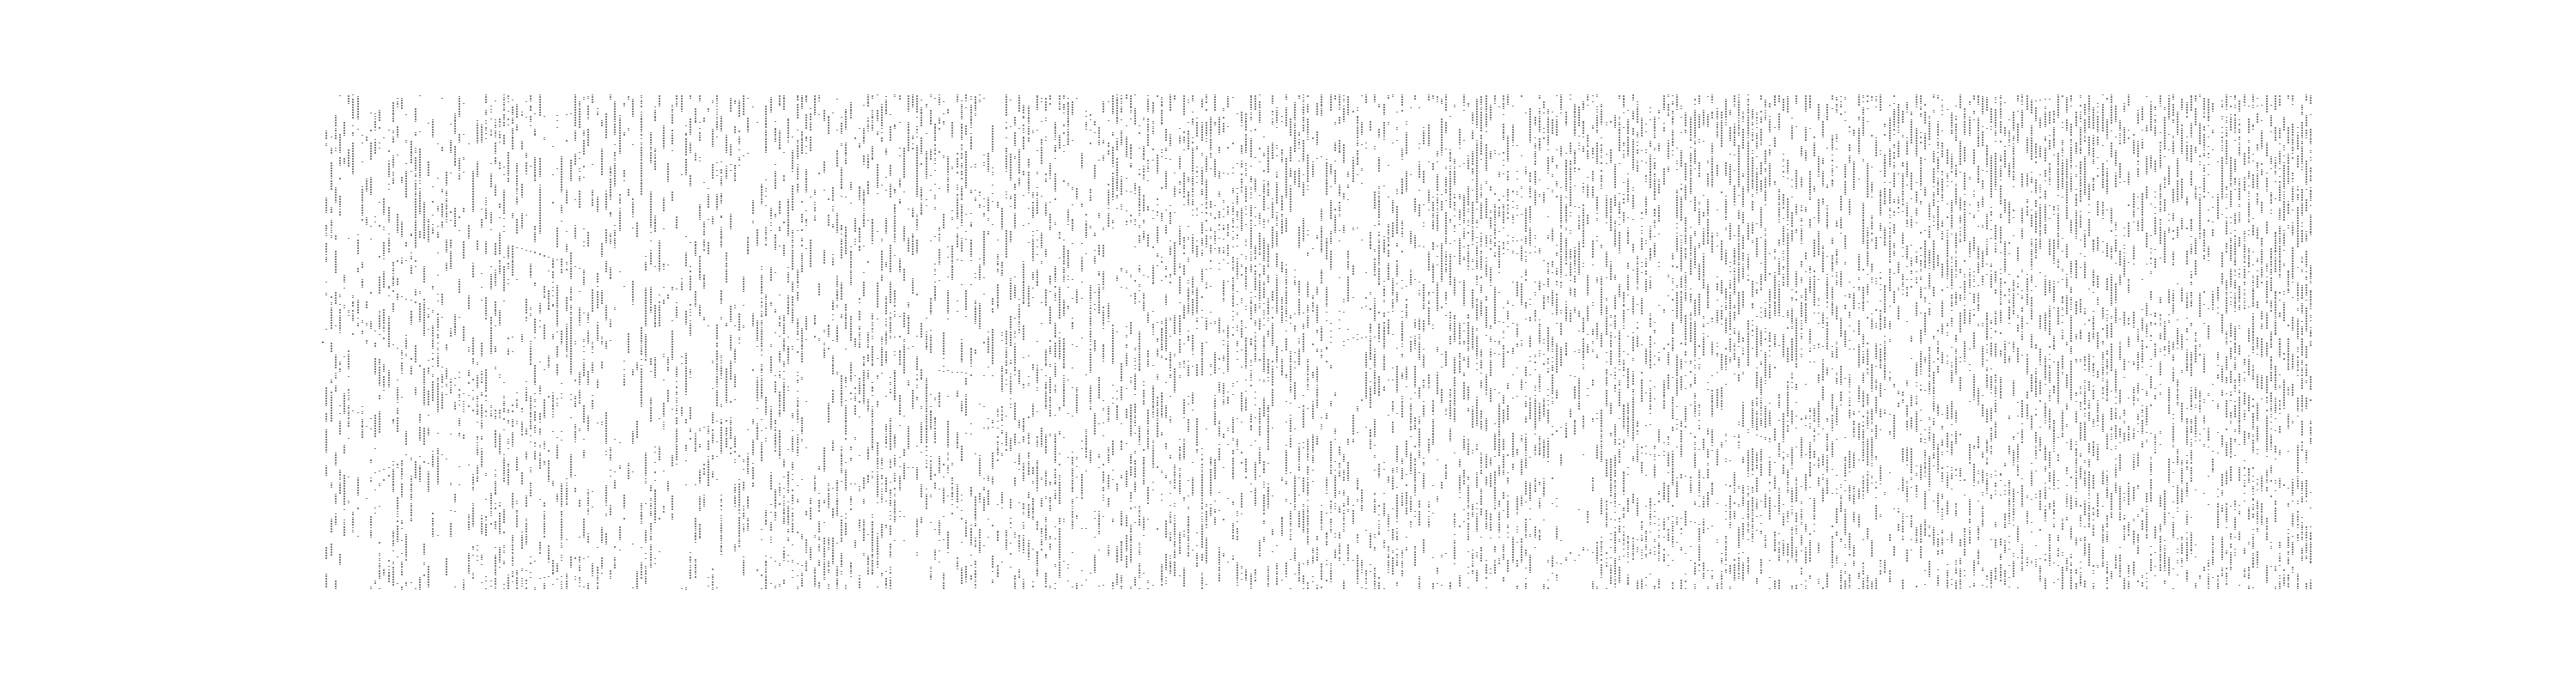

Run 46357 Subrun 47 Event 4073, 2023-04-30 05:07:17.525618


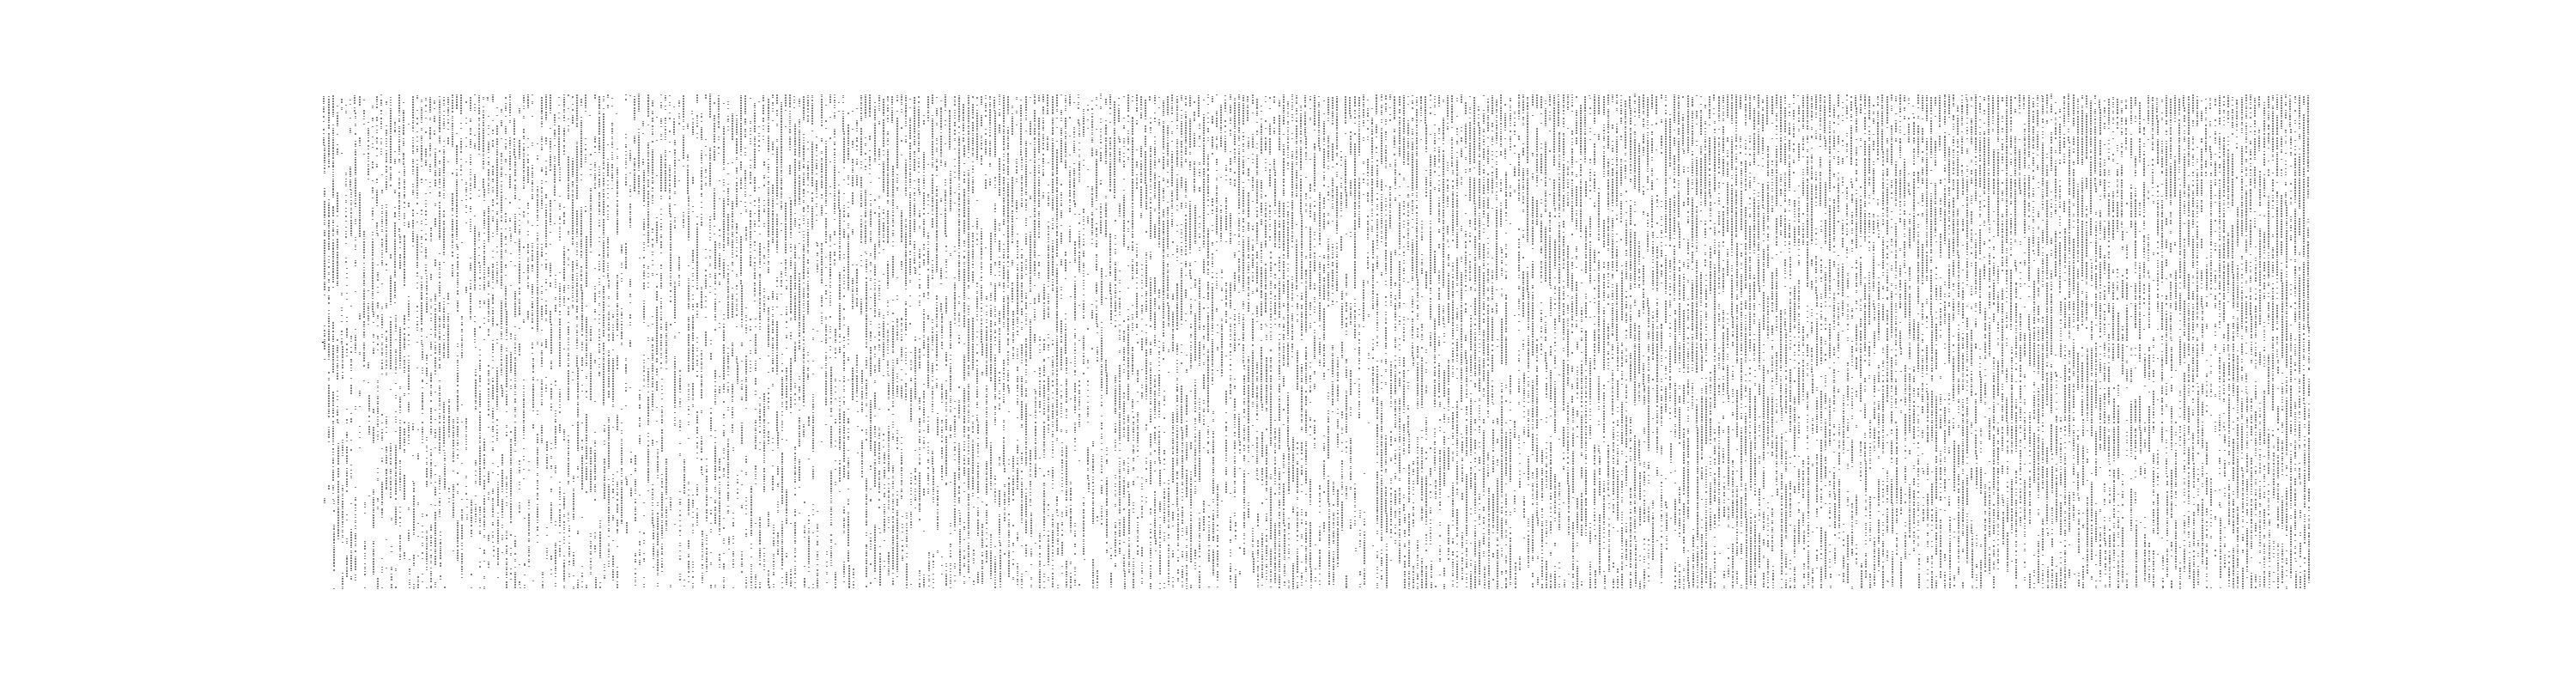

Asymmetry XZ =  0.07783885
Asymmetry YZ =  0.08386895
(0, 0, 0, 0)


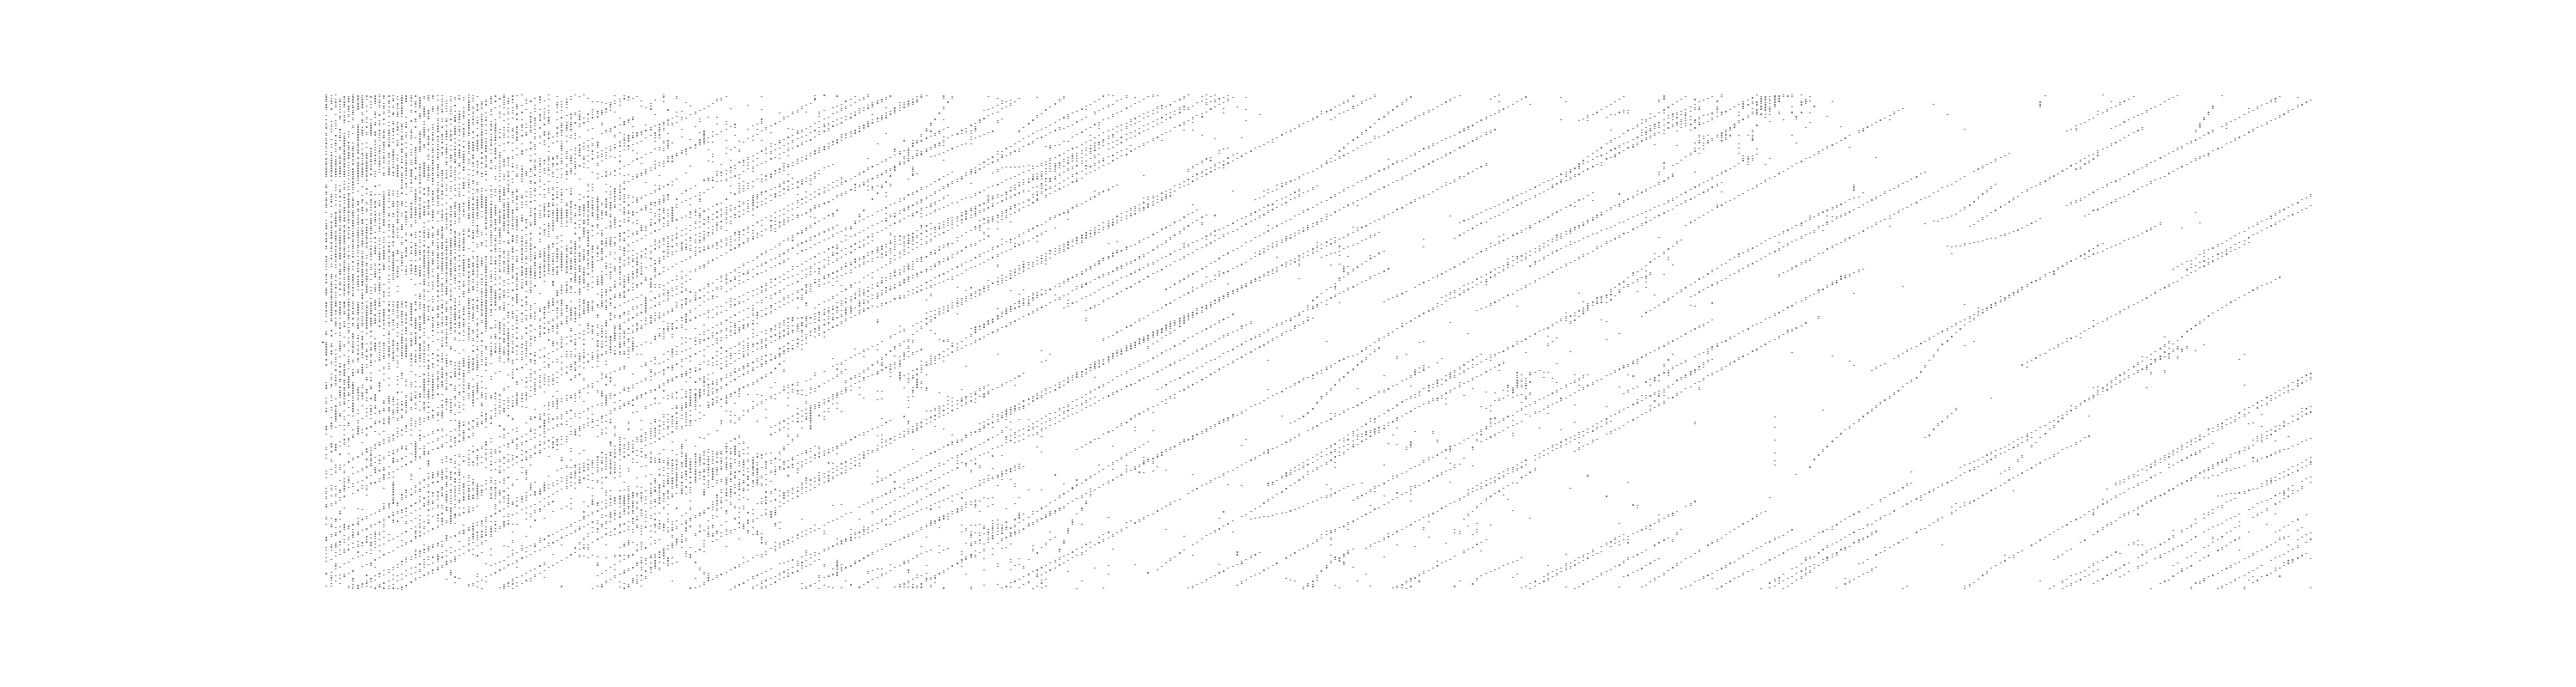

Run 46357 Subrun 47 Event 4350, 2023-04-30 05:09:00.008655


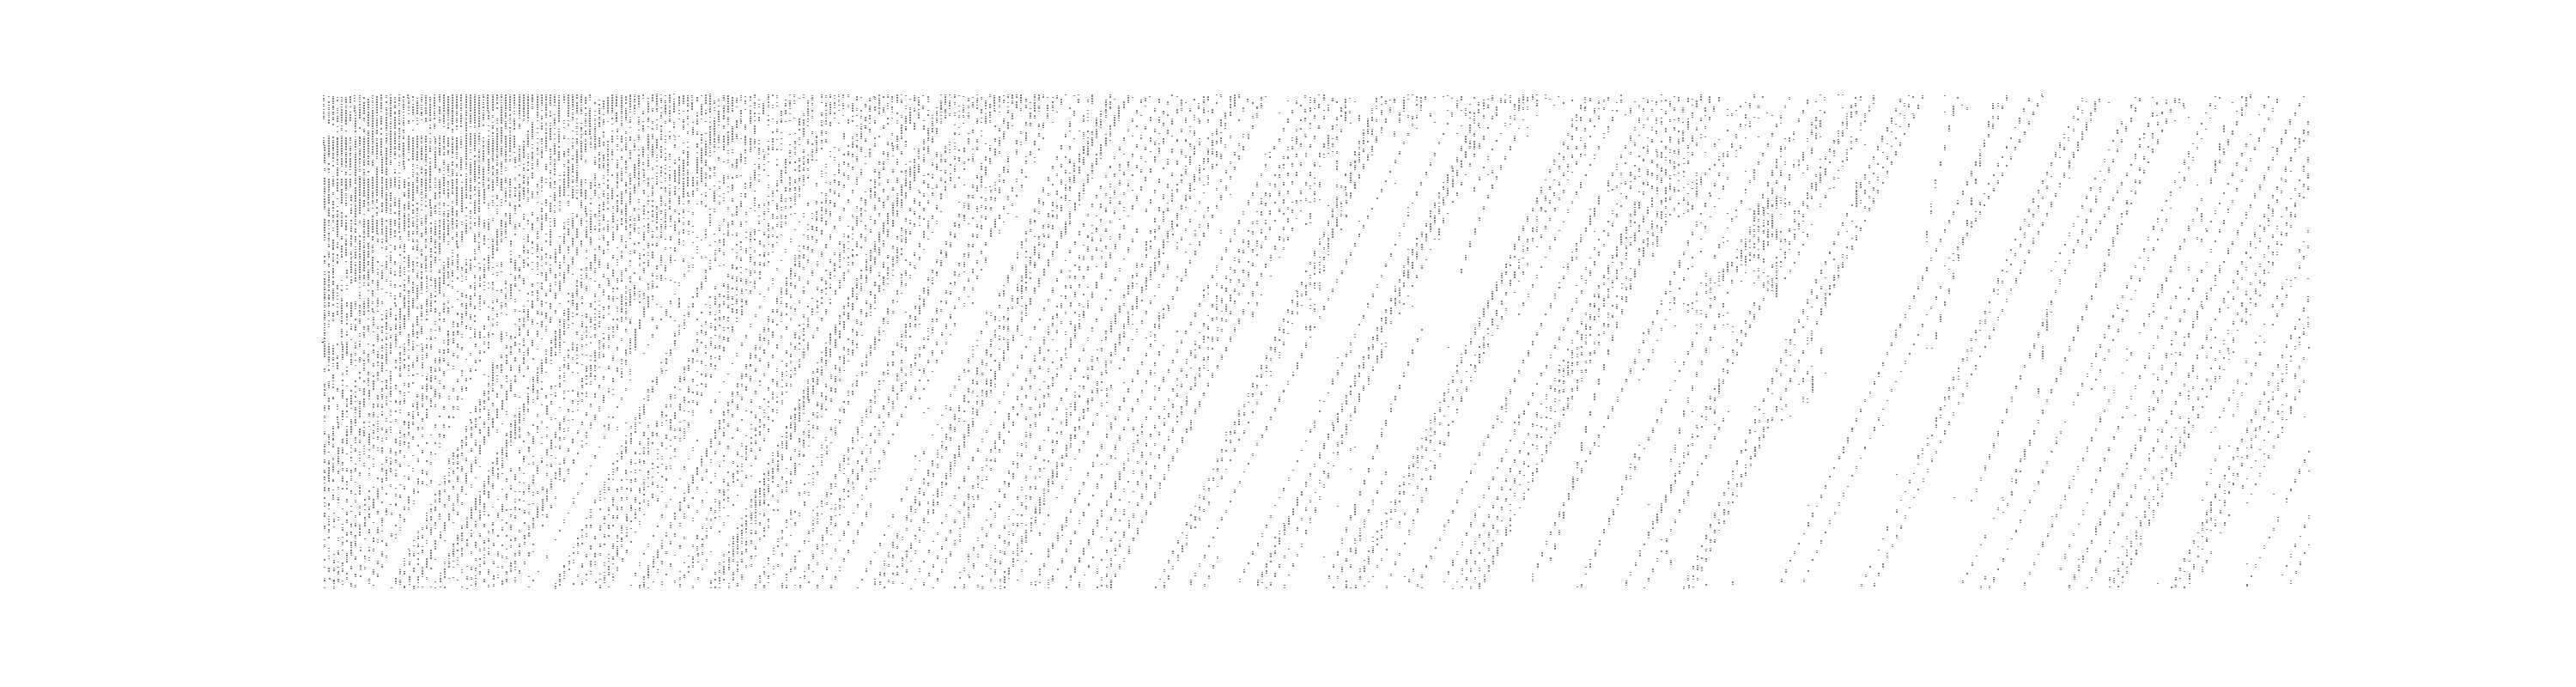

Asymmetry XZ =  0.15610537
Asymmetry YZ =  0.11374135
(332.242289524868, 0.4131825639808968, 25.432064462350667, 0.3250903028619079)


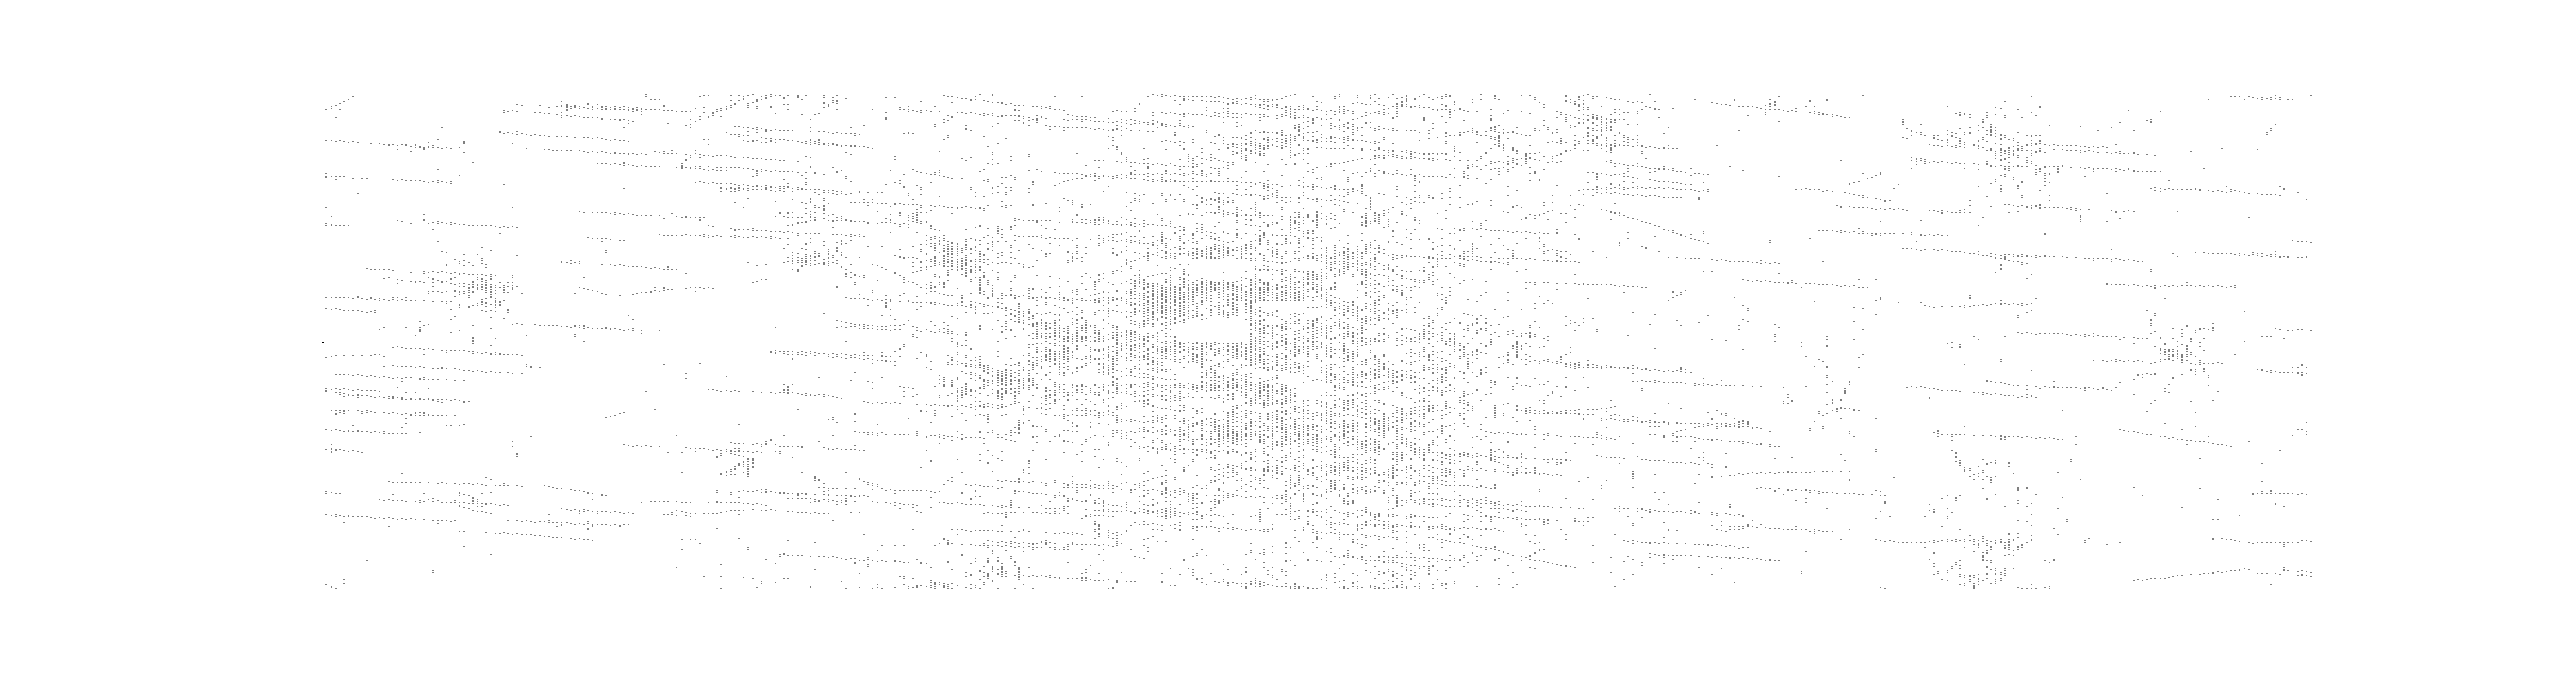

Run 46357 Subrun 52 Event 6388, 2023-04-30 05:23:18.296636


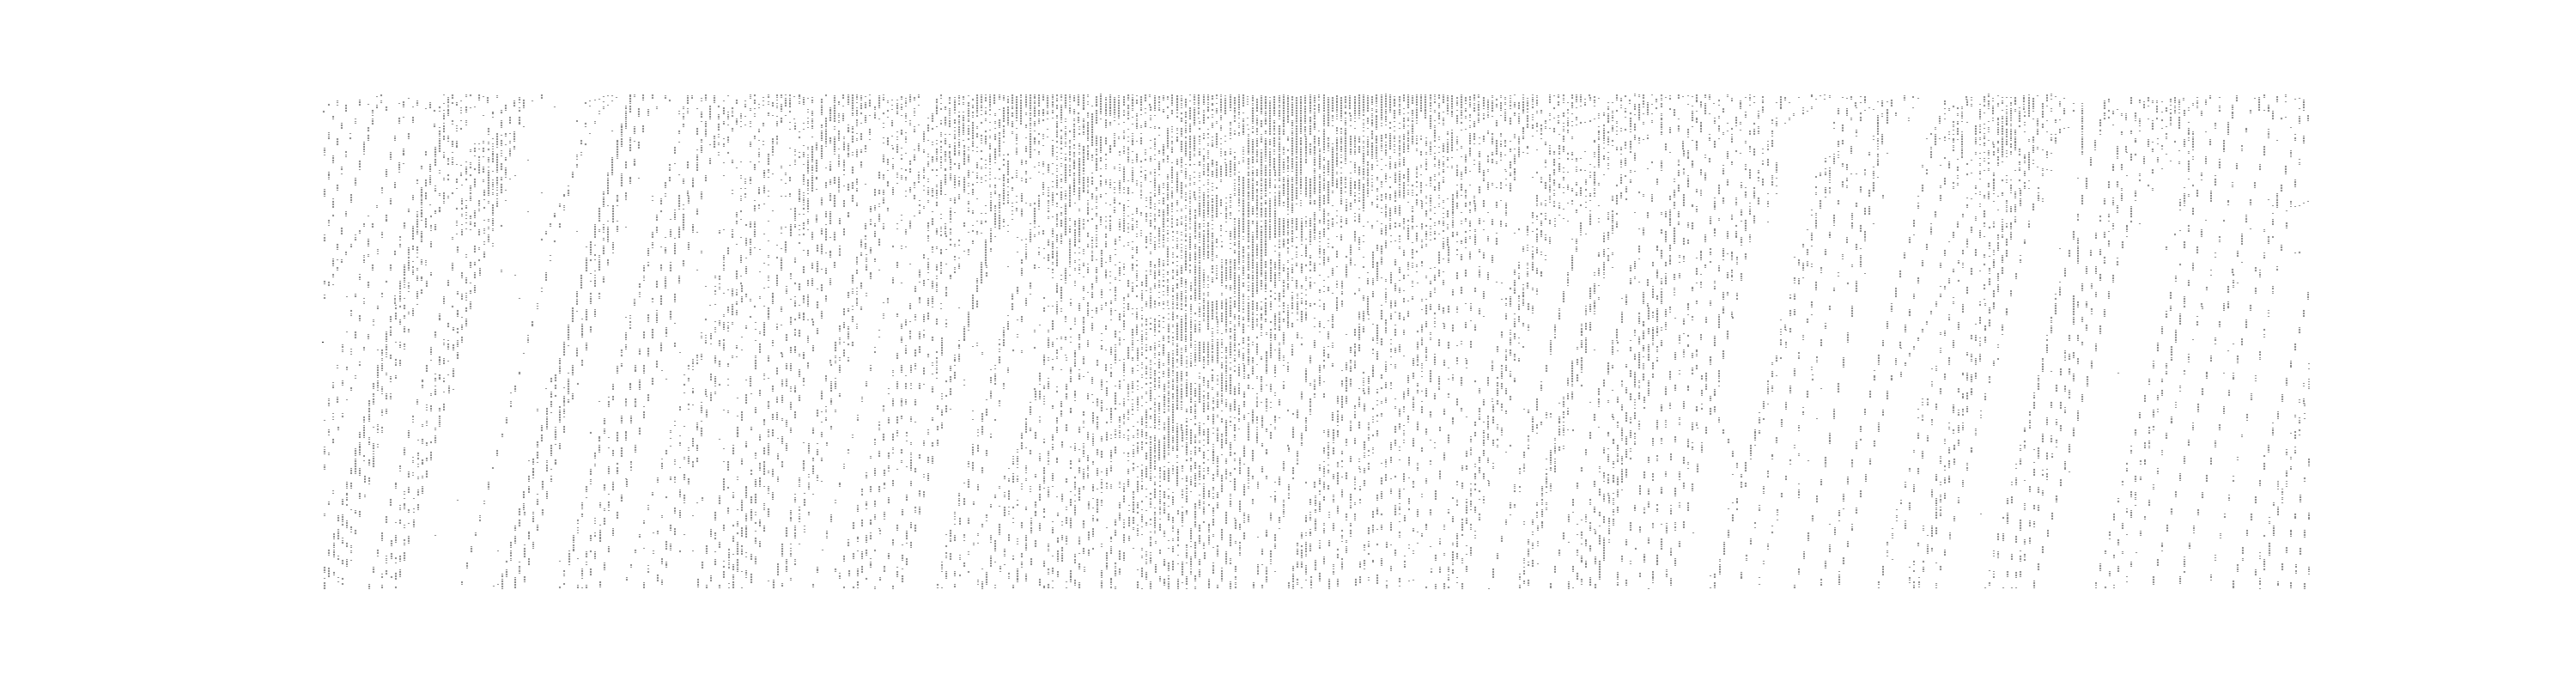

Asymmetry XZ =  0.27280593
Asymmetry YZ =  0.19984151
(0, 0, 0, 0)


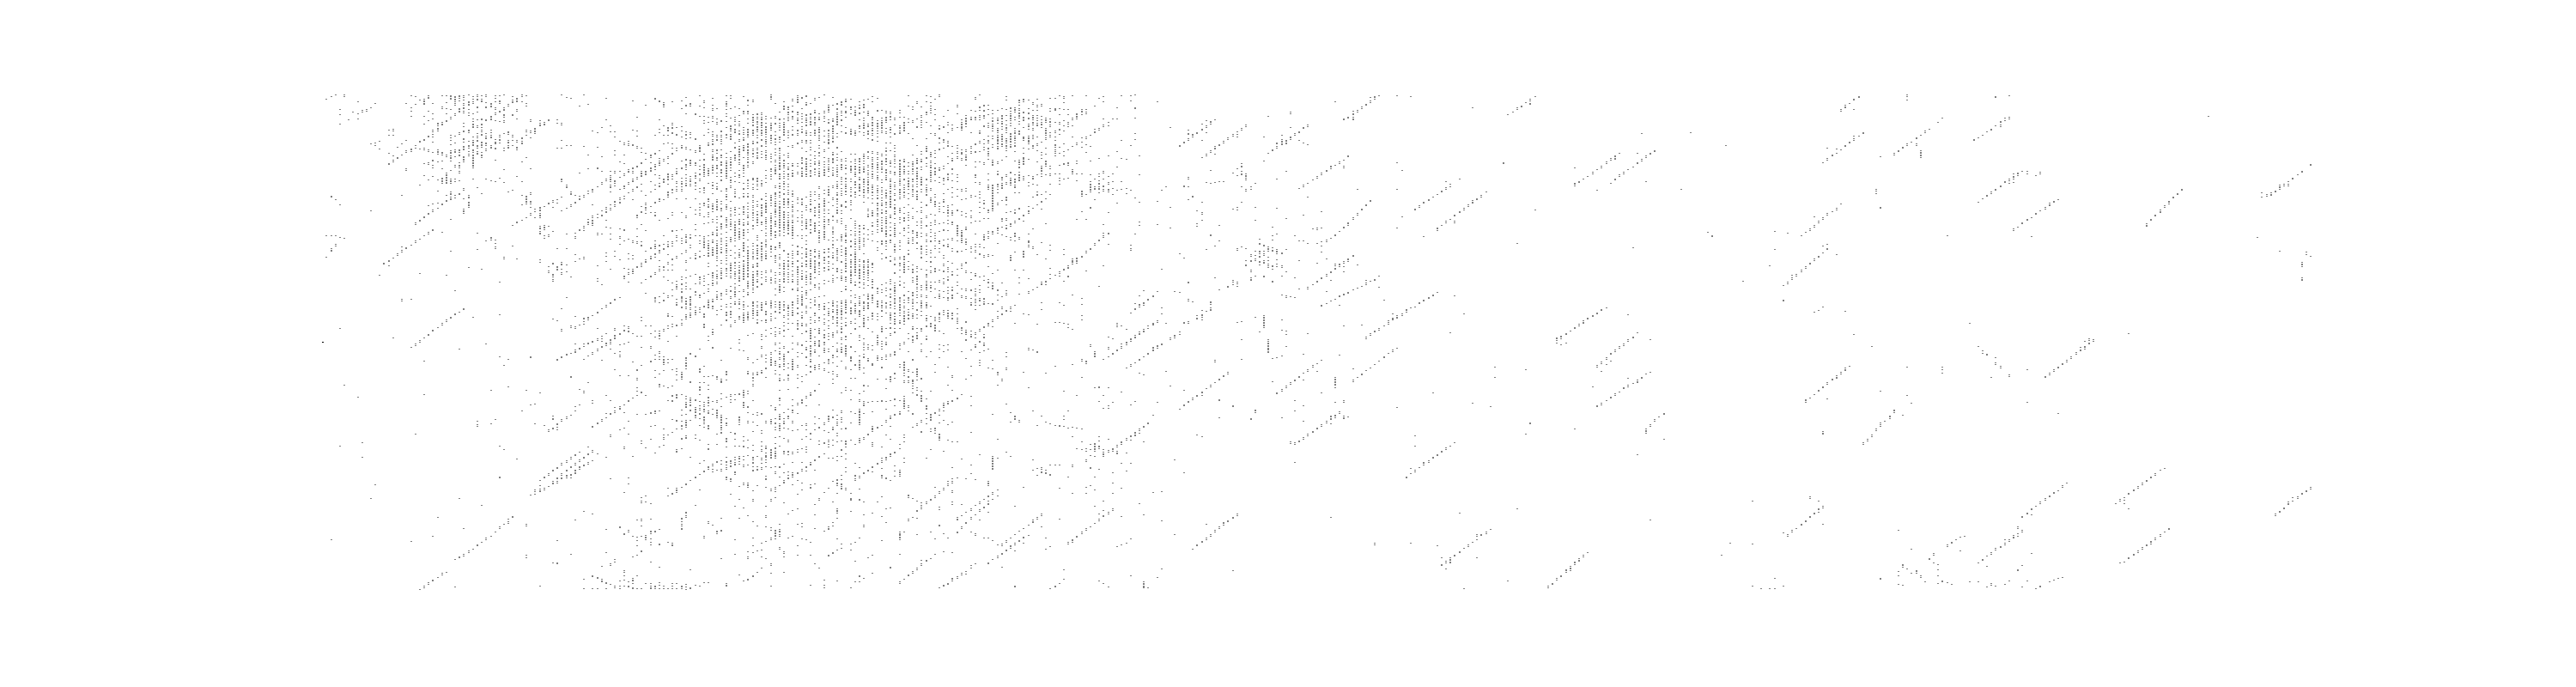

Run 46357 Subrun 58 Event 3677, 2023-04-30 05:38:58.101140


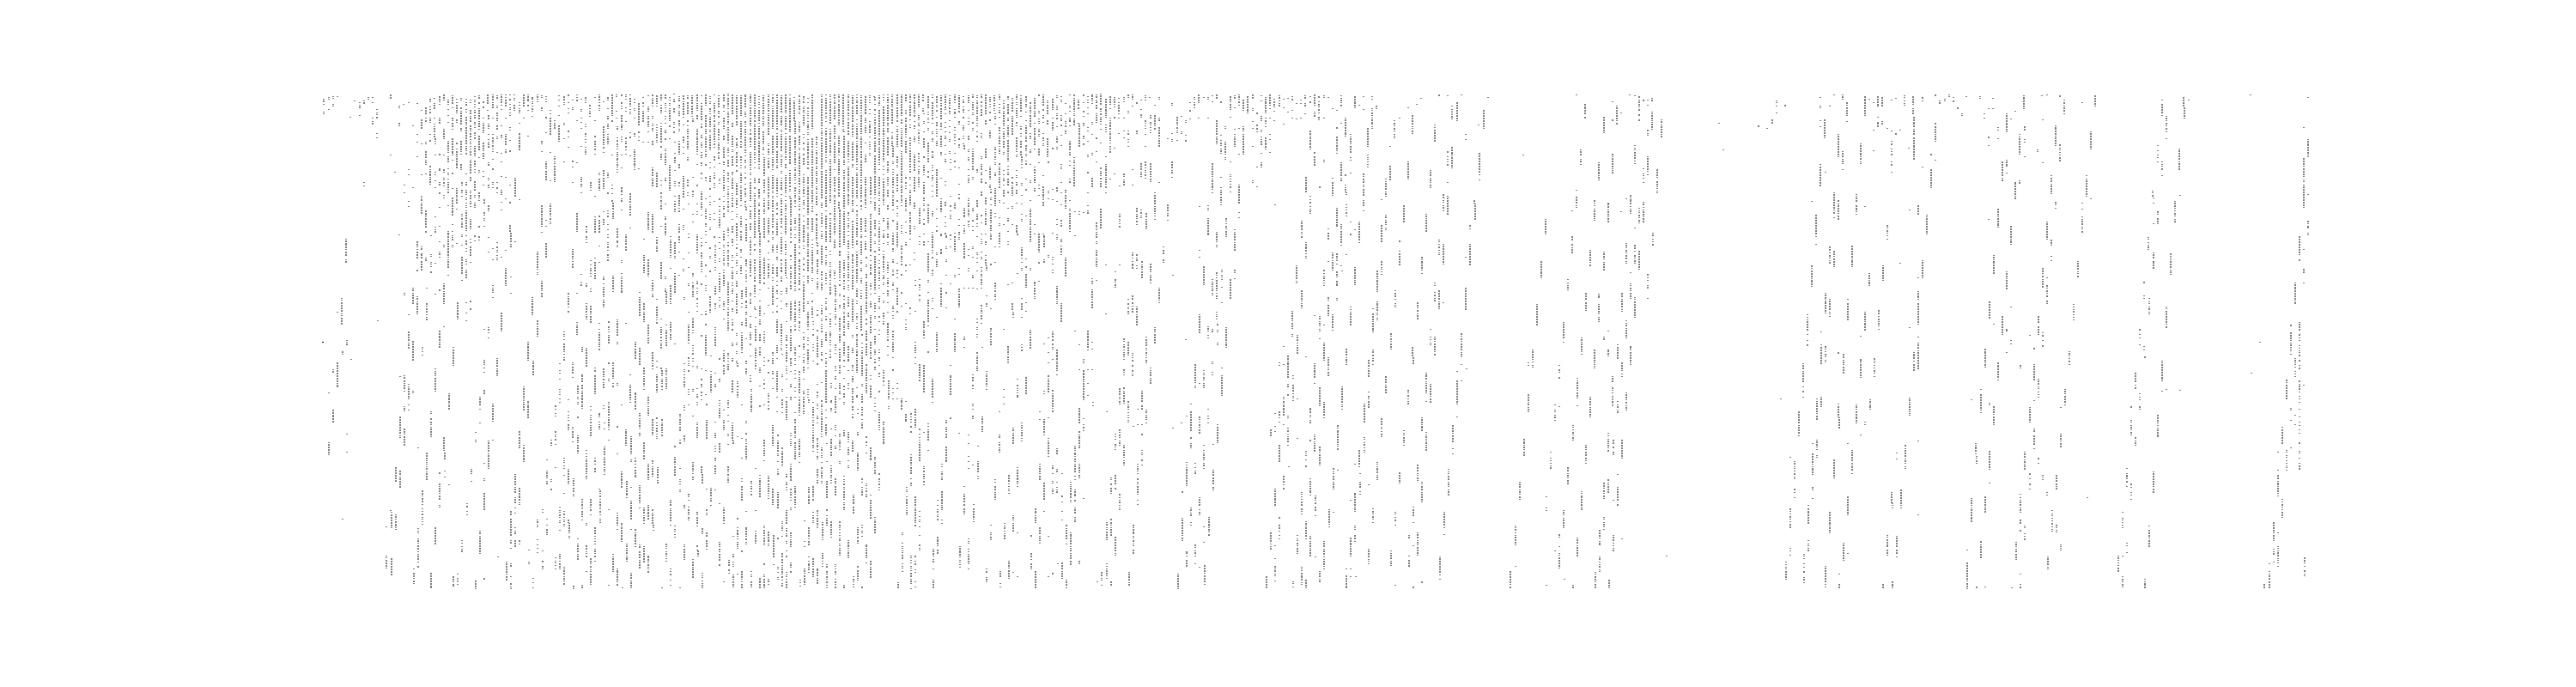

Asymmetry XZ =  0.0844294
Asymmetry YZ =  0.08997931
(0, 0, 0, 0)


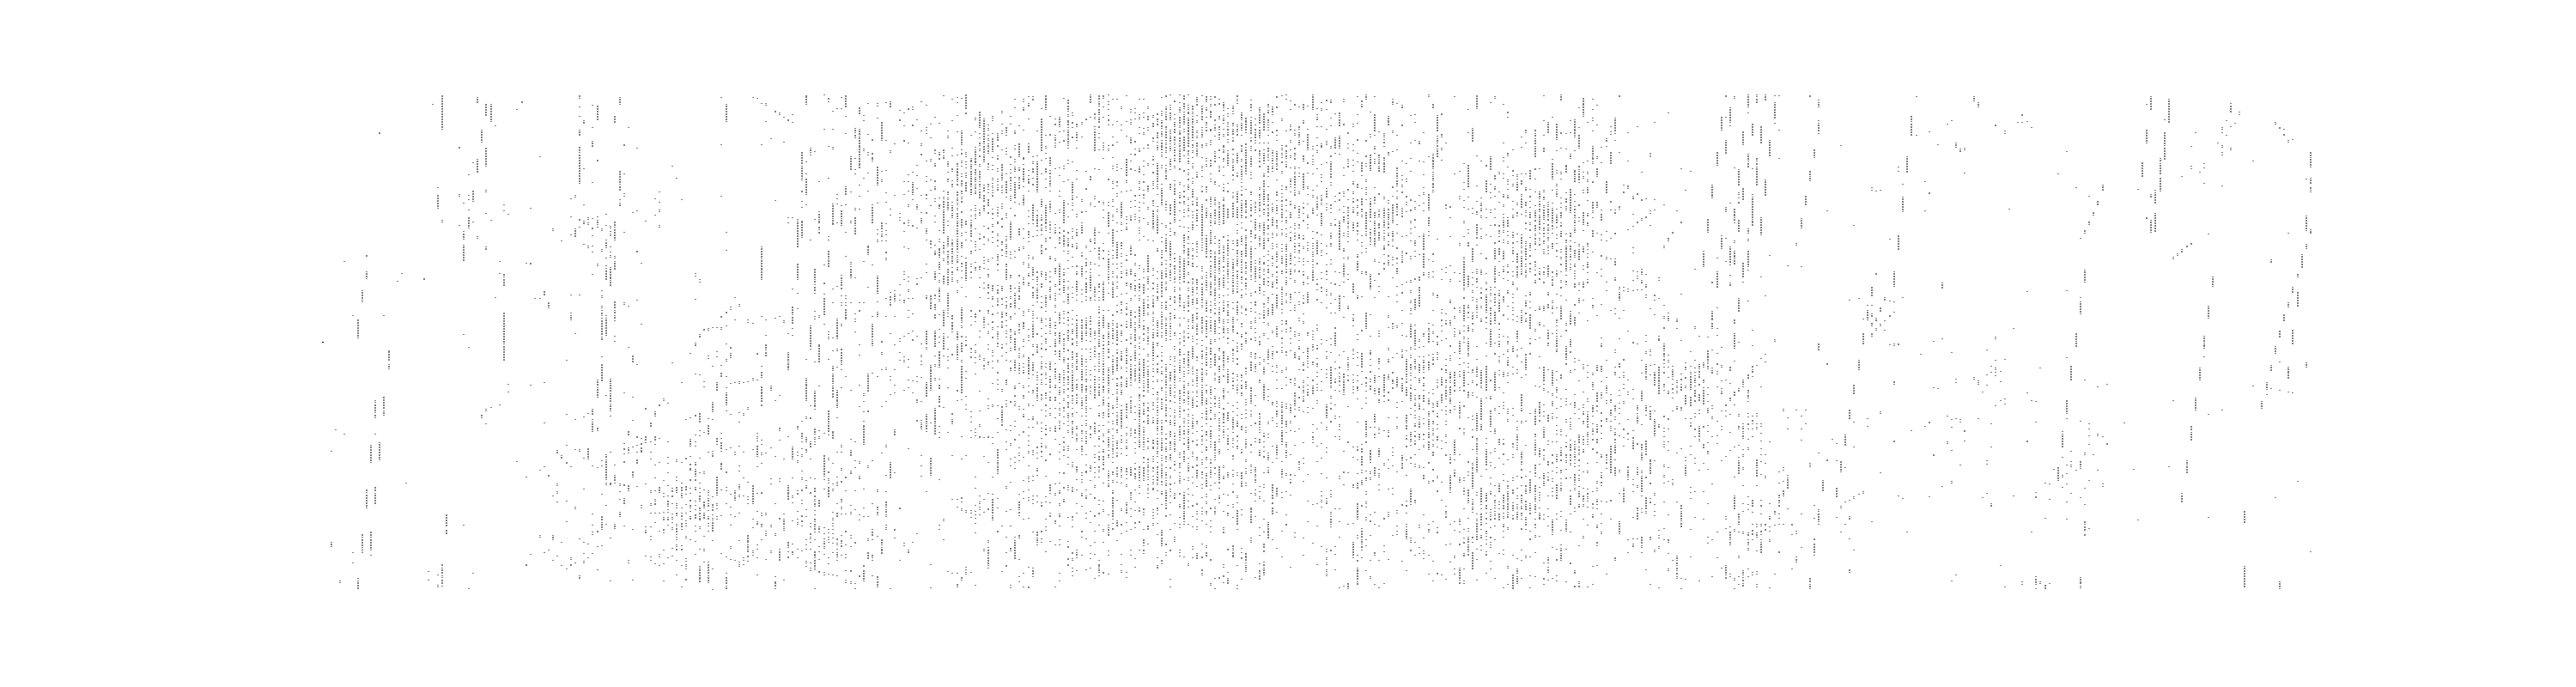

Run 46357 Subrun 62 Event 3410, 2023-04-30 05:50:07.595142


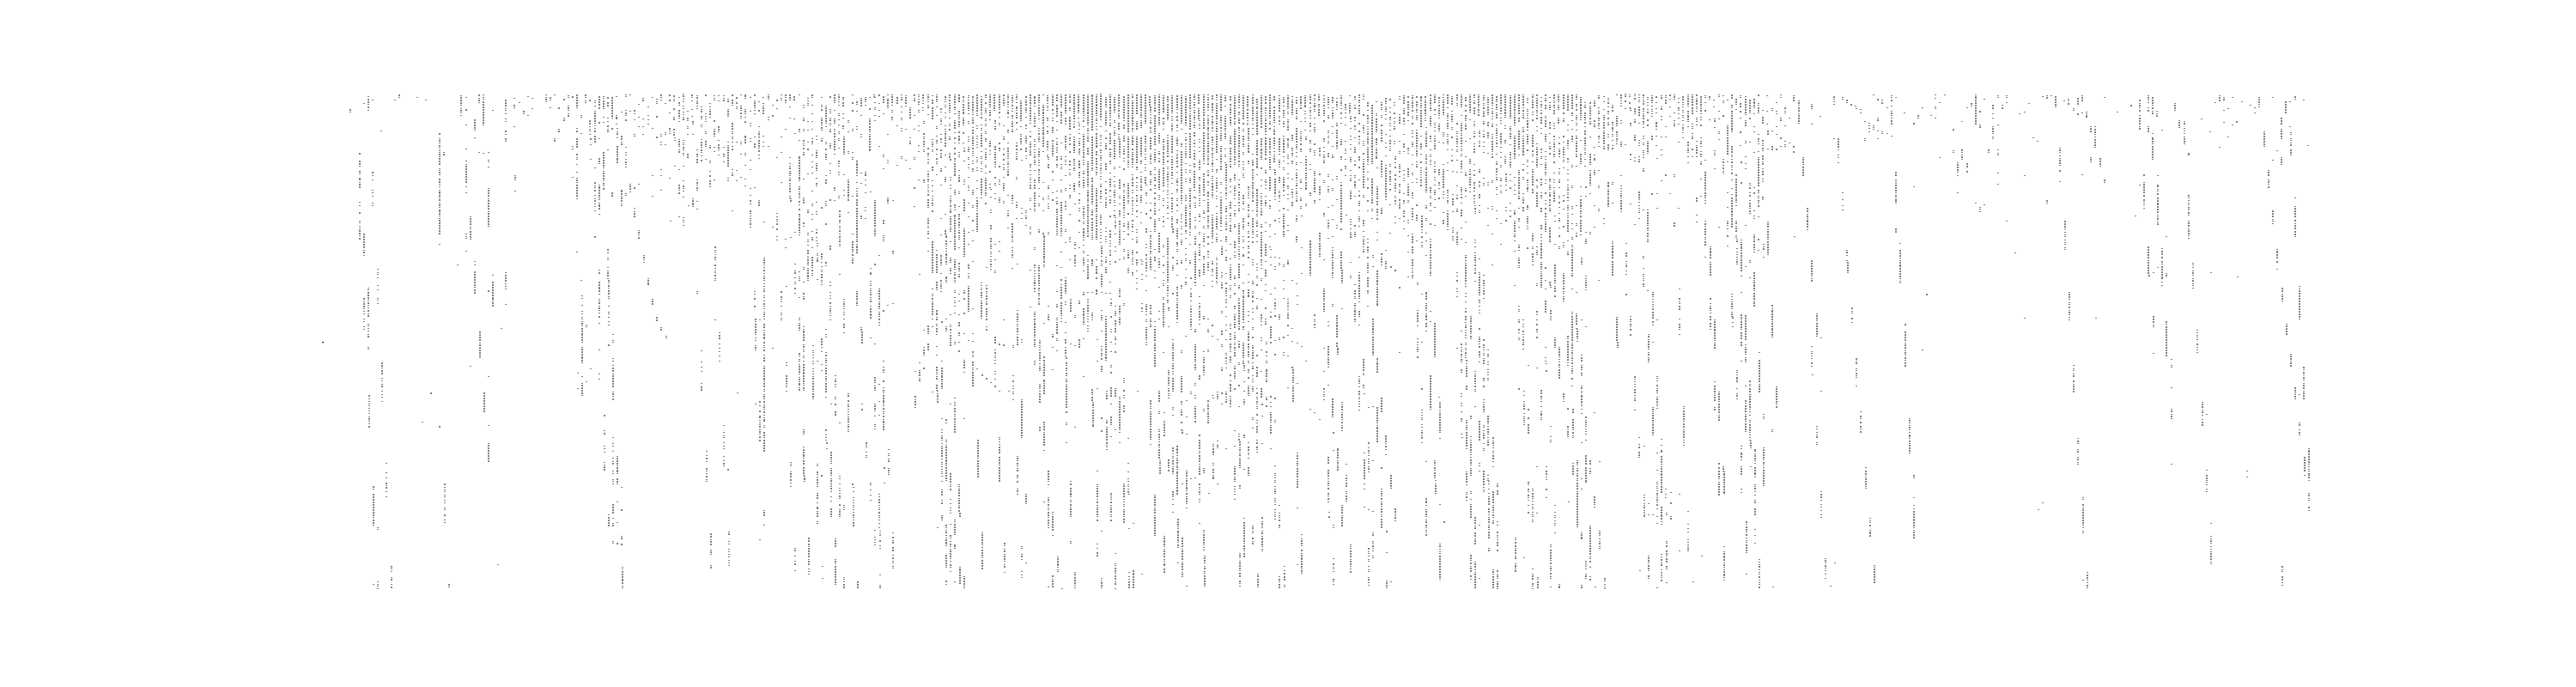

Asymmetry XZ =  0.3034182
Asymmetry YZ =  0.28242144
(0, 0, 0, 0)


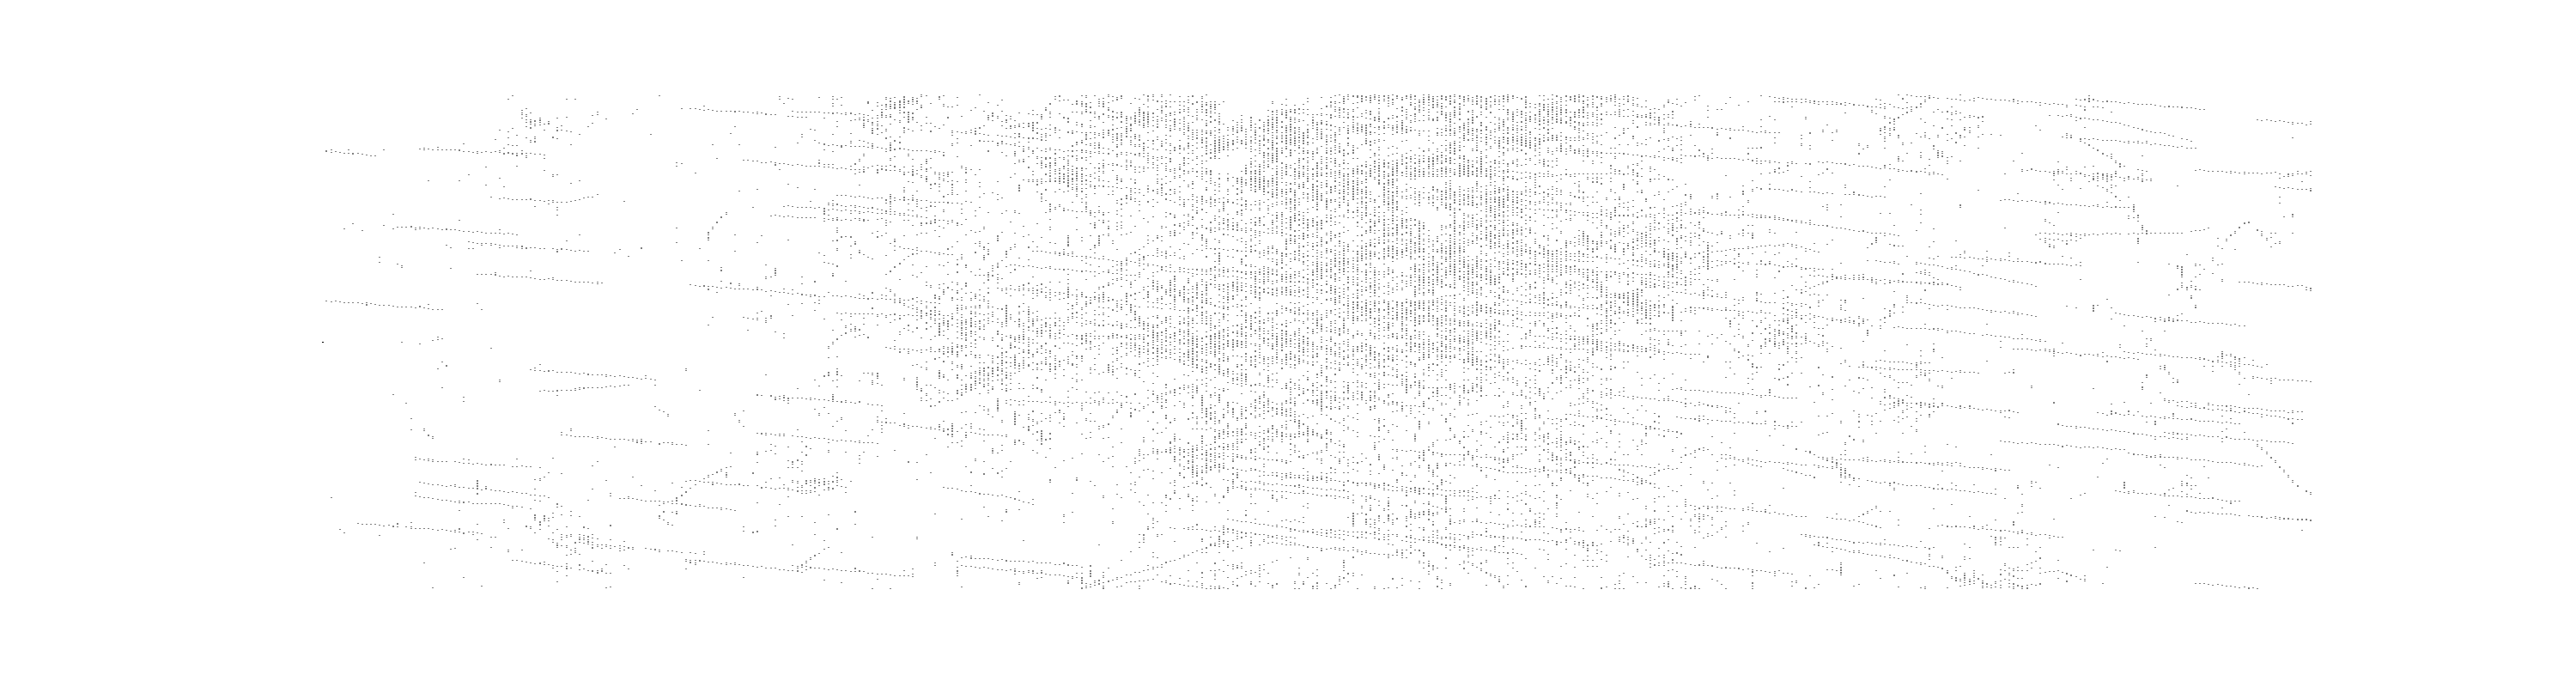

Run 46358 Subrun 4 Event 2928, 2023-04-30 06:05:57.129016


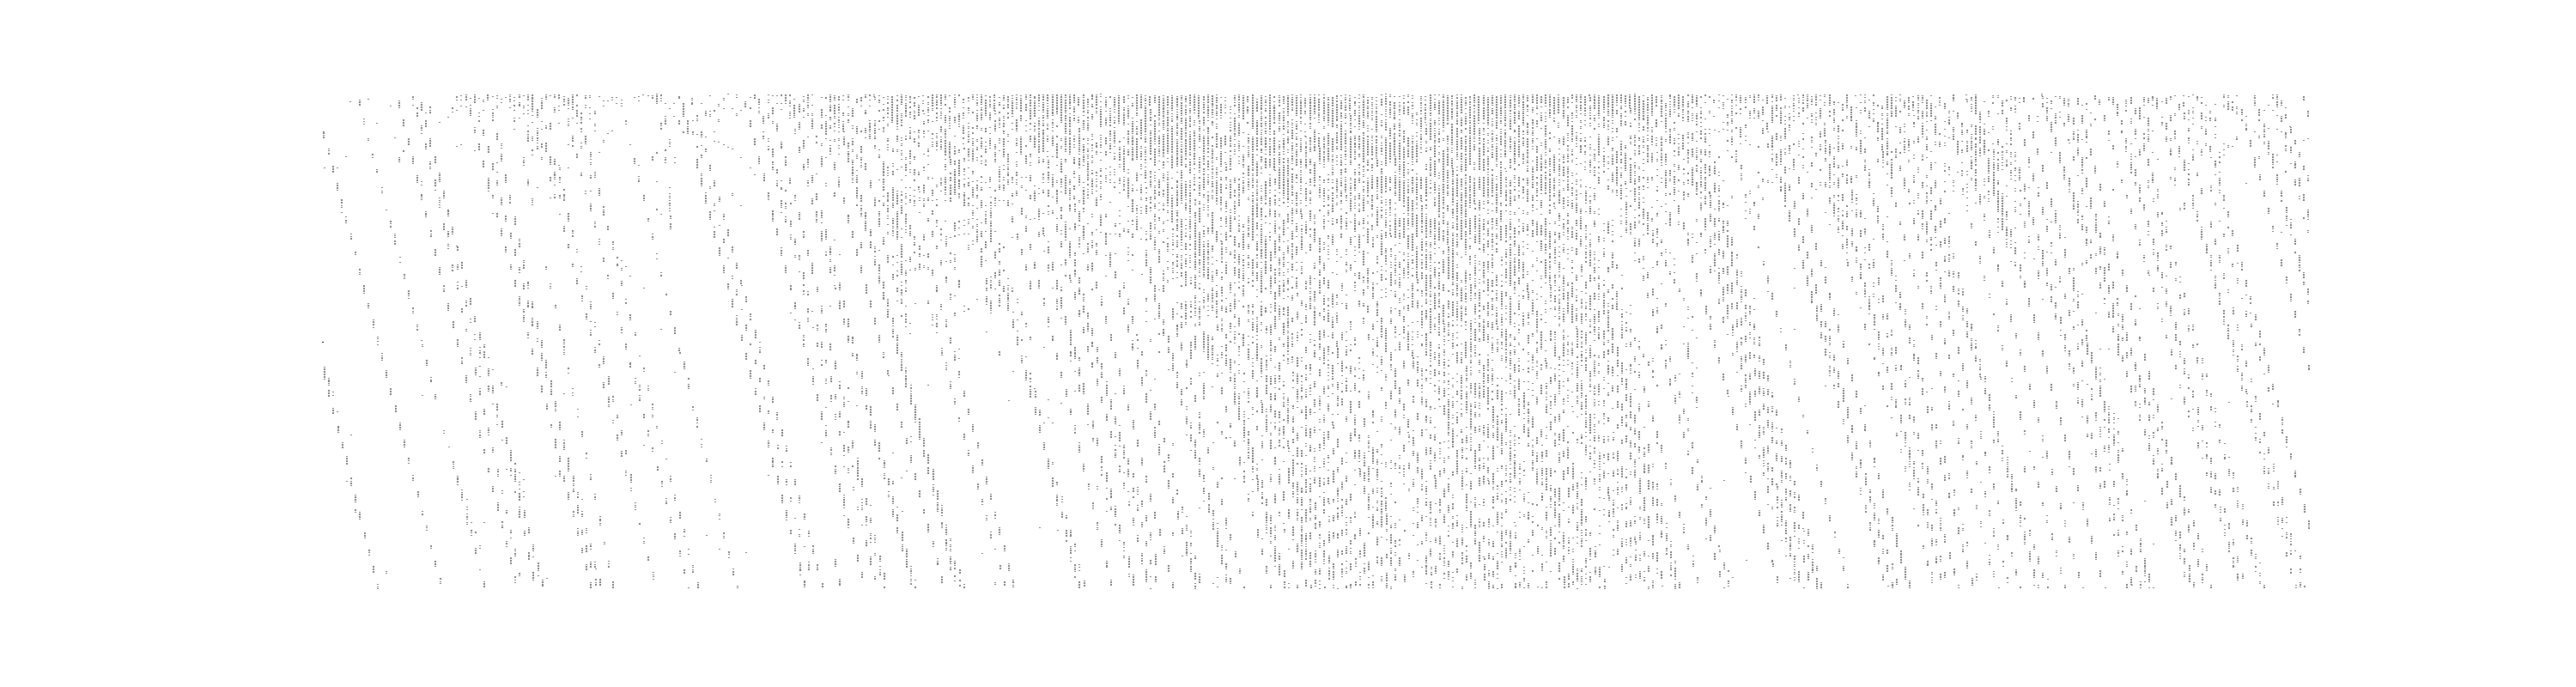

Asymmetry XZ =  0.28402346
Asymmetry YZ =  0.22322422
(0, 0, 0, 0)


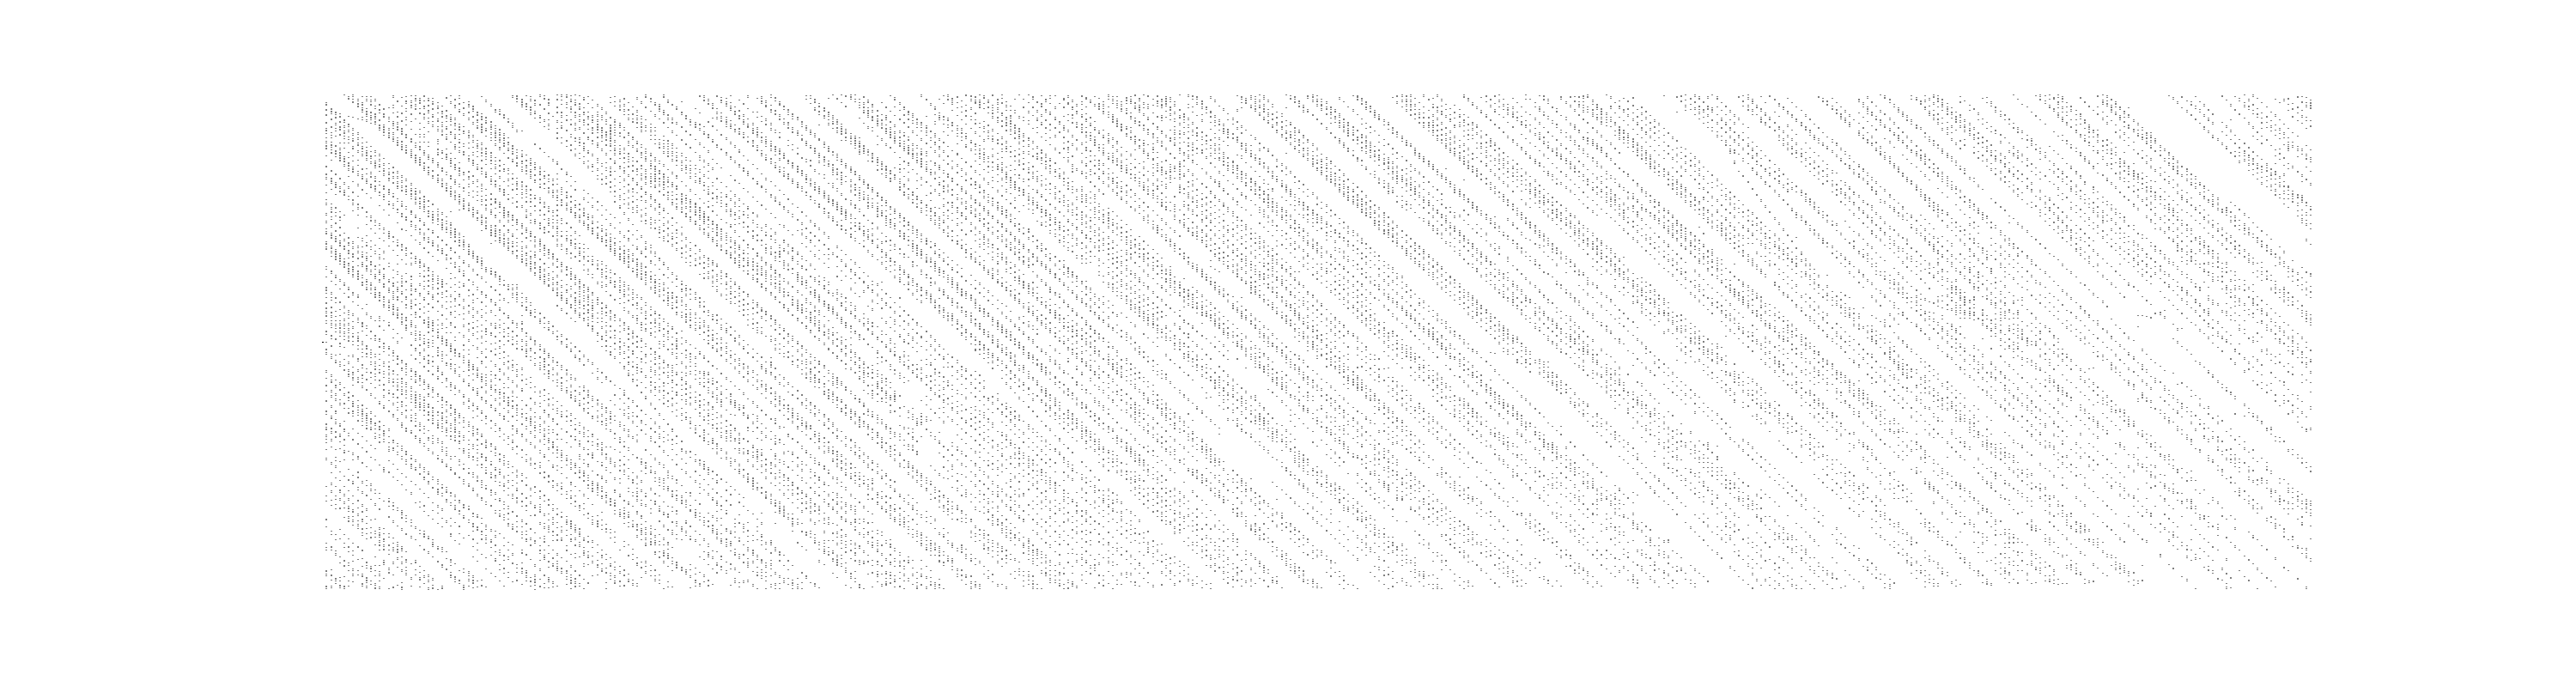

Run 46358 Subrun 6 Event 705, 2023-04-30 06:09:52.288594


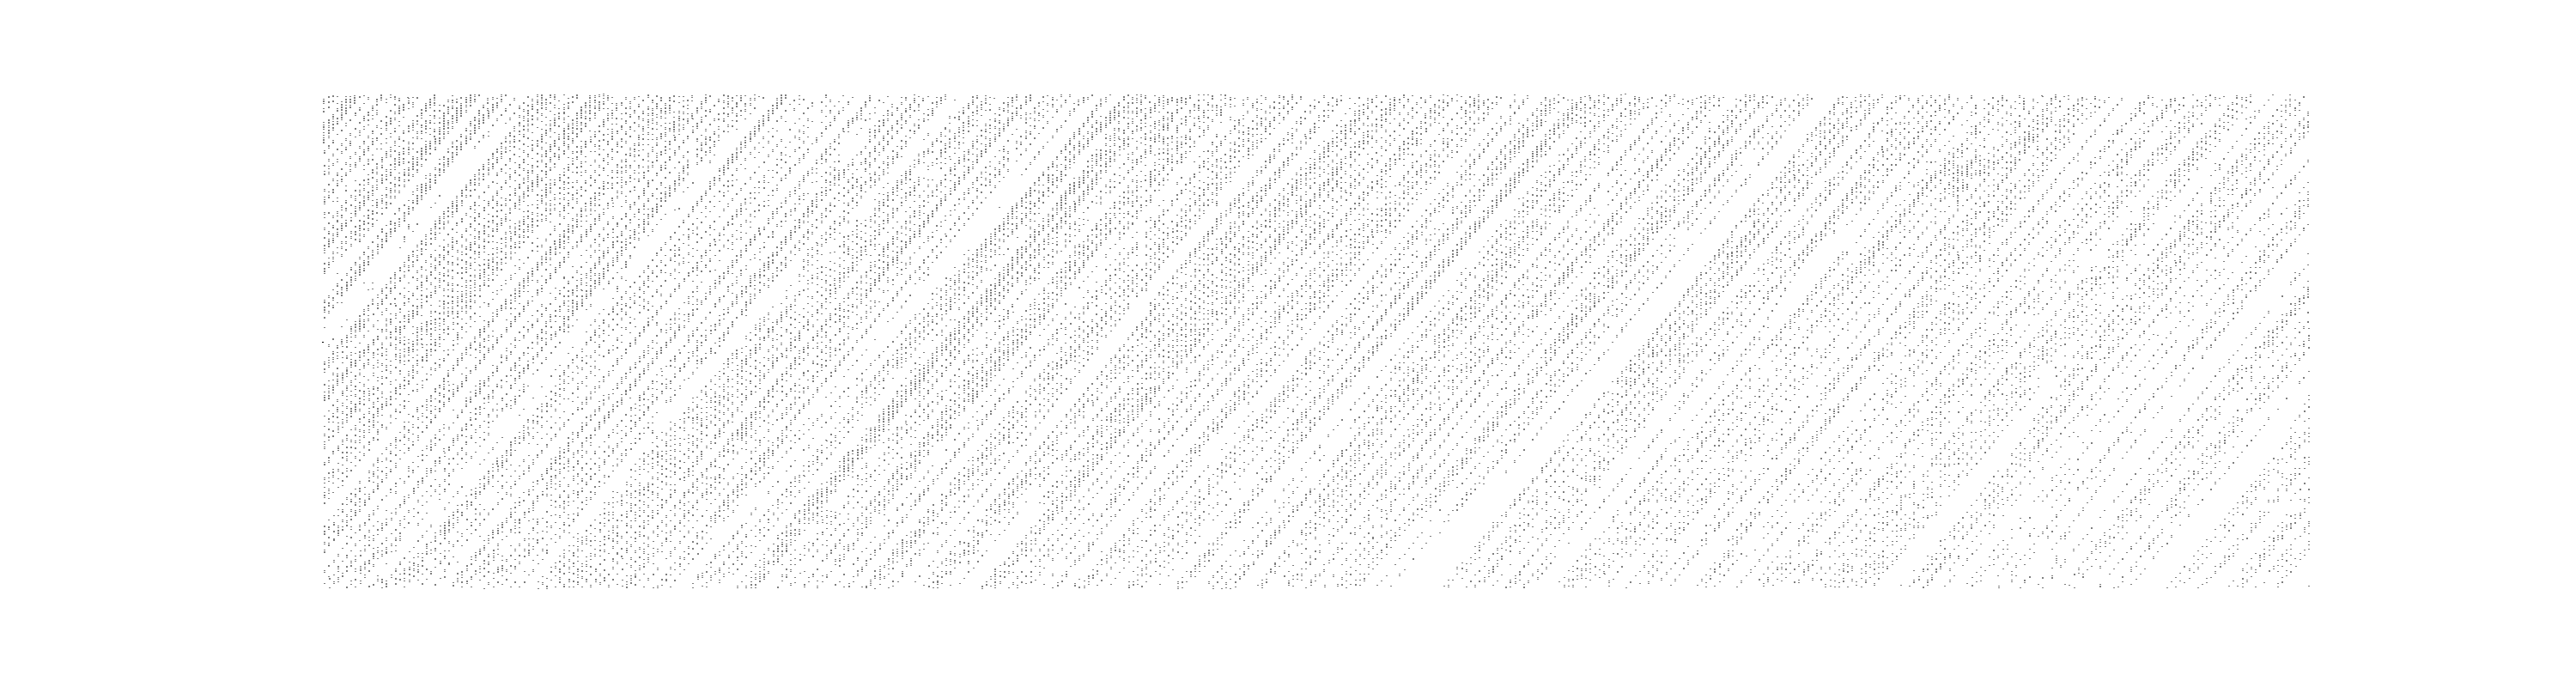

Asymmetry XZ =  0.08349536
Asymmetry YZ =  0.08547447
(43.36482356210058, 0.2056877524125767, 39.32592386774104, 0.12858531946611879)


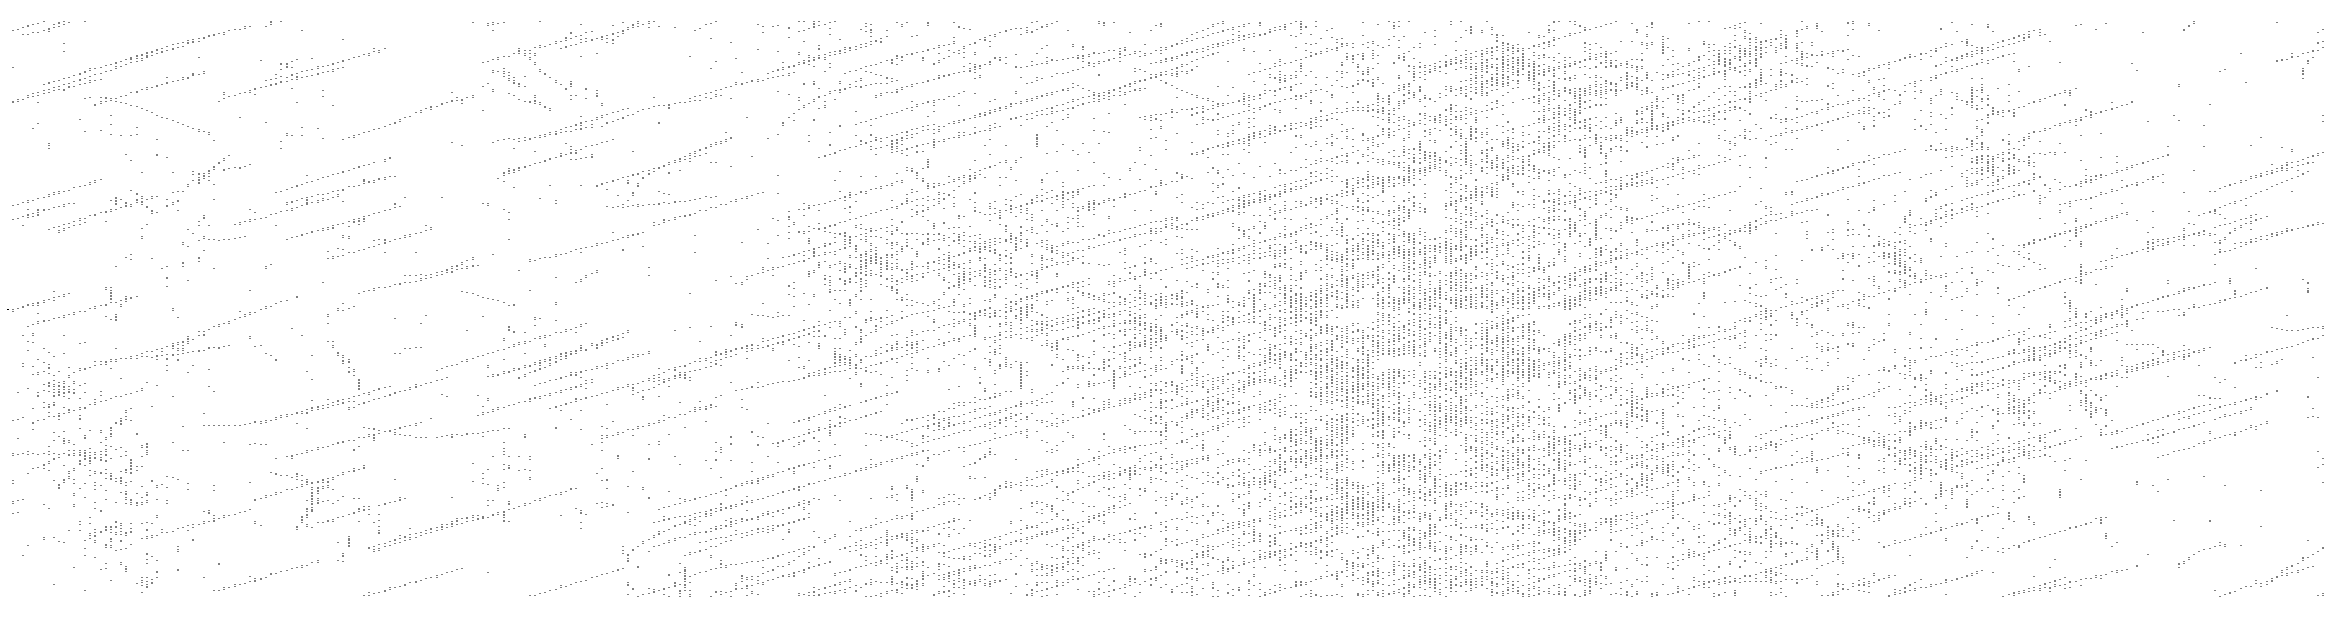

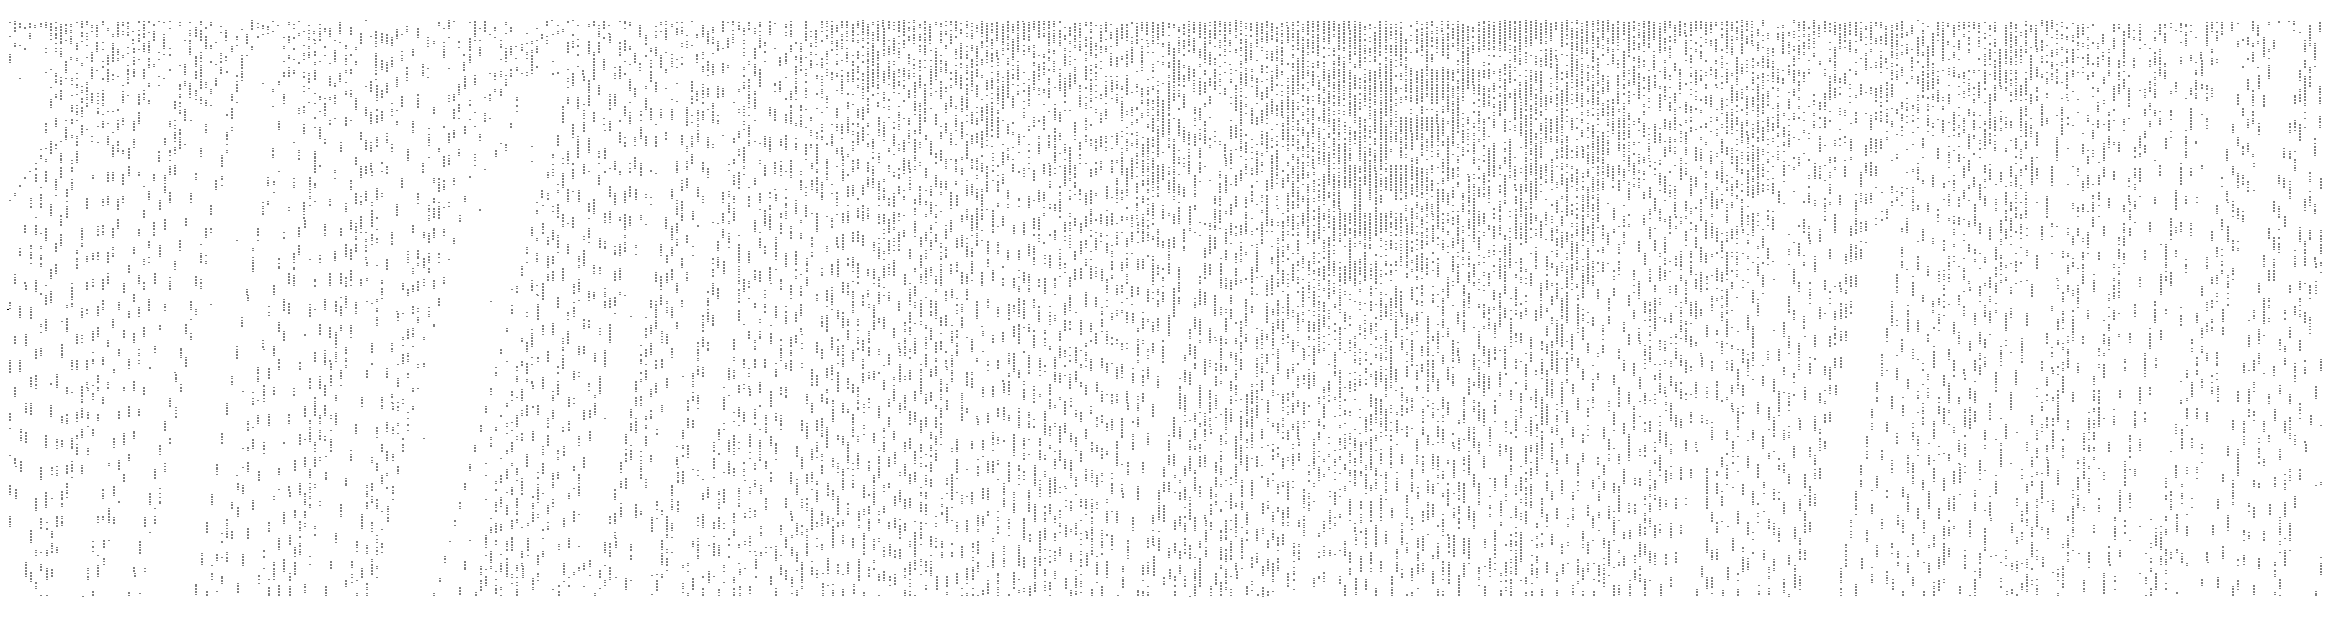

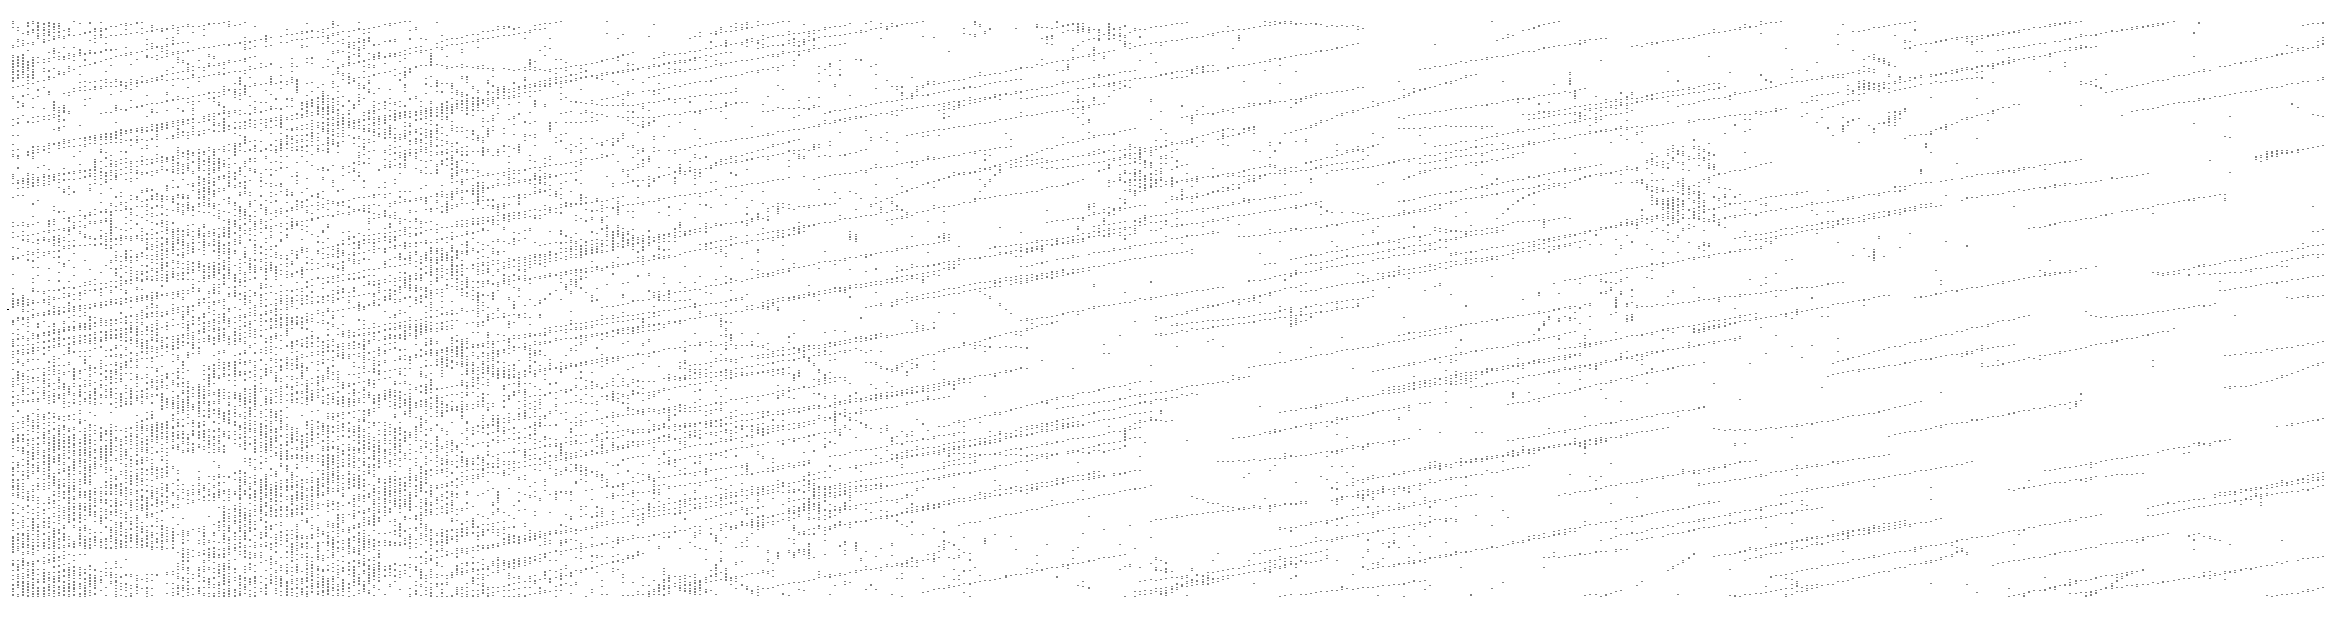

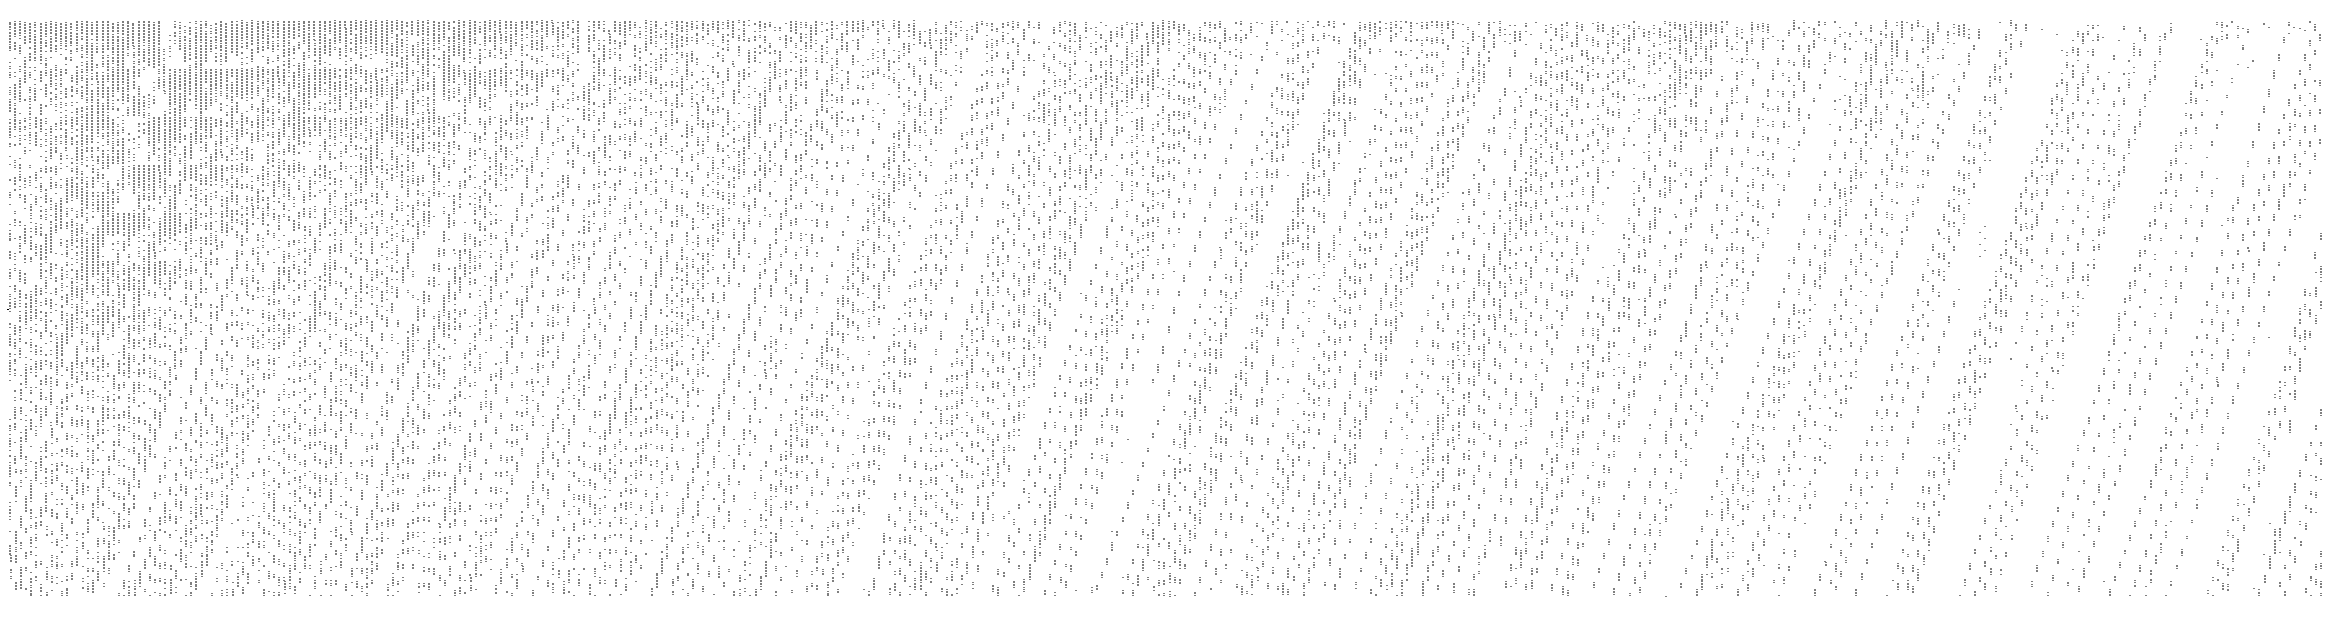

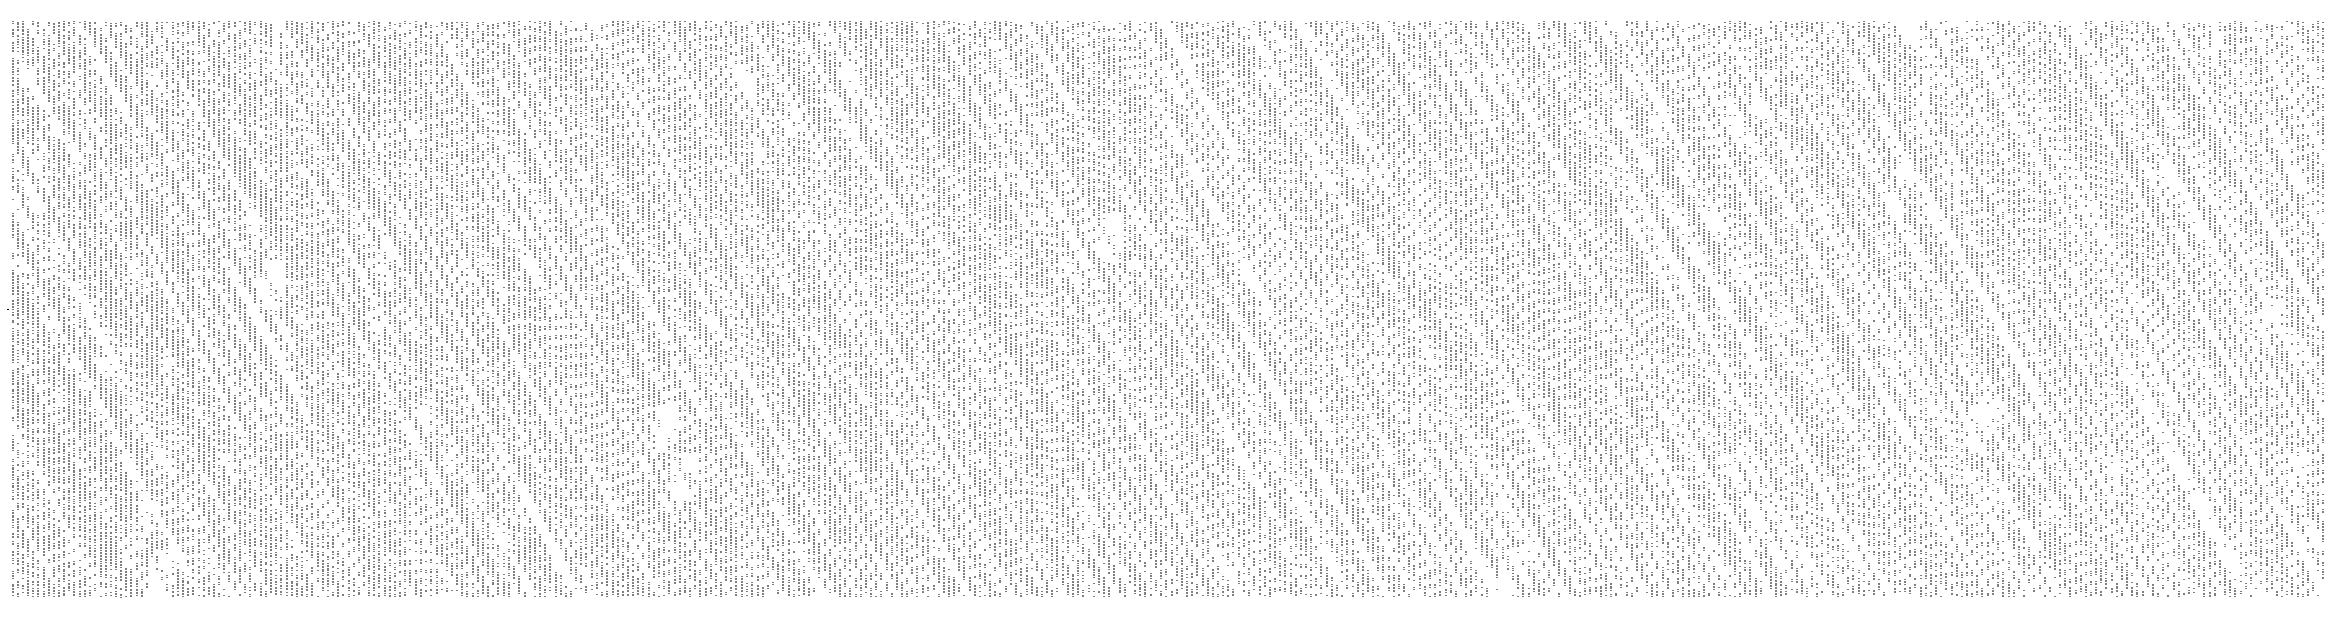

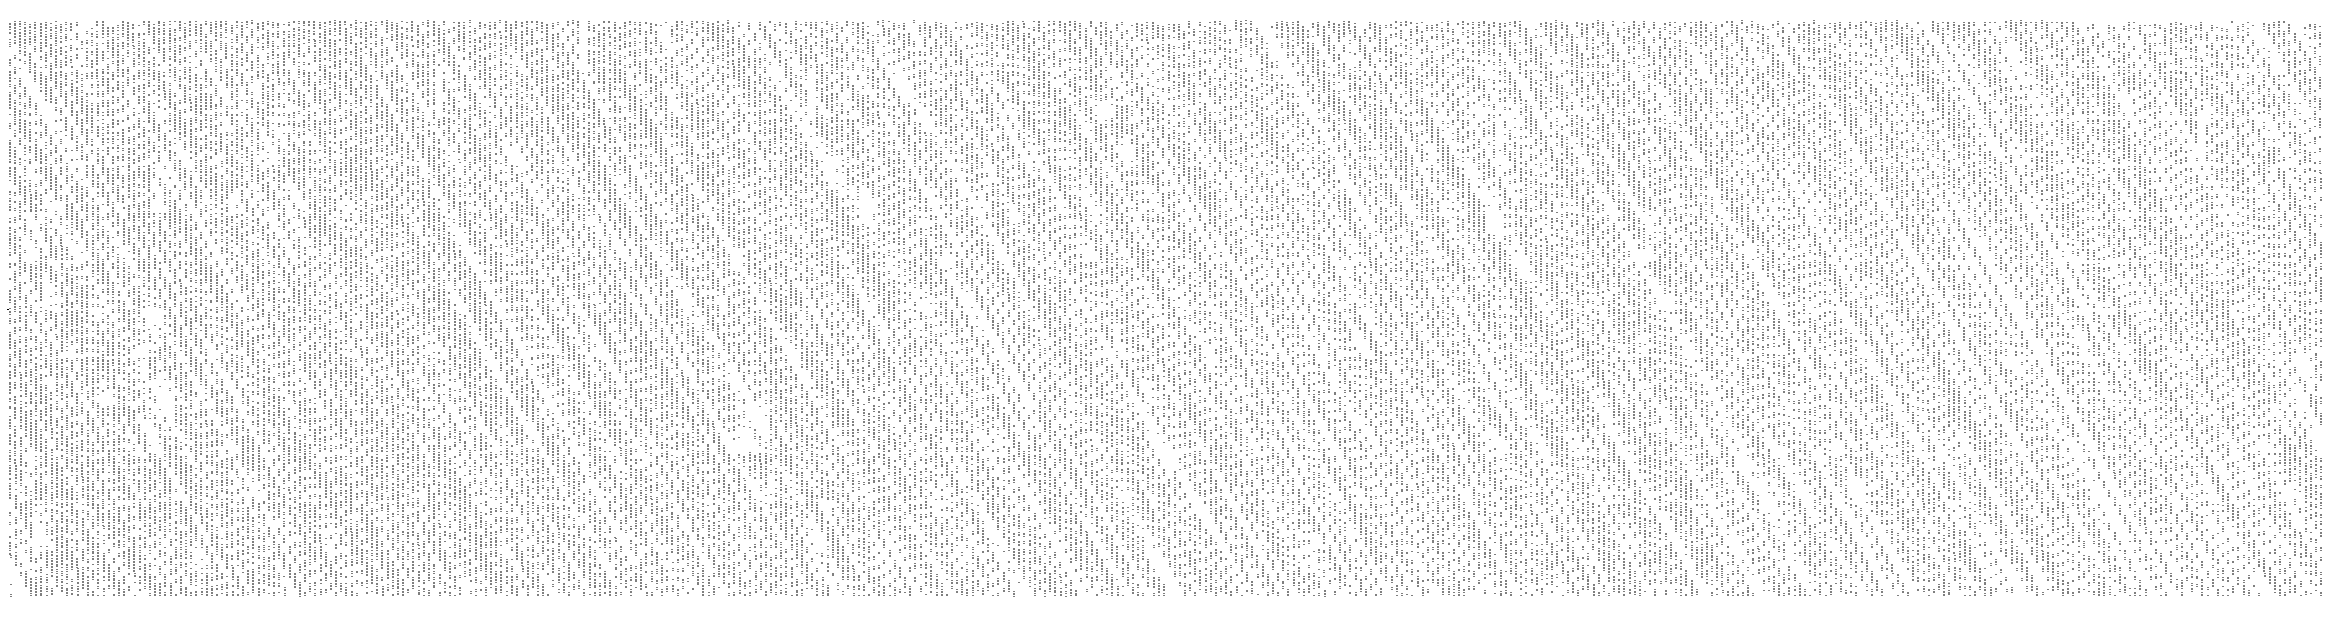

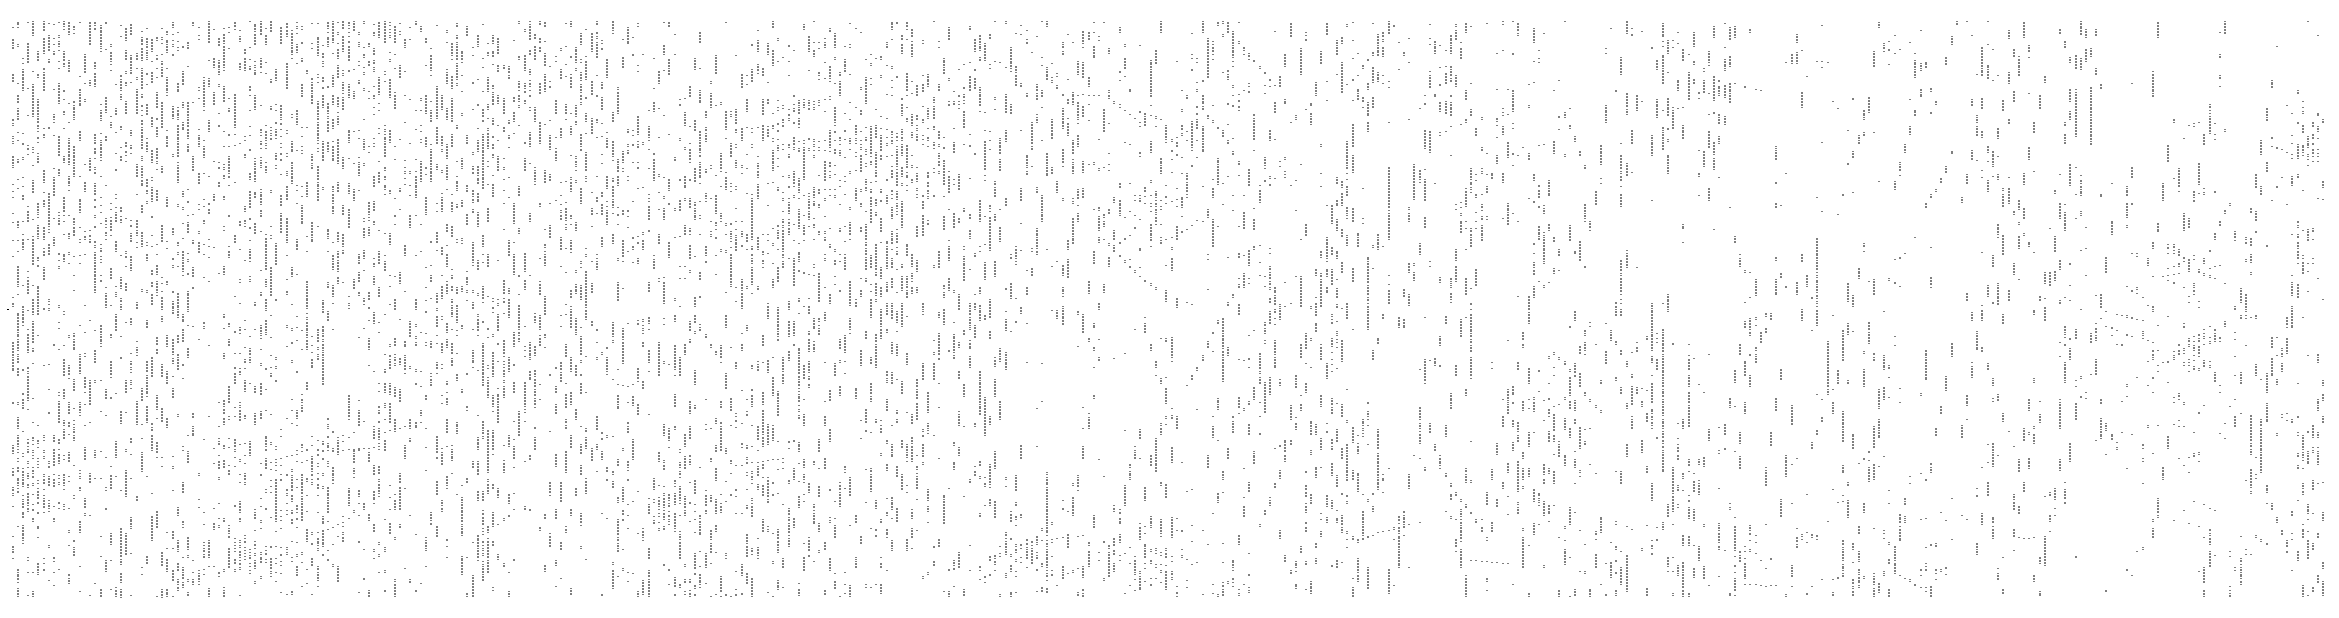

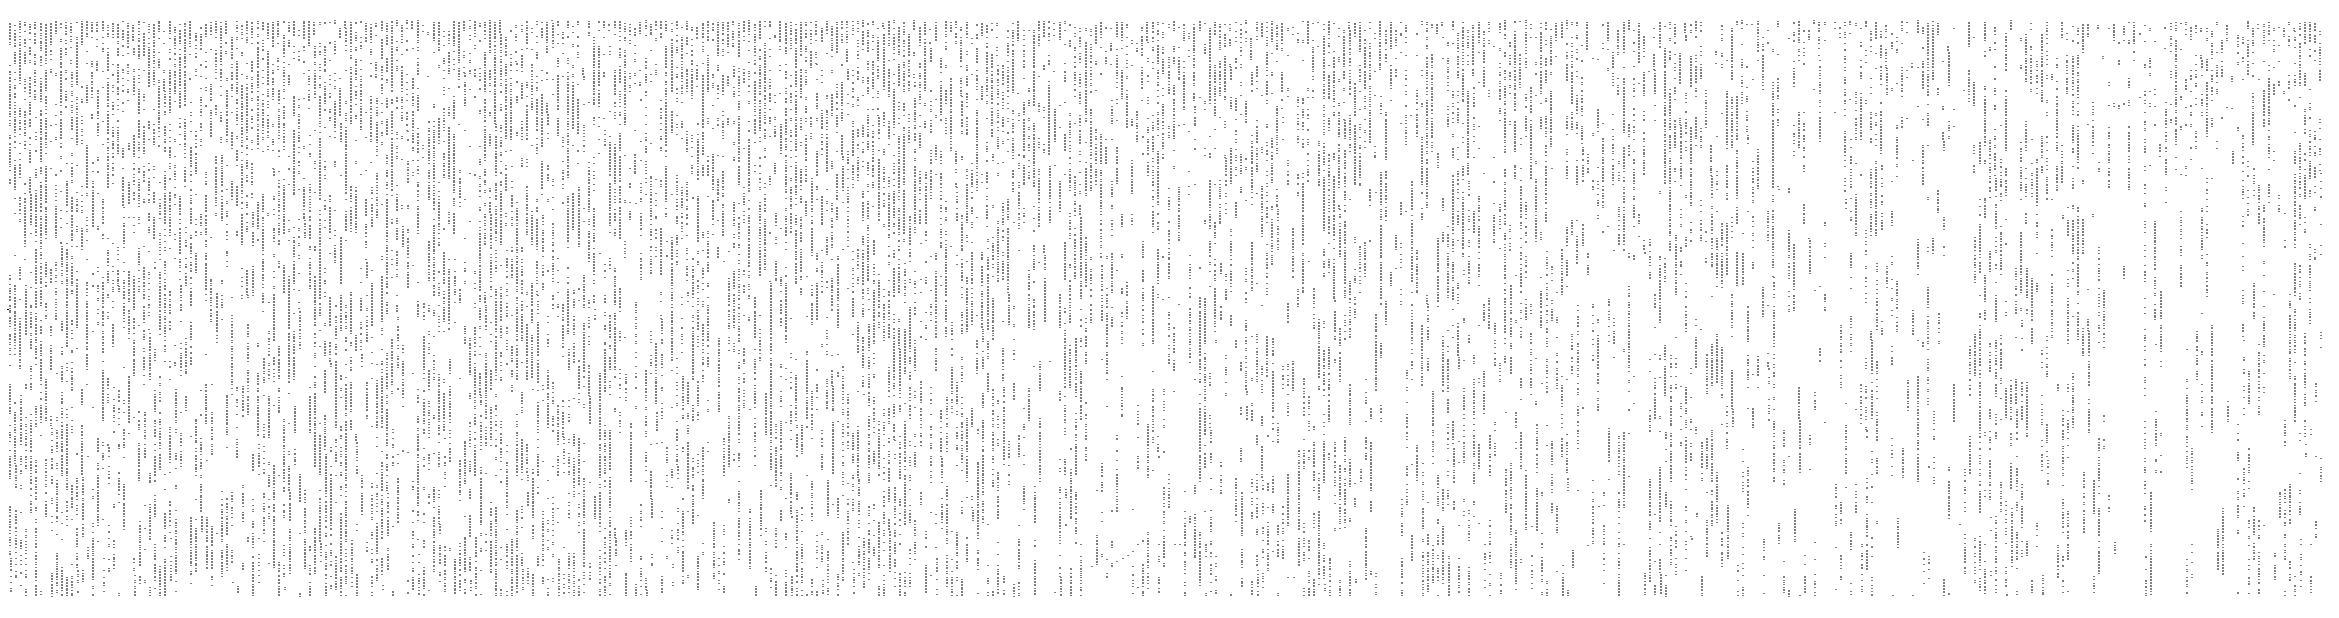

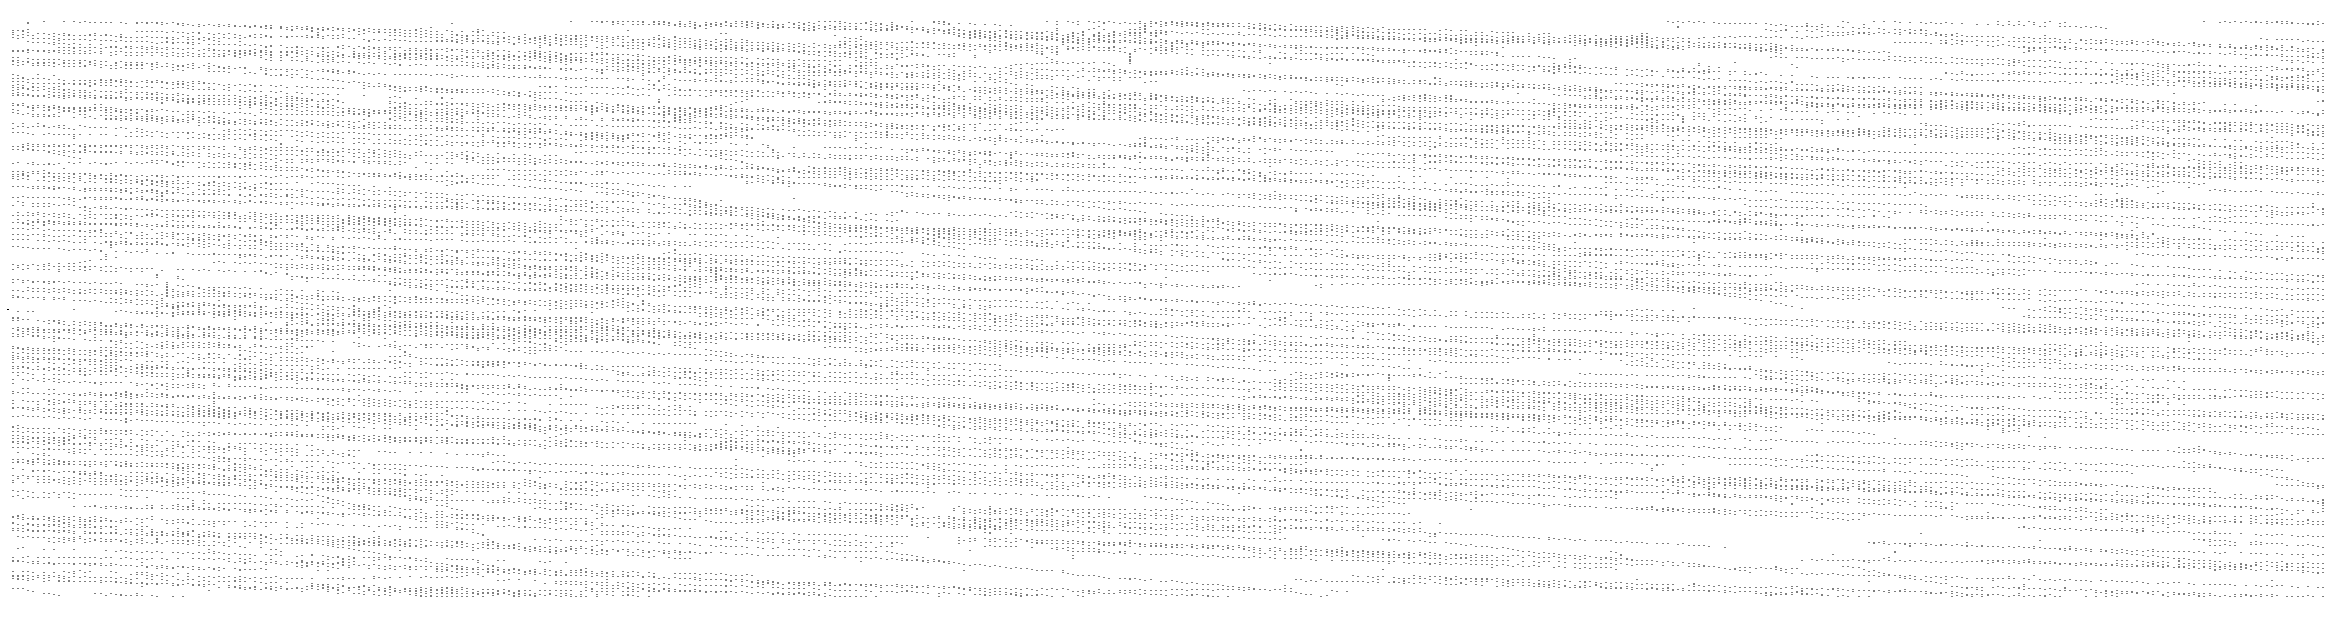

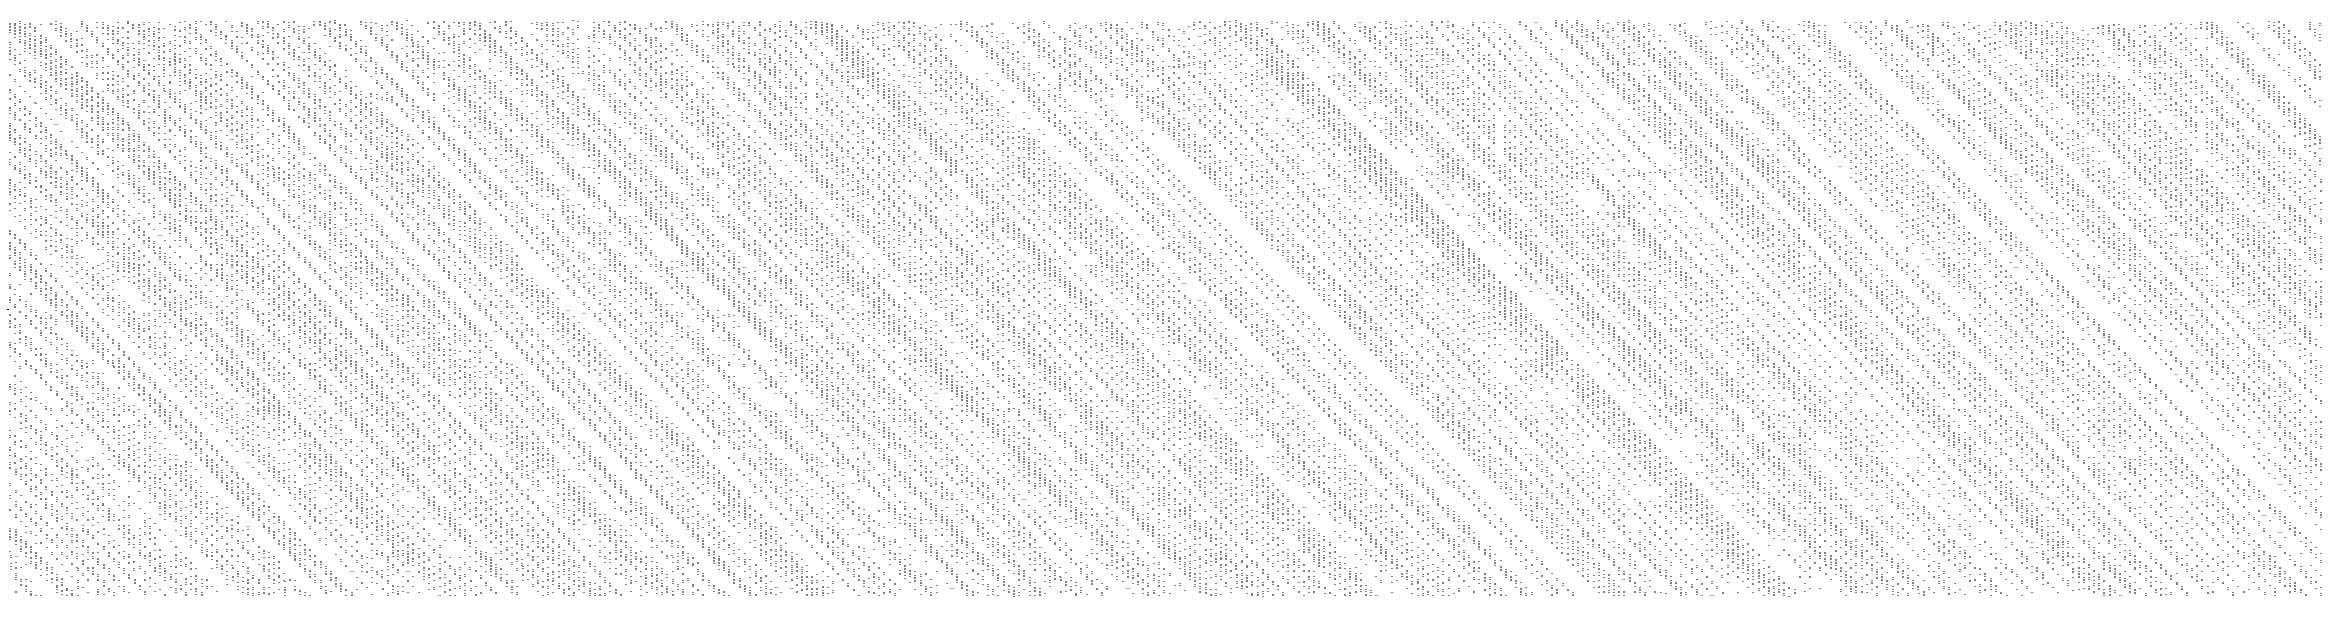

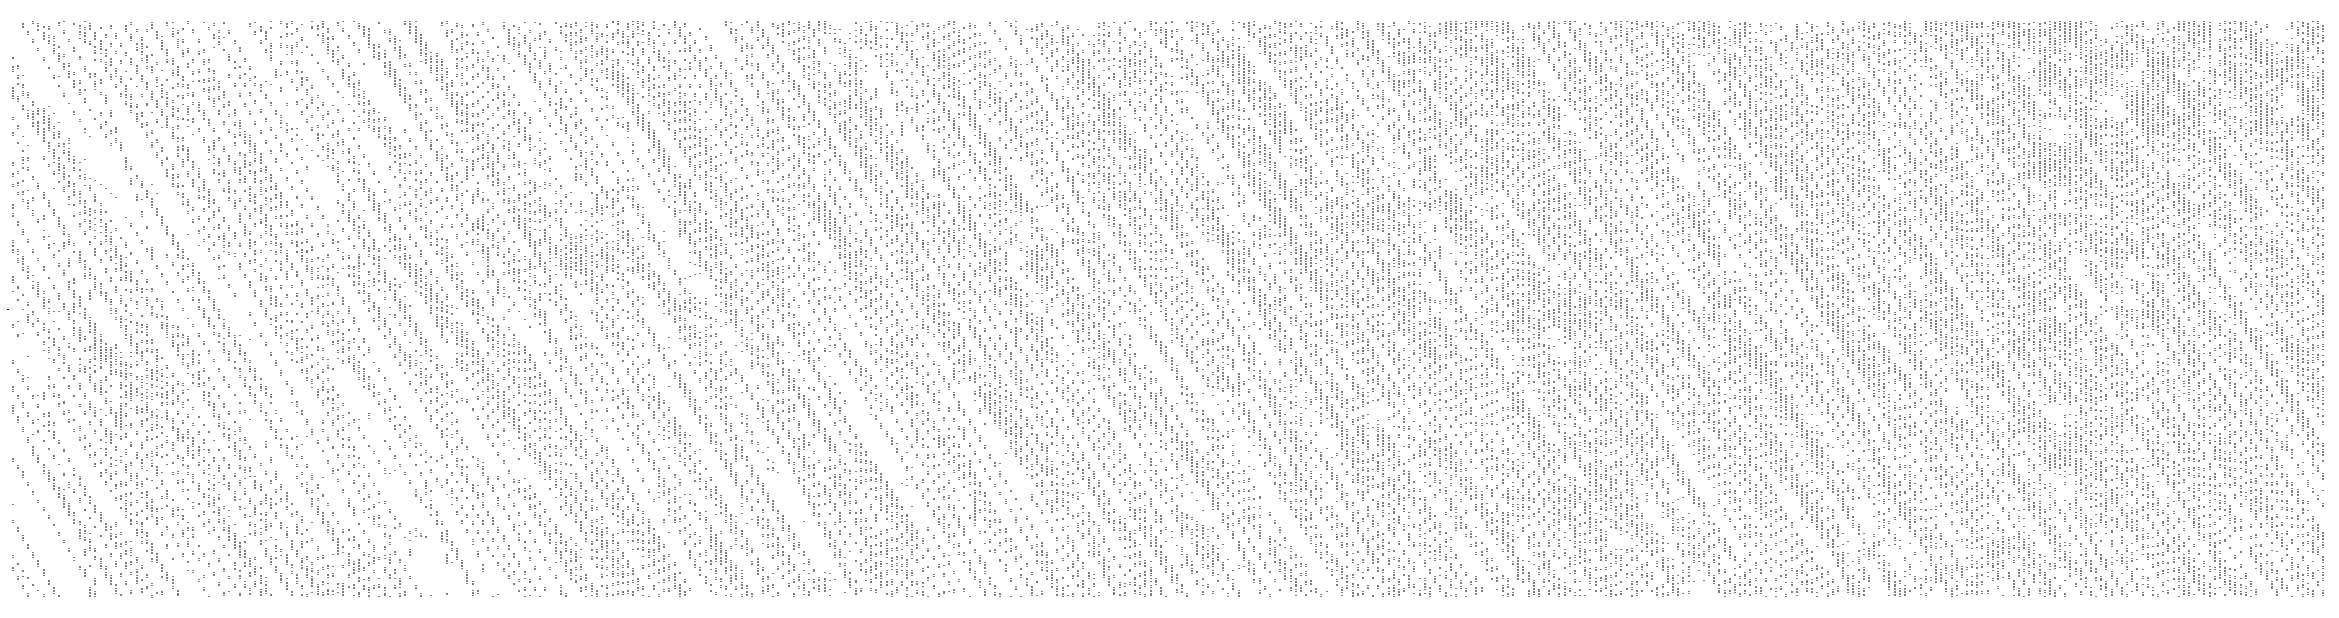

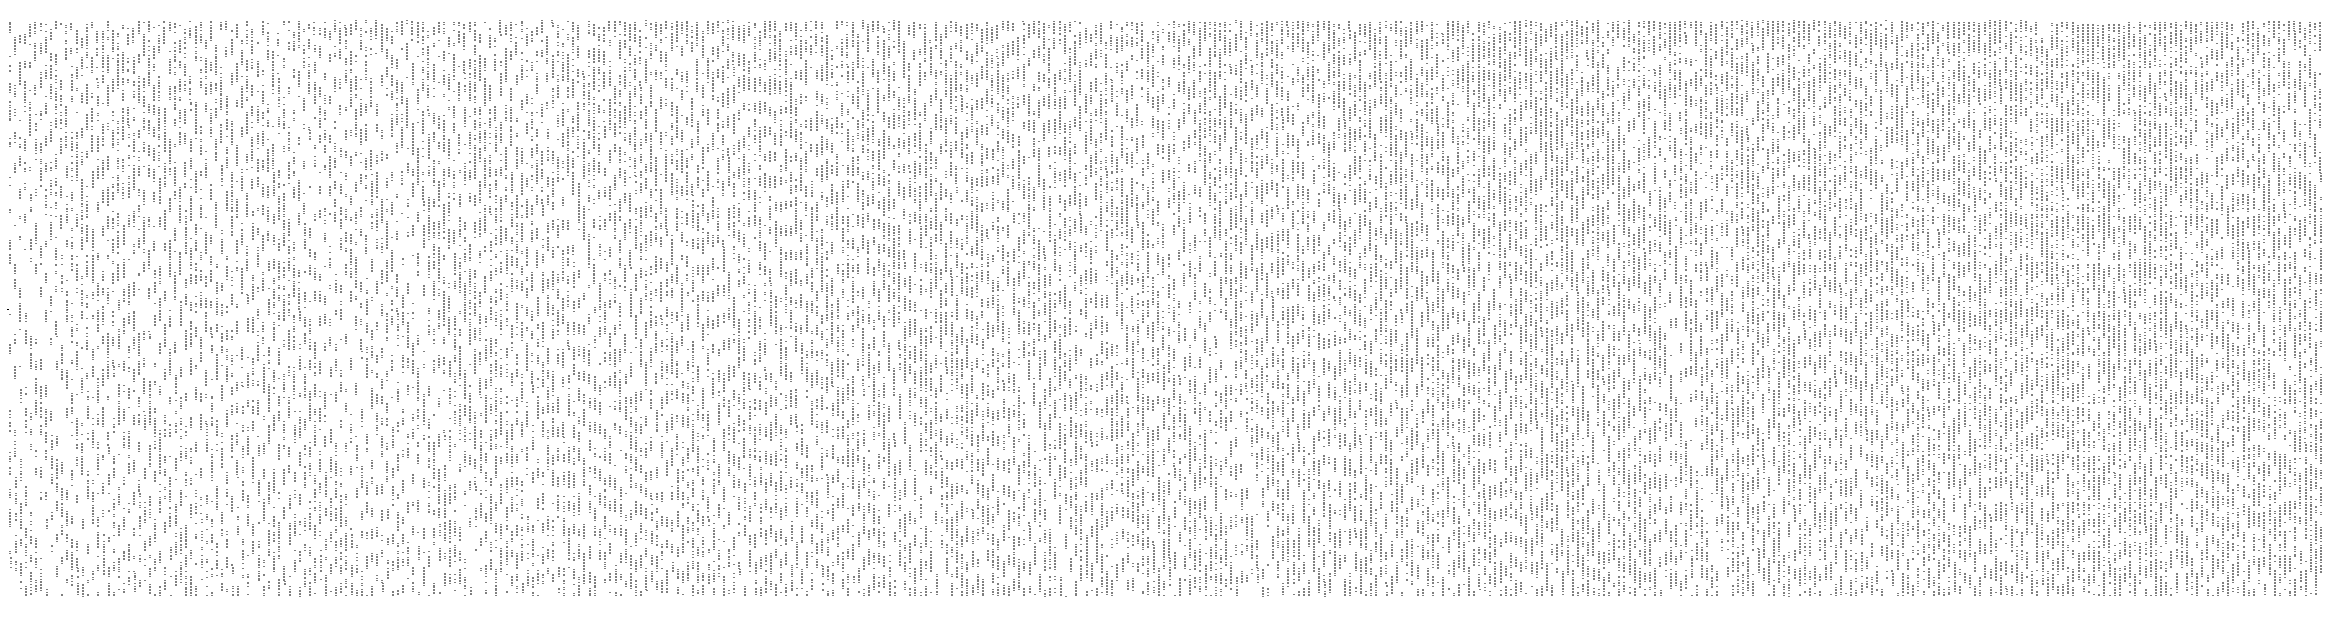

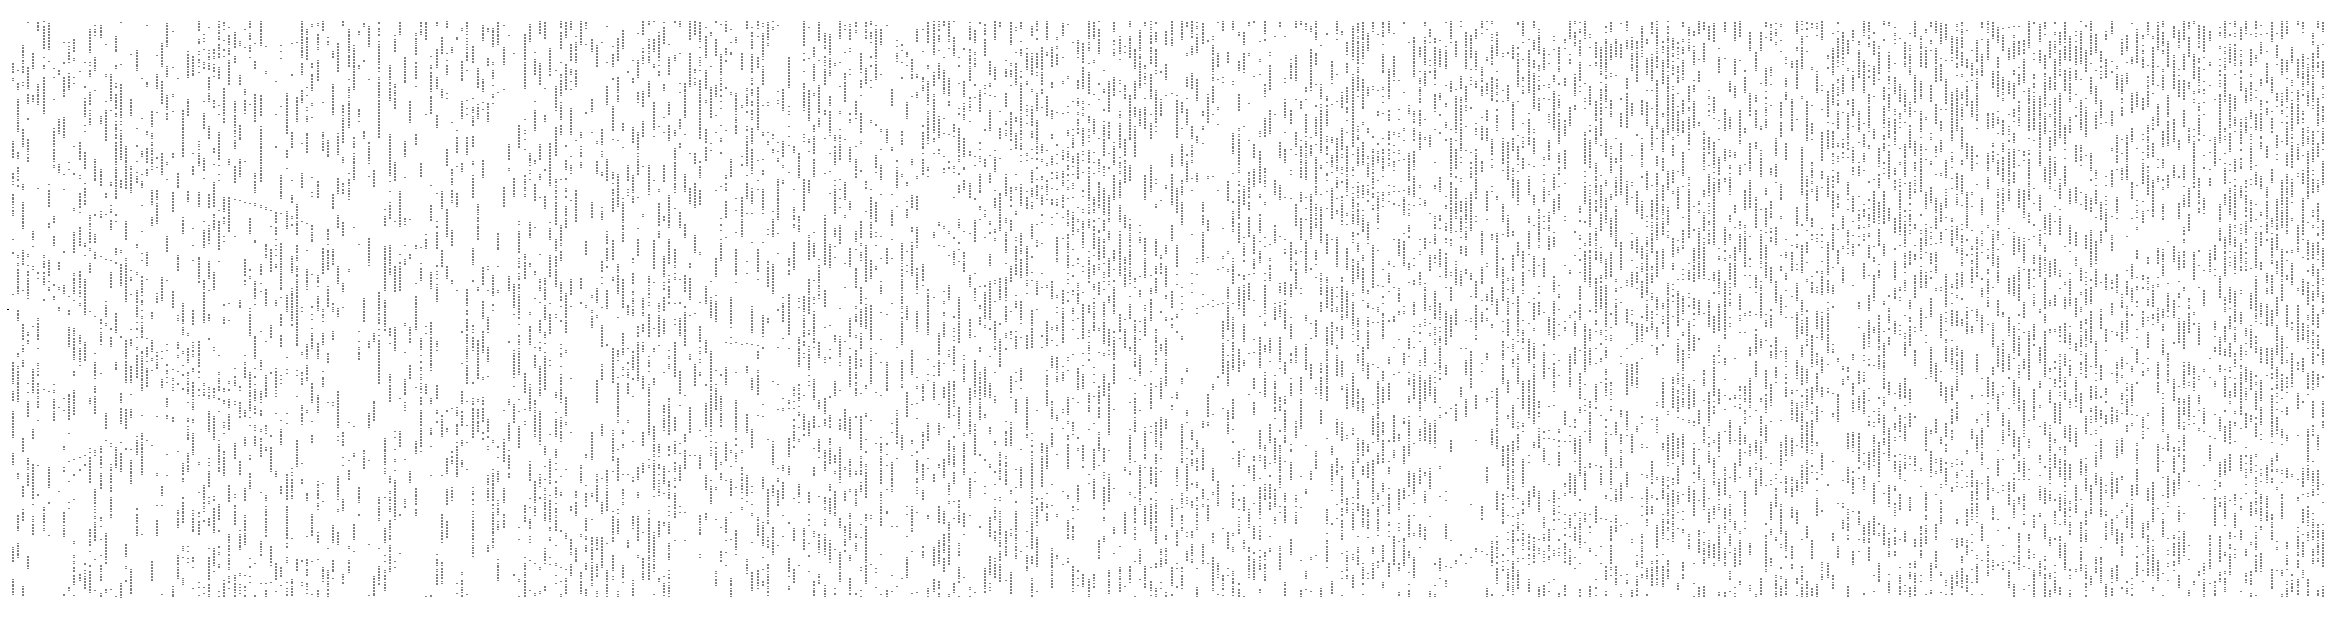

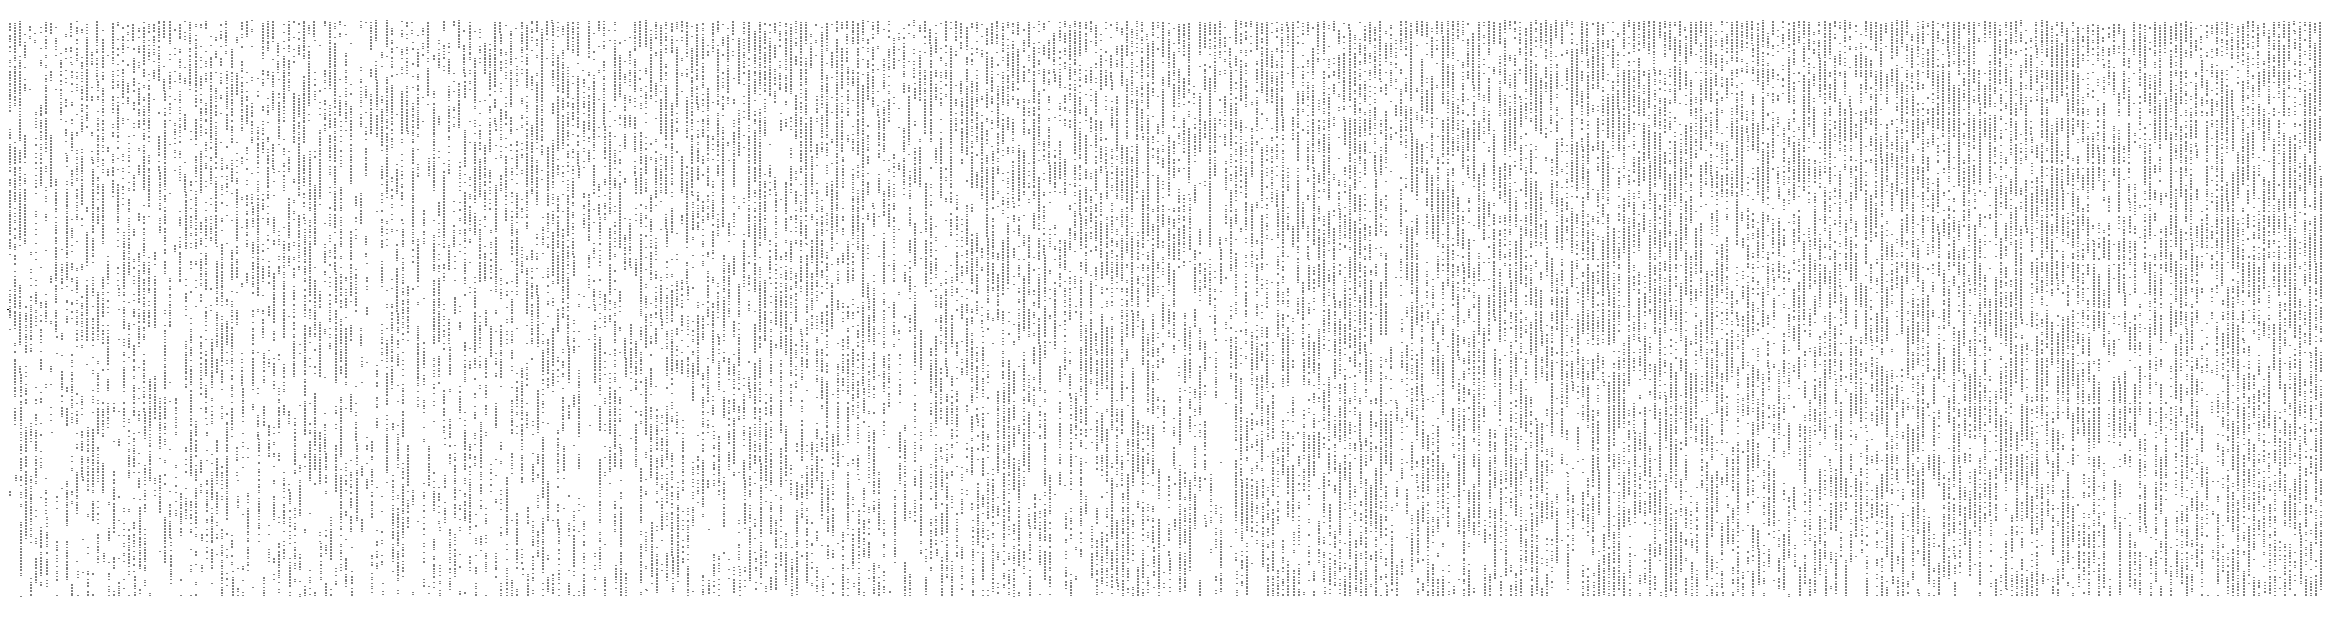

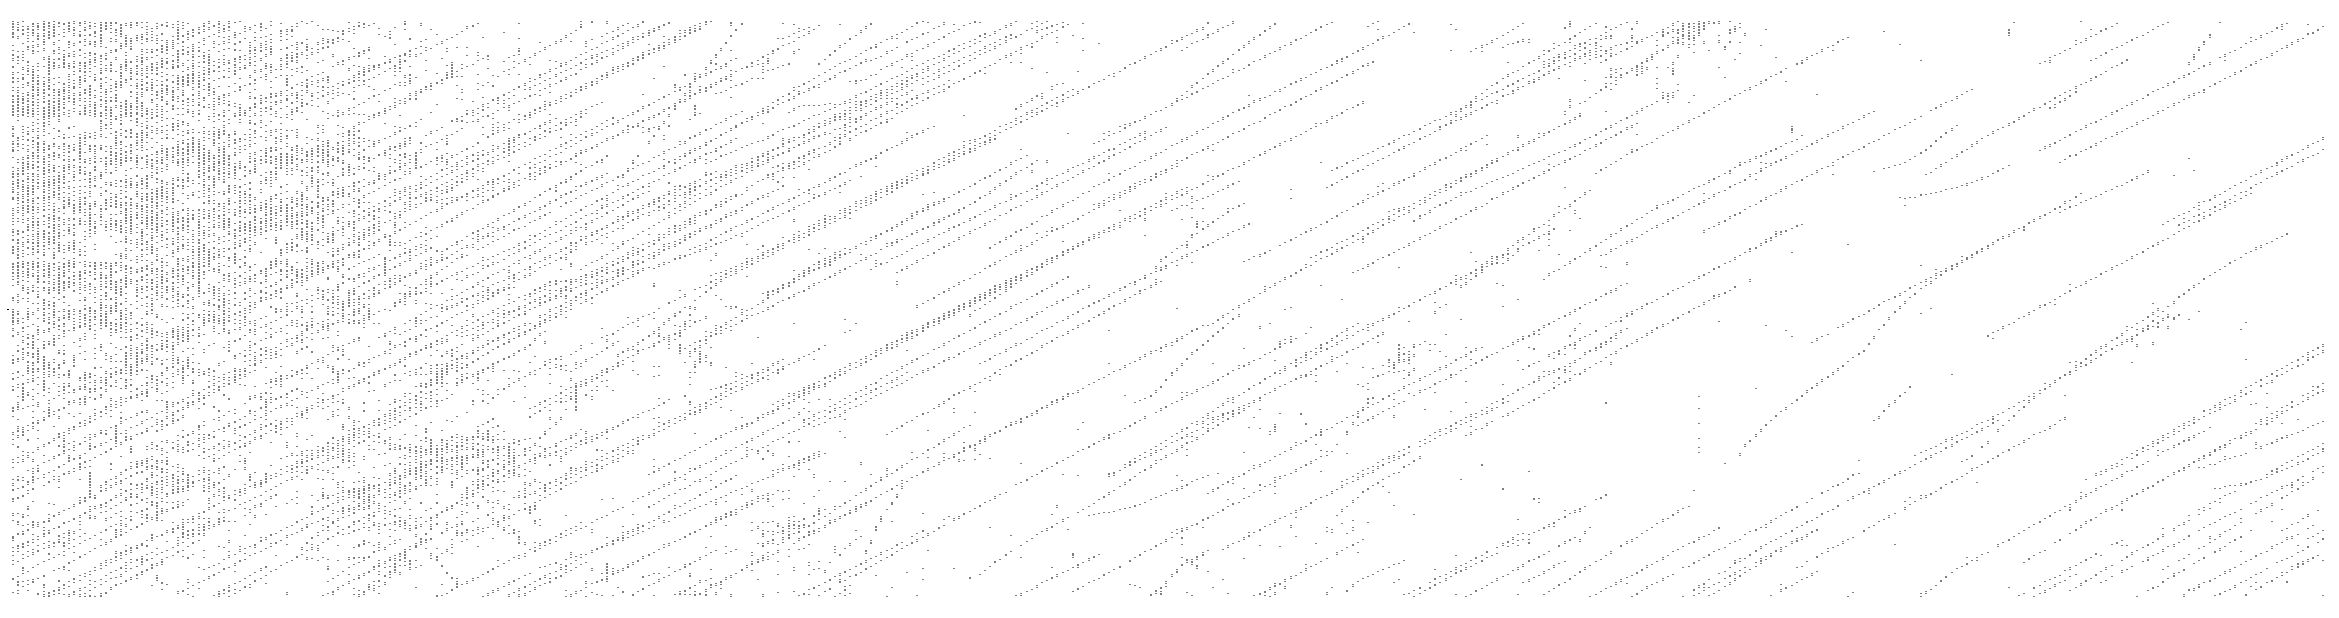

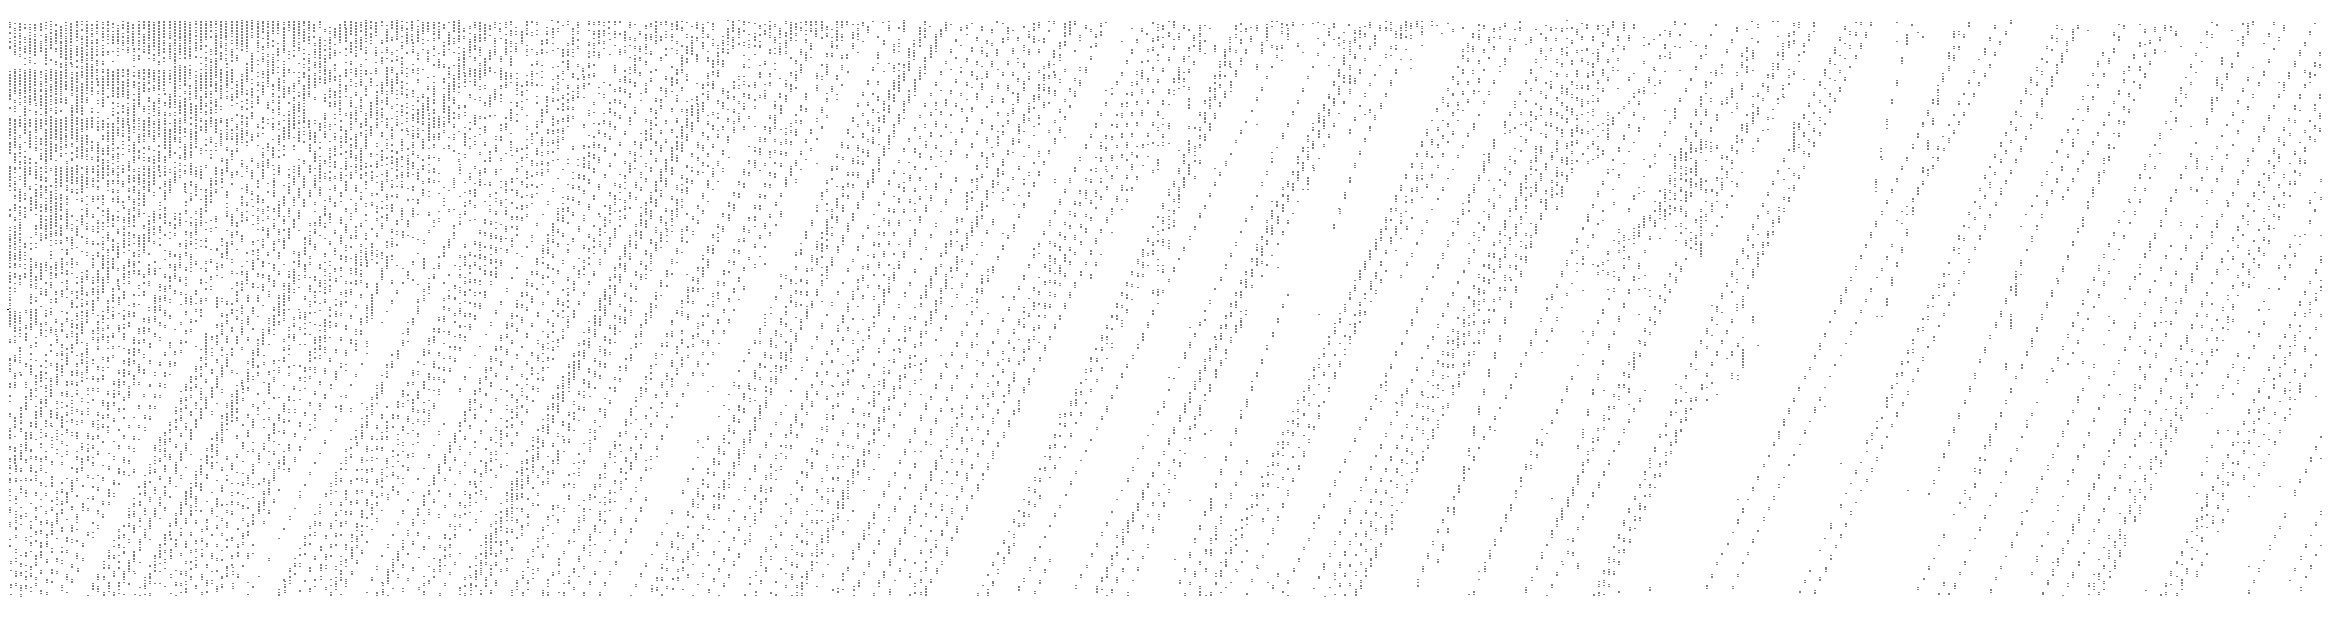

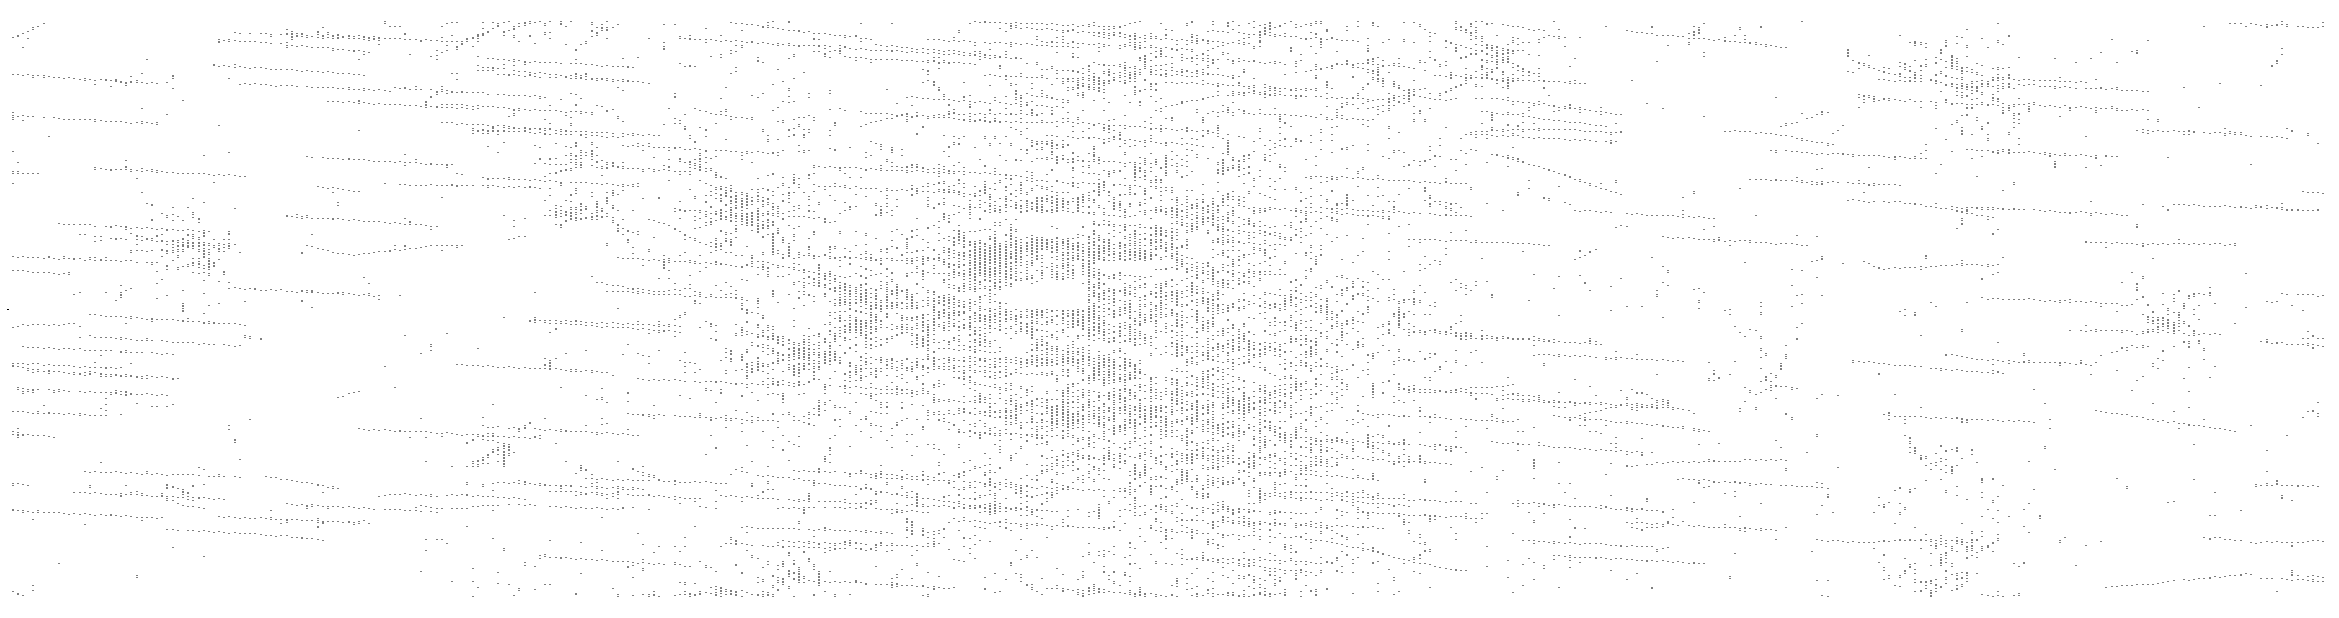

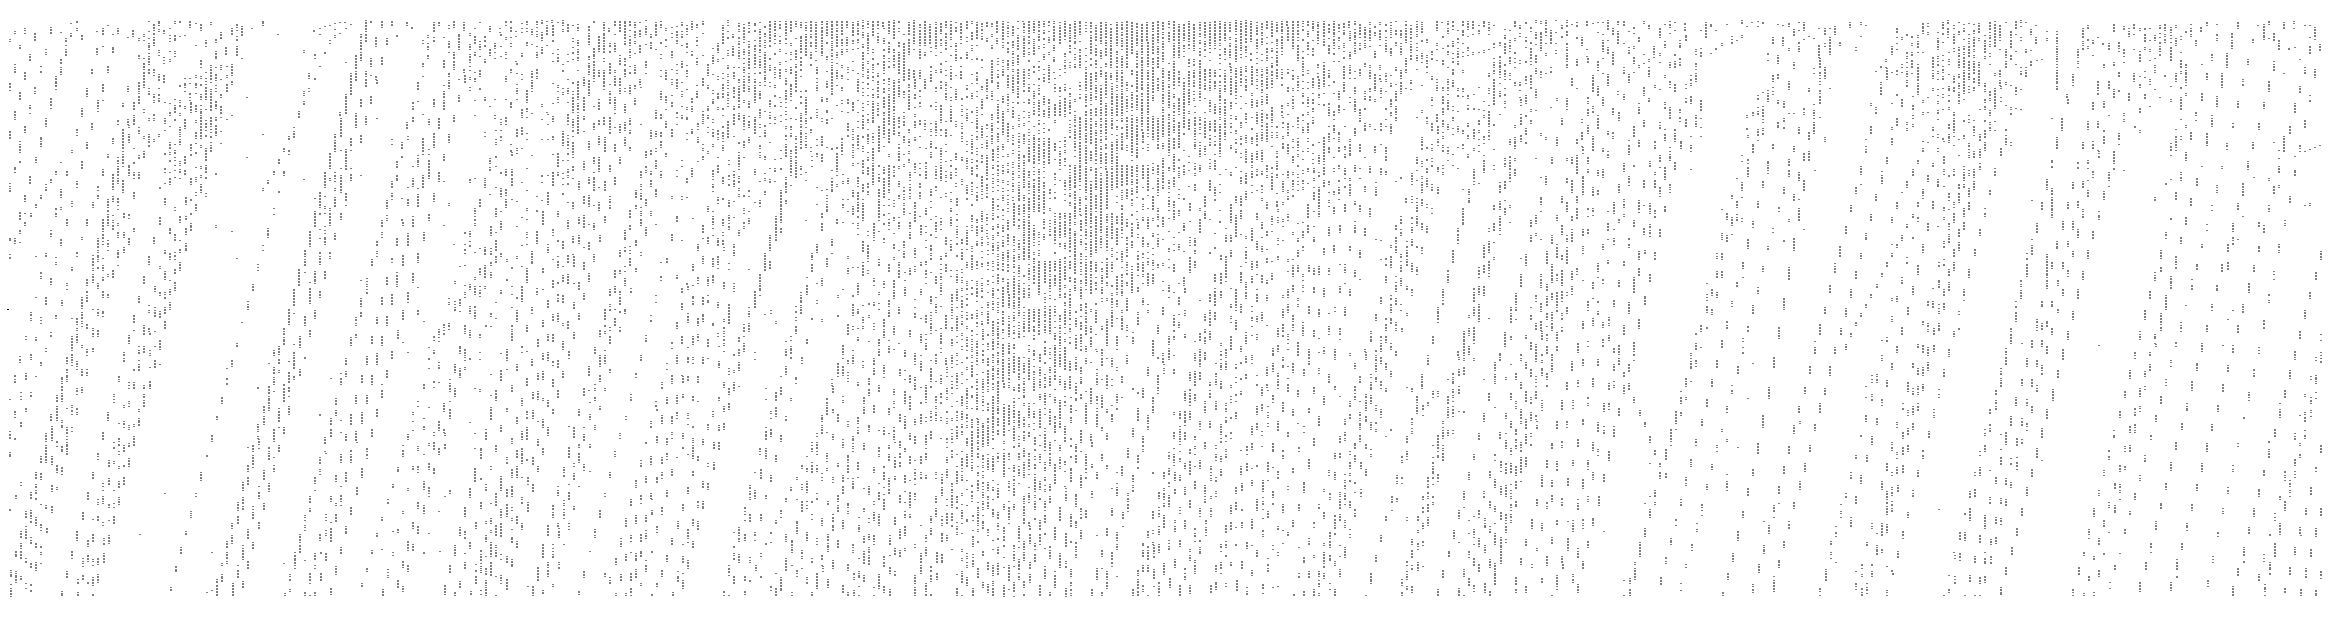

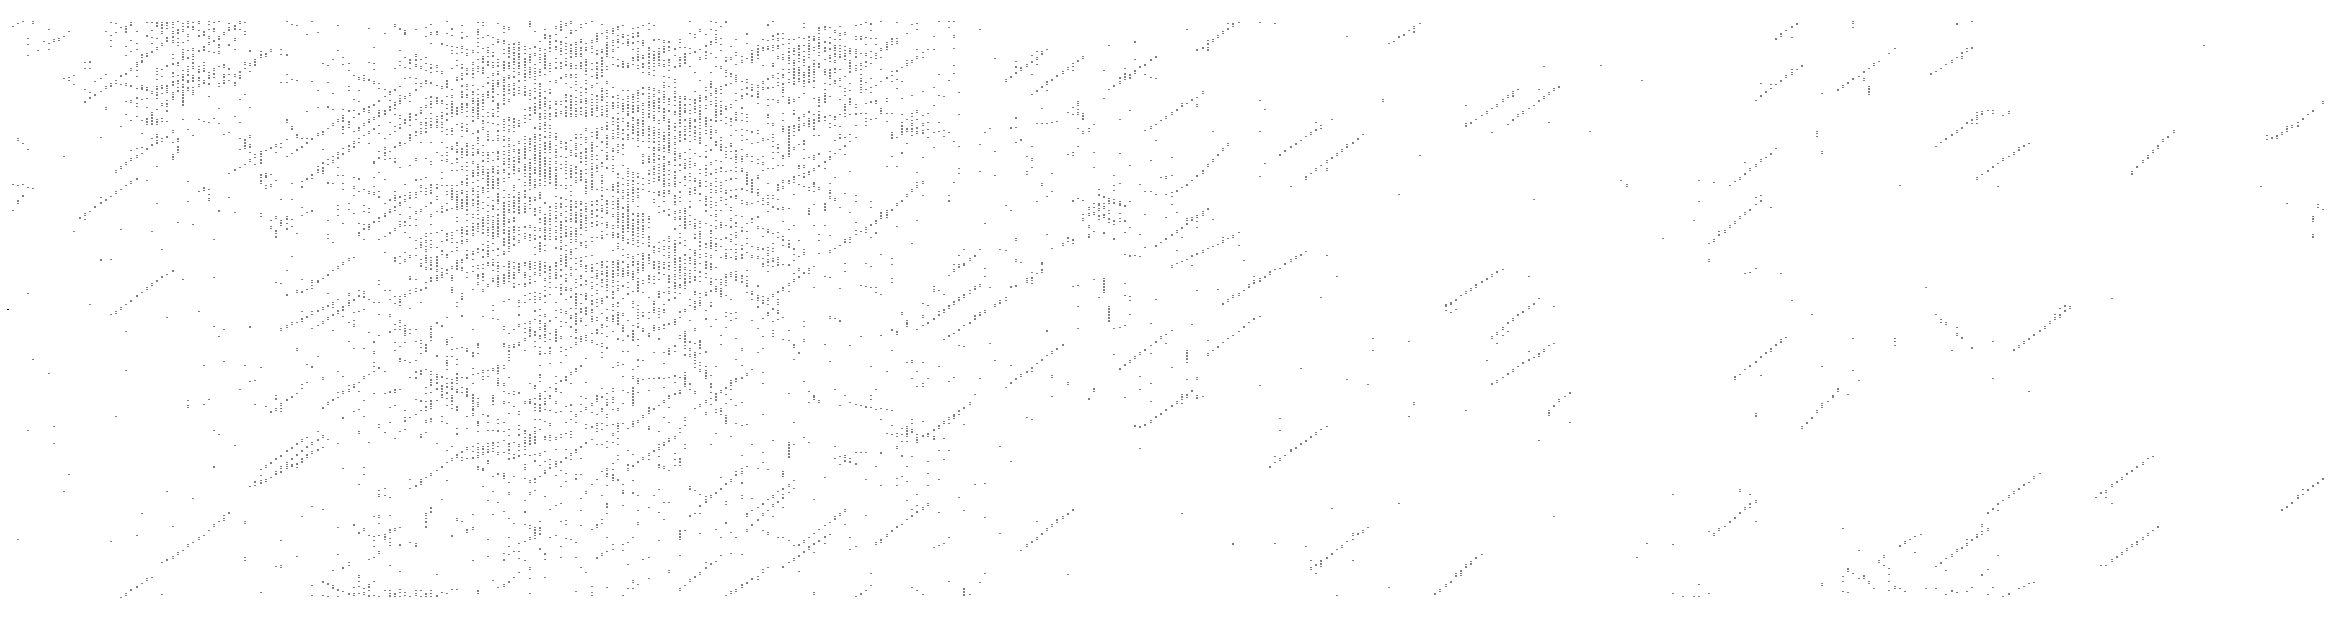

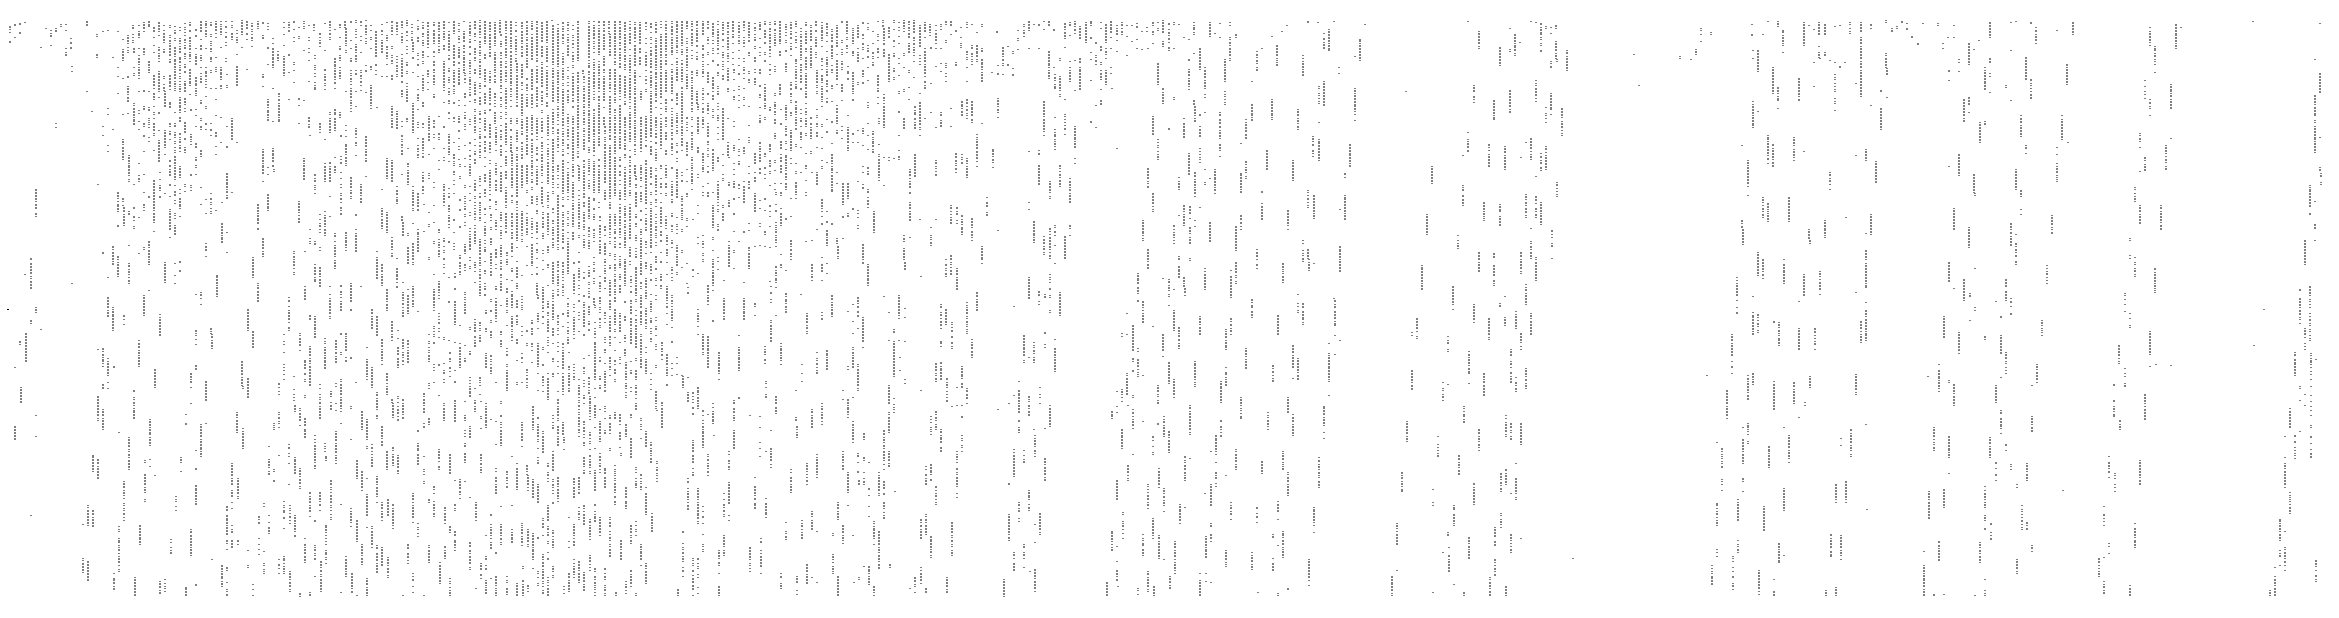

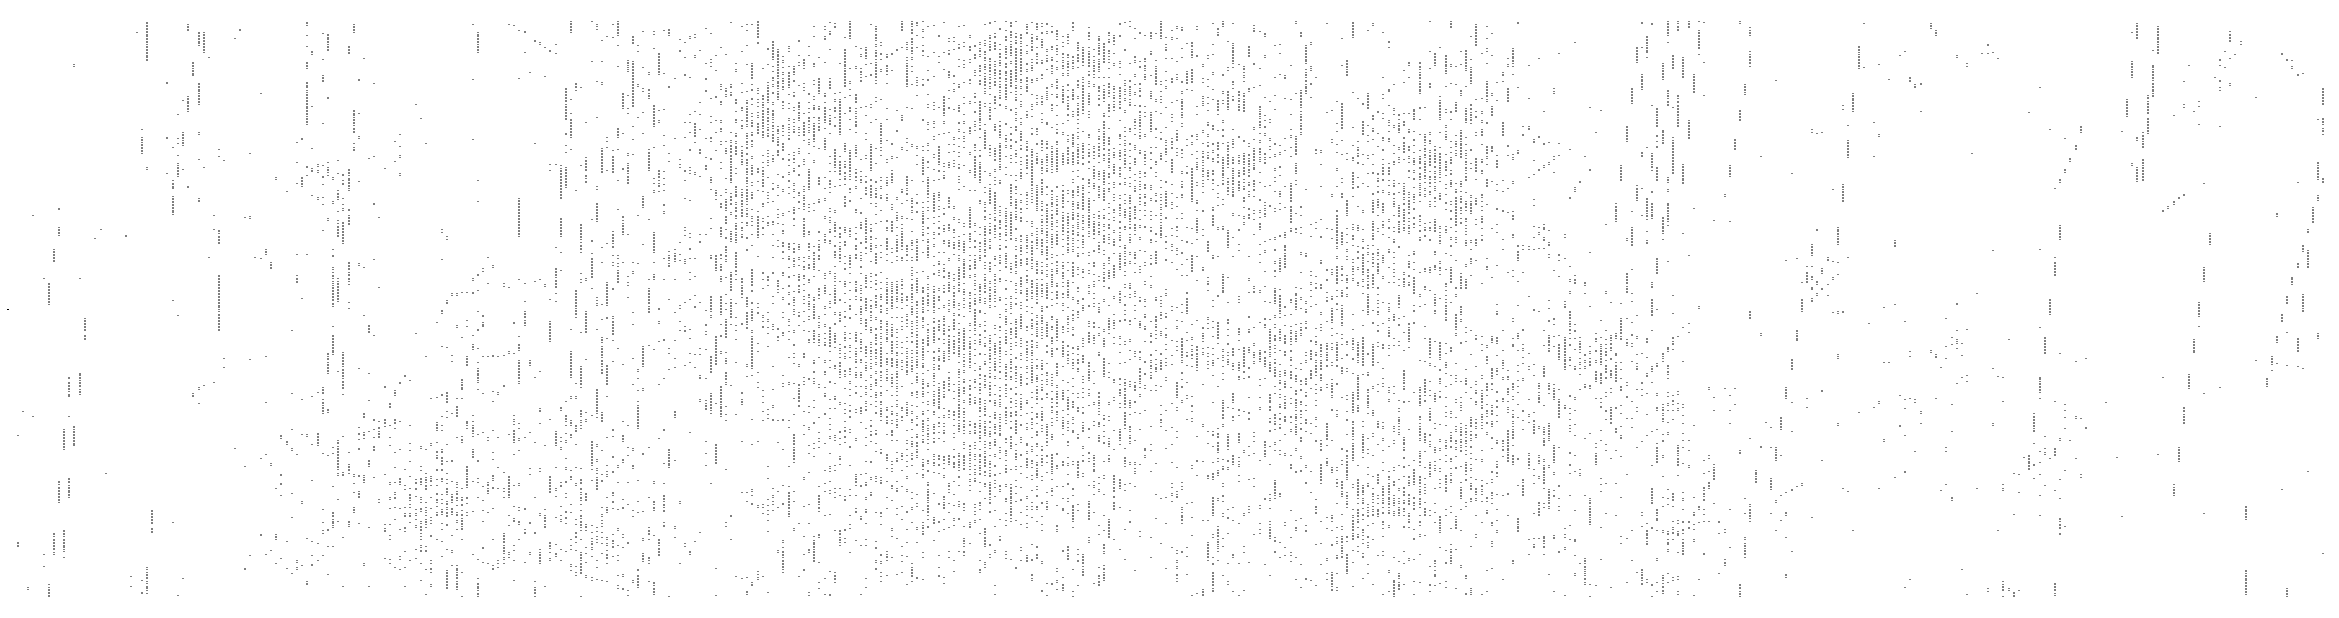

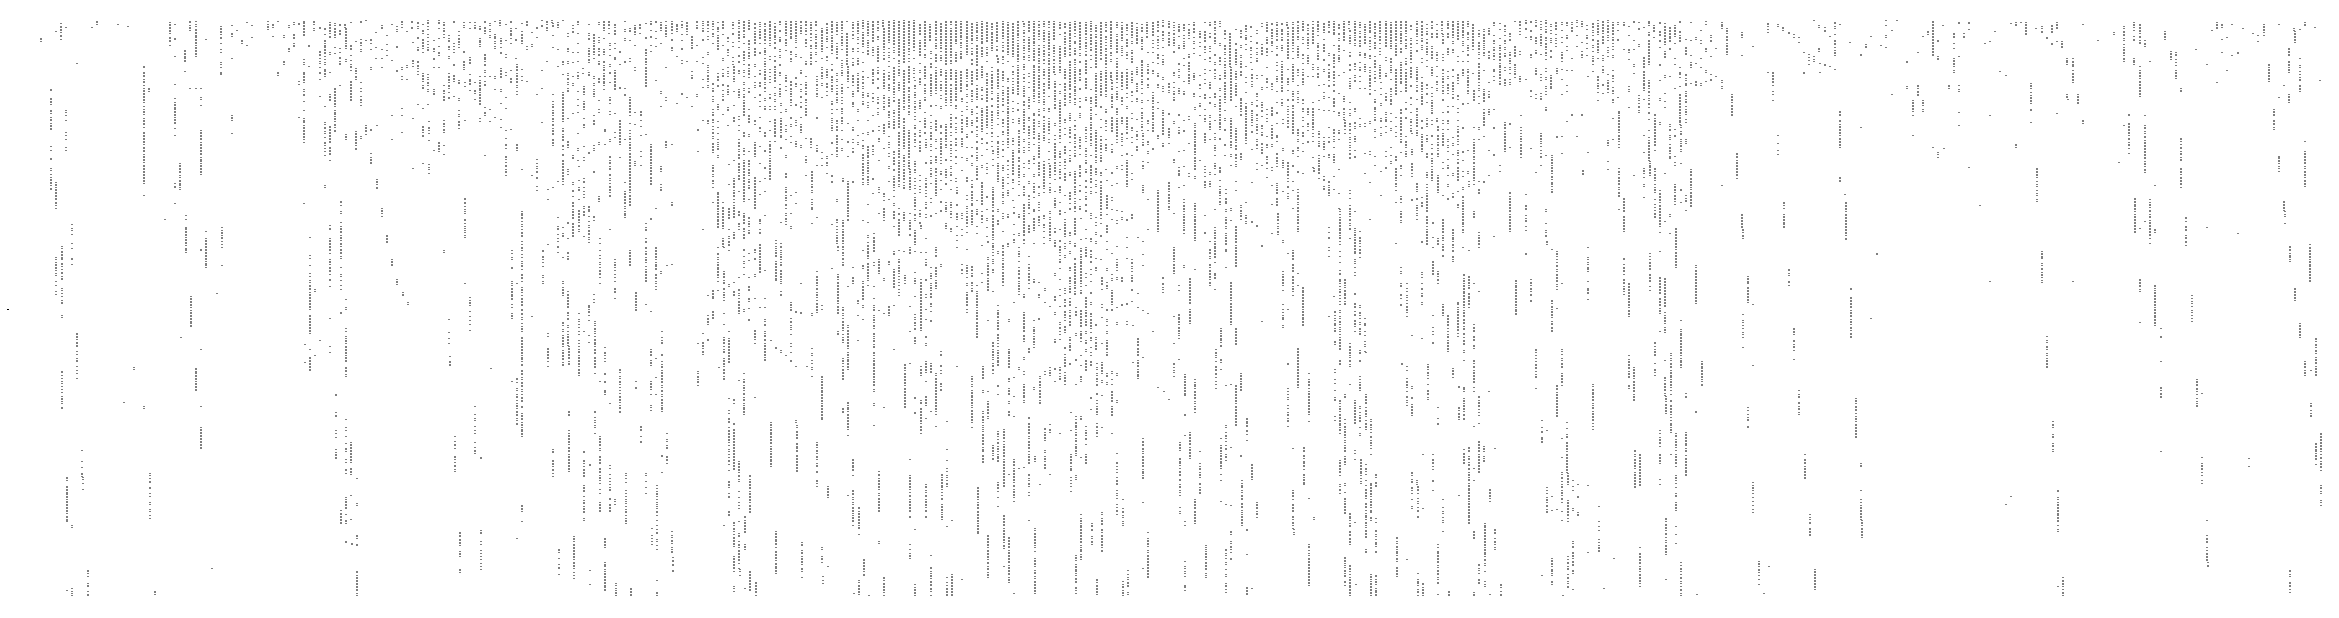

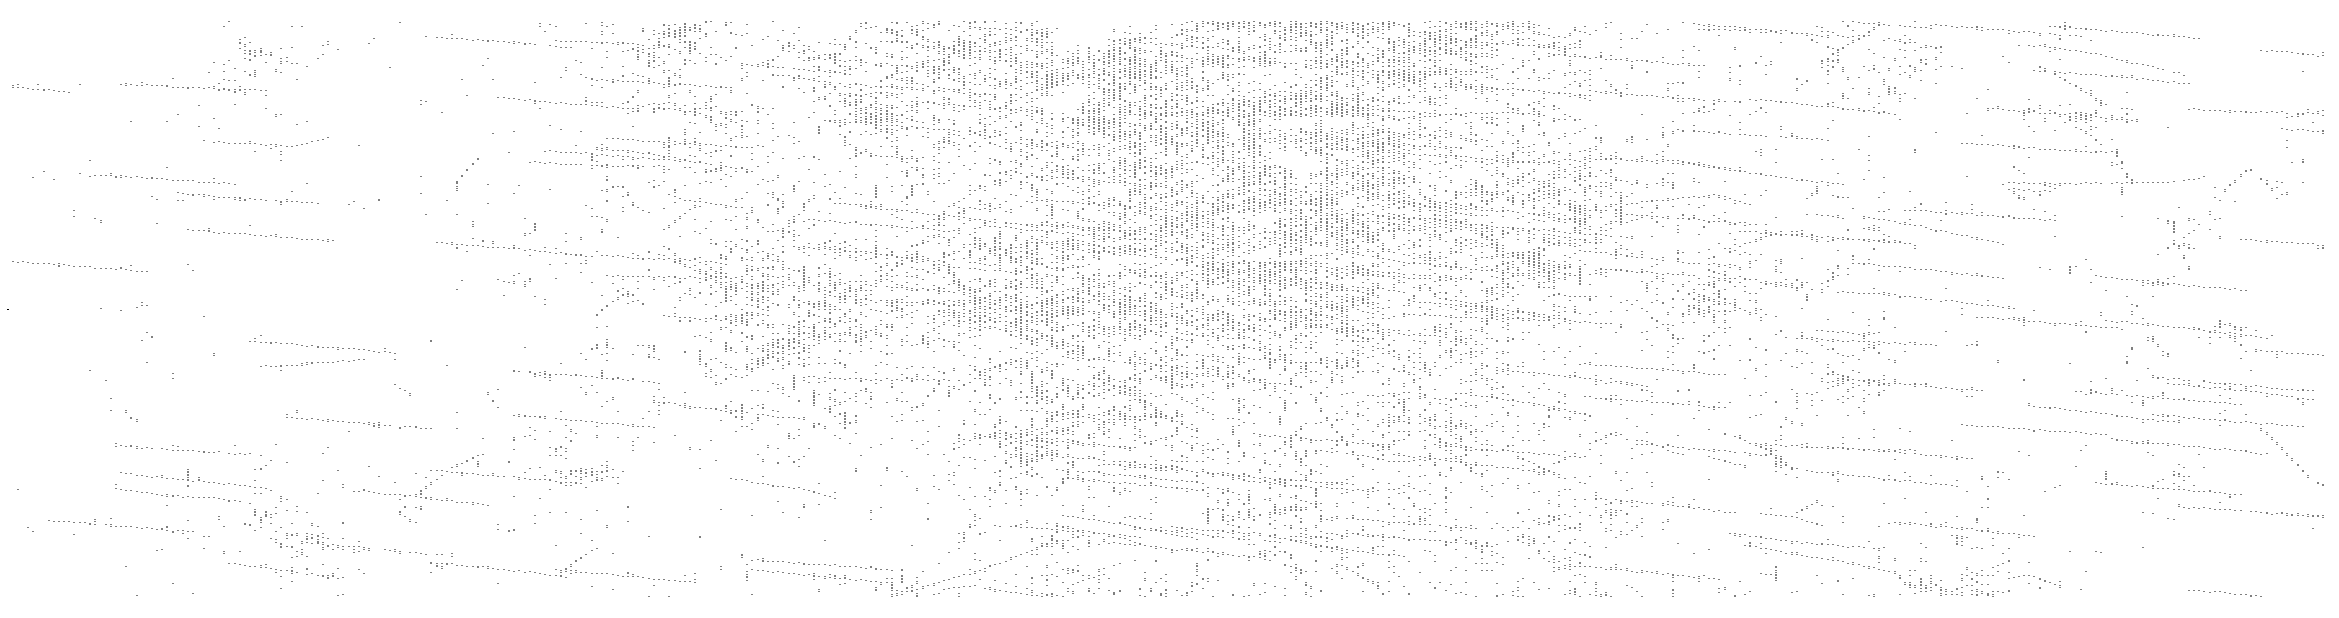

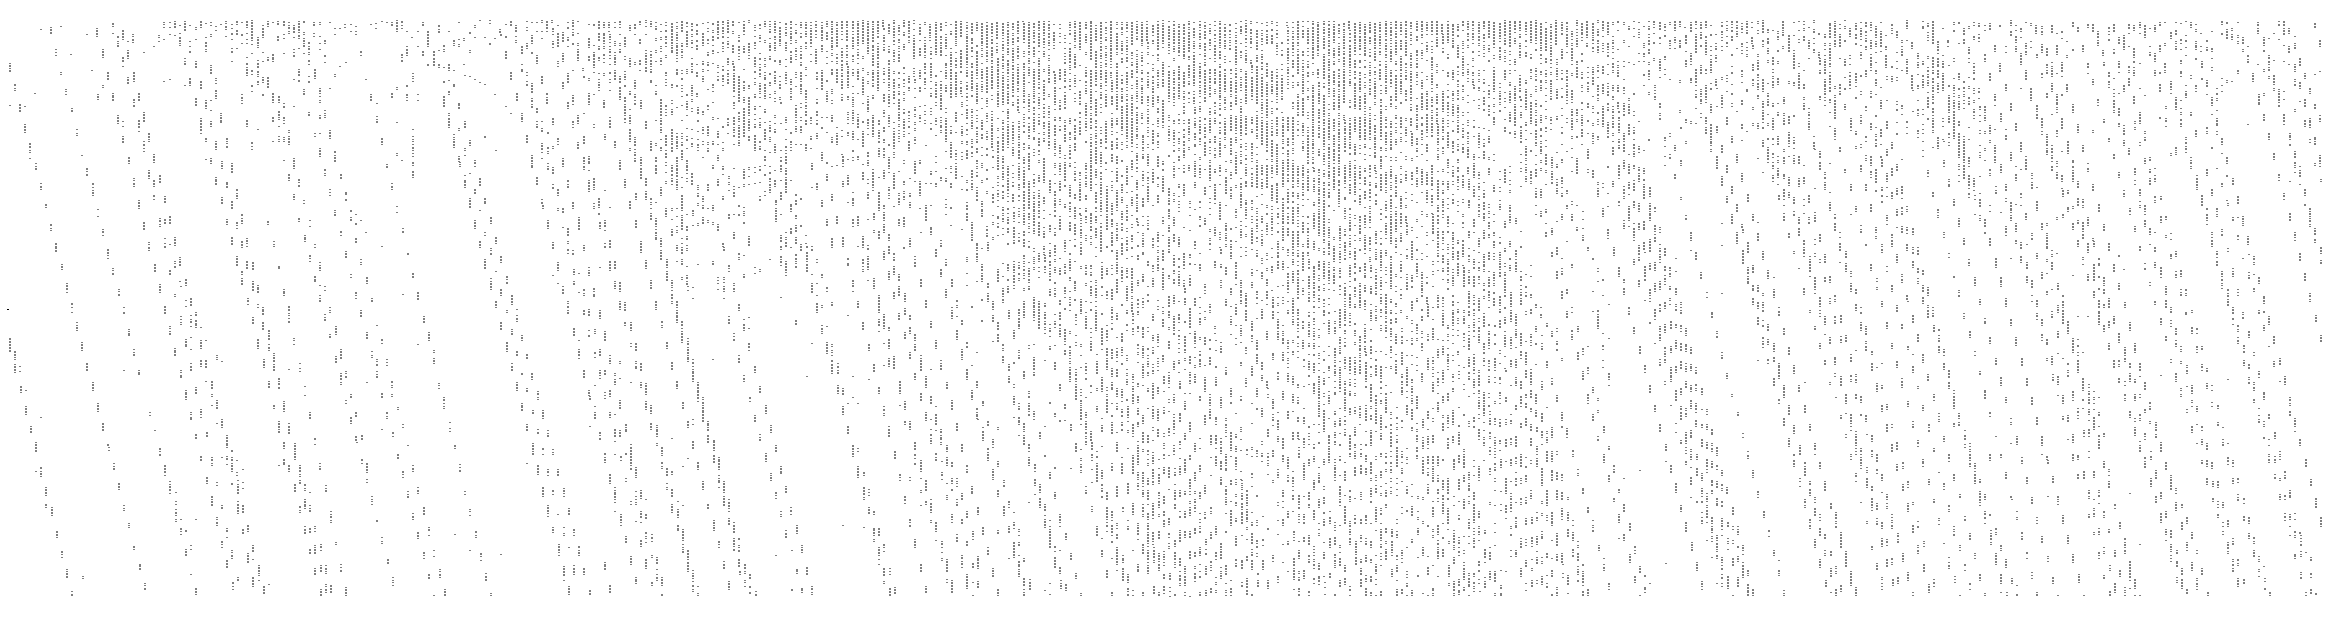

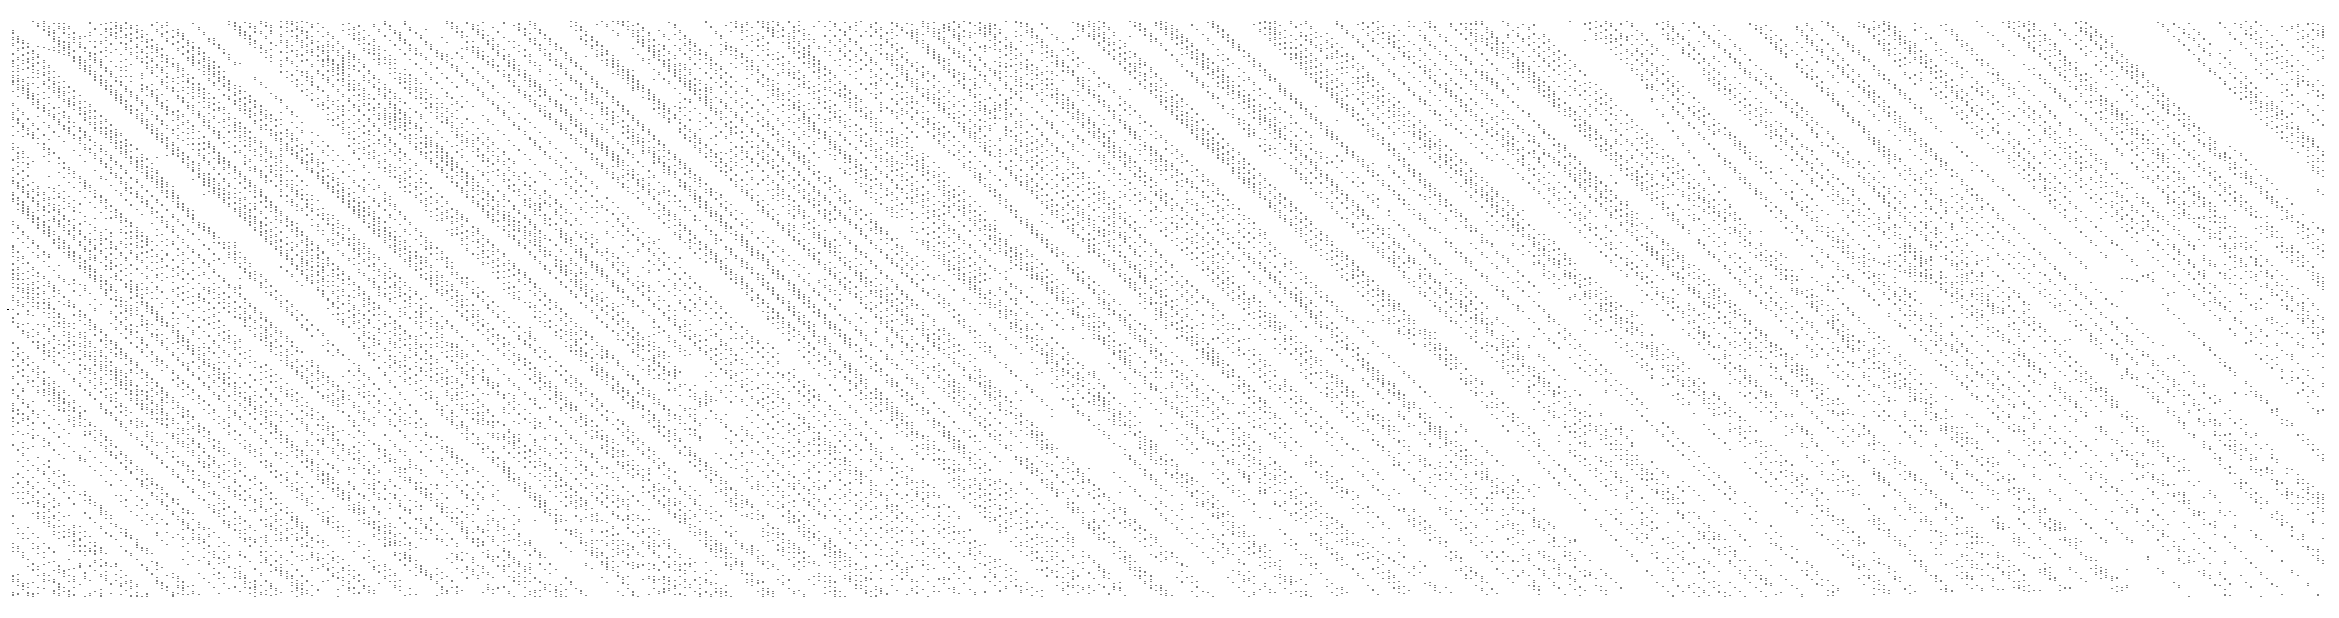

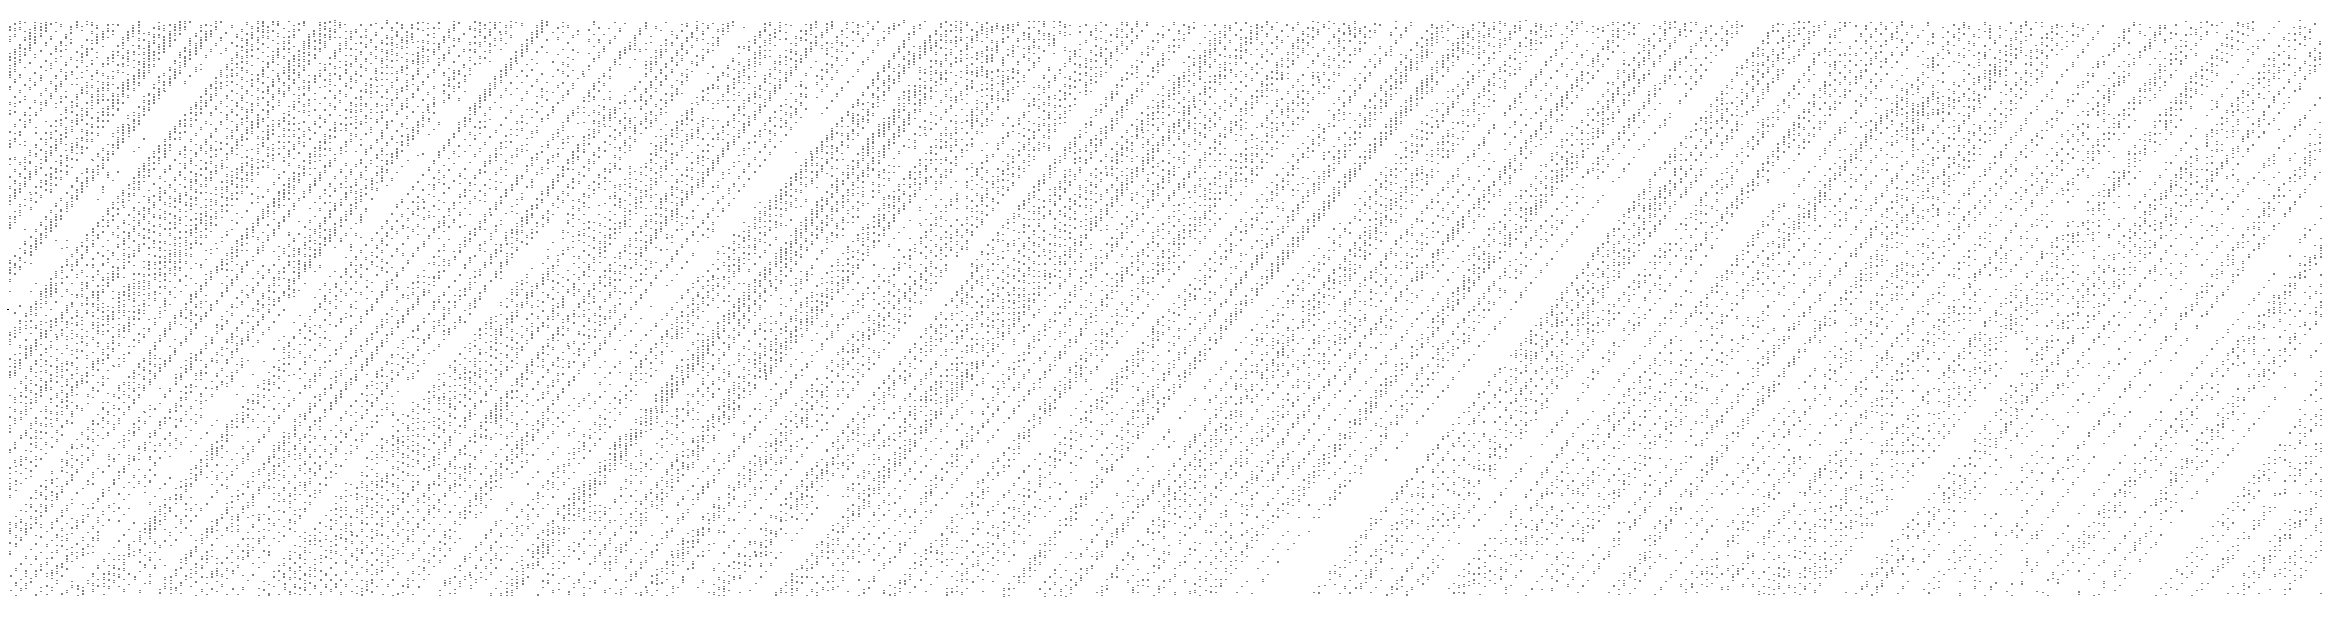

In [2]:
#loading image
import iy10_ultrashower_utilities as shower

#loop for XY coordinates
#Gives xCoord, yCoord
XYCoords = []
AsymXZ = []
BadXY = []
AsymYZ = []
XY_timestamp = []
BadXY_timestamp = []

inFile = ROOT.TFile.Open("/home/aklima/NOvA/AirShowers/fardet_r00046357_s21_DDenergy_N23-05-31_v1_data.ultrashowerimages_ntuple.root","READ")
eventTree = inFile.Get("ultrashowerimage/Events")
subrunTree = inFile.Get("ultrashowerimageSubrunInfo")

for index in range(eventTree.GetEntries()):
    eventTree.GetEntry(index)
    hitsXZ = getattr(eventTree,"hitsXZ")
    hitsYZ = getattr(eventTree,"hitsYZ")
    run = getattr(eventTree,"run")
    subrun = getattr(eventTree,"subrun")
    event = getattr(eventTree,"event")
    timestamp = getattr(eventTree,"timestamp")
    arrayXZ = np.stack( ( hitsXZ.GetX(), hitsXZ.GetY() ), axis=1 )
    arrayYZ = np.stack( ( hitsYZ.GetX(), hitsYZ.GetY() ), axis=1 )
    # Test Everything by Drawing
    plot.rcParams['figure.max_open_warning'] = 100
    plot.figure(figsize=(3000*px,800*px))
    plot.scatter(arrayXZ[:,0],arrayXZ[:,1],s=1.4,marker=recMarker,c='black')
    plot.ylim(-800,800)
    plot.xlim(0,6000)
    plot.axis('off')
    imgbuf_XZ = io.BytesIO()
    plot.savefig(imgbuf_XZ, format='png')
    im = Image.open(imgbuf_XZ)
    im.show(title="XZ")
    
    print("Run %i Subrun %i Event %i, %s"%(run,subrun,event,ProcessTimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S.%f')))
    
    plot.figure(figsize=(3000*px,800*px))
    plot.scatter(arrayYZ[:,0],arrayYZ[:,1],s=1.4,marker=recMarker,c='black')
    plot.ylim(-800,800)
    plot.xlim(0,6000)
    plot.axis('off')
    imgbuf_YZ = io.BytesIO()
    plot.savefig(imgbuf_YZ, format='png')
    im = Image.open(imgbuf_YZ)
    im.show(title="YZ")
    
    imageXZ = Image.open(imgbuf_XZ)
    imageYZ = Image.open(imgbuf_YZ)
    asymXZ = shower.ImageAsym(imageXZ)

    AsymXZ.append(asymXZ)
    asymYZ = shower.ImageAsym (imageYZ)
    AsymYZ.append(asymYZ)
    print ("Asymmetry XZ = ", asymXZ)
    print ("Asymmetry YZ = ", asymYZ)
    #print(type(asymXZ), type(asymYZ))
    AnglesDet = (shower.GetAnglesDet (imageXZ, imageYZ))
    print(AnglesDet)
    
    if AnglesDet[0] == 0 and AnglesDet[2] == 0: 
        continue
    if asymXZ > 0.1 or asymYZ > 0.1: 
        BadXY.append((AnglesDet[0], AnglesDet[2]))
        BadXY_timestamp.append(timestamp)
    else: 
        XYCoords.append((AnglesDet[0], AnglesDet[2]))
        XY_timestamp.append(timestamp)

np.savetxt("XY_timestamp.txt", XY_timestamp)
np.savetxt("BadXY_timestamp.txt", BadXY_timestamp)
np.savetxt("XYCoords.txt", XYCoords)    
np.savetxt("AsymXZ.txt", AsymXZ)  
np.savetxt("AsymYZ.txt", AsymYZ)
imgbuf_XZ.close()
imgbuf_YZ.close()

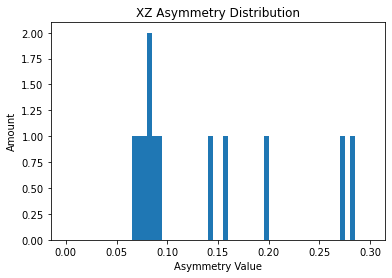

In [3]:
plot.hist(AsymXZ, bins = 60, range = (0, 0.30), rwidth = 1, align = "mid")
plot.xlabel("Asymmetry Value")
plot.ylabel("Amount")
plot.title("XZ Asymmetry Distribution")
plot.grid(False)
plot.savefig("XZ Asymmetry Distribution.png")
plot.show()

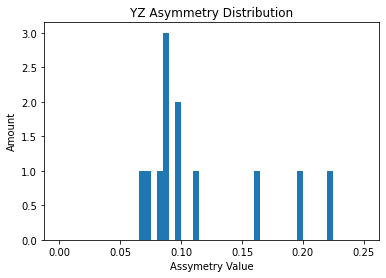

In [4]:
plot.hist(AsymYZ, bins = 50, range = (0, 0.25), rwidth = 1, align = "mid")
plot.xlabel("Assymetry Value")
plot.ylabel("Amount")
plot.title("YZ Asymmetry Distribution")
plot.grid(False)
plot.savefig("YZ Asymmetry Distribution.png")
plot.show()

In [5]:
#save and load XY

print(BadXY)

[(349.9272020005557, 18.870241733814964), (332.242289524868, 25.432064462350667)]


In [6]:
np.savetxt("BadXY.txt", BadXY) 
np.loadtxt("BadXY.txt") #edited here

array([[349.927202  ,  18.87024173],
       [332.24228952,  25.43206446]])

In [7]:
badx, bady = np.loadtxt("BadXY.txt", unpack = True)


In [8]:
print(XYCoords)

[(241.79216449013614, -28.90803000833565), (181.63545429285912, -43.41205890525146), (239.1664351208669, -11.803278688524614), (43.36482356210058, 39.32592386774104)]


In [9]:
np.loadtxt("XYCoords.txt")

array([[241.79216449, -28.90803001],
       [181.63545429, -43.41205891],
       [239.16643512, -11.80327869],
       [ 43.36482356,  39.32592387]])

In [10]:
xCoords, yCoords = np.loadtxt("XYCoords.txt", unpack = True)

In [11]:
#print and plot XY

print(xCoords)
print(yCoords)

[241.79216449 181.63545429 239.16643512  43.36482356]
[-28.90803001 -43.41205891 -11.80327869  39.32592387]


In [12]:
print(badx)
print(bady)

[349.927202   332.24228952]
[18.87024173 25.43206446]


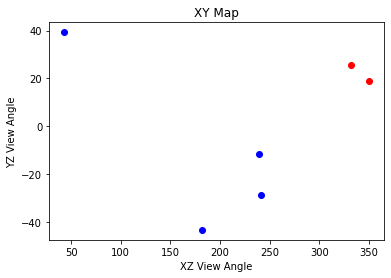

In [13]:
#plot.errorbar(xCoords, yCoords, xerr = xErrs, yerr = yErrs, fmt = 'bo')
plot.plot(xCoords, yCoords, 'bo')
plot.plot(badx, bady, 'ro')
plot.xlabel("XZ View Angle")
plot.ylabel("YZ View Angle")
plot.title("XY Map")
plot.grid(False)
plot.savefig("XY_Map.png")
plot.show()

In [14]:
#loop for altaz coordinates

#Gives AltAngle, AzAngle
AltAzCoords = []
for i in range(0, len(XYCoords)):
  AltAzAngle = (shower.GetAltAz(xCoords[i], yCoords[i]))
  print(AltAzAngle)
  AltAzCoords.append(AltAzAngle)

(40.56216961928113, 213.93494249013614)
(46.576286677635146, 153.77823229285912)
(67.81873964484558, 211.3092131208669)
(41.58573801119847, 15.507601562100582)


In [15]:
BadAltAz = []
for i in range(0, len(BadXY)):
  BadAltAzAngle = (shower.GetAltAz(badx[i], bady[i]))
  print(BadAltAzAngle)
  BadAltAz.append(BadAltAzAngle)

(70.85569964814675, 322.06998000055574)
(61.74831370785281, 304.385067524868)


In [16]:
#save and load altaz

print(BadAltAz)

[(70.85569964814675, 322.06998000055574), (61.74831370785281, 304.385067524868)]


In [17]:
np.savetxt("BadAltAz.txt", BadAltAz)
np.loadtxt("BadAltAz.txt")

array([[ 70.85569965, 322.06998   ],
       [ 61.74831371, 304.38506752]])

In [18]:
BadAlt, BadAz = np.loadtxt("BadAltAz.txt", unpack = True)

In [19]:
print(AltAzCoords)

[(40.56216961928113, 213.93494249013614), (46.576286677635146, 153.77823229285912), (67.81873964484558, 211.3092131208669), (41.58573801119847, 15.507601562100582)]


In [20]:
np.savetxt("AltAzCoords.txt", AltAzCoords)
np.loadtxt("AltAzCoords.txt")

array([[ 40.56216962, 213.93494249],
       [ 46.57628668, 153.77823229],
       [ 67.81873964, 211.30921312],
       [ 41.58573801,  15.50760156]])

In [21]:
AltCoords, AzCoords = np.loadtxt("AltAzCoords.txt", unpack = True)

In [22]:
#print altaz

print(AltCoords)
print(AzCoords)

[40.56216962 46.57628668 67.81873964 41.58573801]
[213.93494249 153.77823229 211.30921312  15.50760156]


In [23]:
print(BadAlt)
print(BadAz)

[70.85569965 61.74831371]
[322.06998    304.38506752]


In [24]:
#for i in range(len(BadXY_timestamp)):
#    print(BadXY_timestamp[i], i)

BadSkyMap = []
for i in range(0, len(BadXY_timestamp)):
  imageFileTime = BadXY_timestamp[i]
  TimeStamp = ProcessTimestamp(imageFileTime)
  print(TimeStamp)
  SkyCoords = (shower.MakeSkyCoord(BadAlt[i], BadAz[i], TimeStamp))
  BadRA, BadDec = (SkyCoords.icrs.to_string('decimal')).split()
  
  print(BadRA, BadDec)

  BadSkyMap.append((float(BadRA), float(BadDec)))

2023-04-30 04:50:45.320455
172.49 61.5291
2023-04-30 05:09:00.008655
156.532 56.8404


In [25]:
#look for sky coordinate

#for i in range(len(XY_timestamp)):
#    print(XY_timestamp[i], i)

SkyMap = []
for i in range(0, len(XY_timestamp)):
  imageFileTime = XY_timestamp[i]
  
  TimeStamp = ProcessTimestamp(imageFileTime)
  print(TimeStamp)
  SkyCoords = (shower.MakeSkyCoord(AltCoords[i], AzCoords[i], TimeStamp))

  RA, Dec = (SkyCoords.icrs.to_string('decimal')).split()
  
  print(RA, Dec)

  SkyMap.append((float(RA), float(Dec)))

2023-04-30 04:49:07.857399
171.874 3.9969
2023-04-30 05:01:09.096709
217.898 7.76809
2023-04-30 05:06:16.973229
188.431 28.6815
2023-04-30 06:09:52.288594
333.631 77.0251


In [28]:
#save and load skymap

print(BadSkyMap)

[(172.49, 61.5291), (156.532, 56.8404)]


In [29]:
np.savetxt("BadSkyMap.txt", BadSkyMap)
np.loadtxt("BadSkyMap.txt")

array([[172.49  ,  61.5291],
       [156.532 ,  56.8404]])

In [30]:
badra, baddec = np.loadtxt("BadSkyMap.txt", unpack = True)

In [31]:
print(SkyMap)

[(171.874, 3.9969), (217.898, 7.76809), (188.431, 28.6815), (333.631, 77.0251)]


In [32]:
np.savetxt("SkyMapCoords.txt", SkyMap)
np.loadtxt("SkyMapCoords.txt")

array([[171.874  ,   3.9969 ],
       [217.898  ,   7.76809],
       [188.431  ,  28.6815 ],
       [333.631  ,  77.0251 ]])

In [33]:
#print ra dec
ra, dec = np.loadtxt("SkyMapCoords.txt", unpack = True)

In [34]:
print(badra)
print(baddec)

[172.49  156.532]
[61.5291 56.8404]
